In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics

In [2]:
file = 'Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16768     35100     2.0           0     0  ...      9        1970   
9596       4750     1.0           0     0  ...      9        1700   
9587      67518     2.0           0     0  ...      8        2820   
20602      6500     2.0           0     0  ...      8        3310   
11577      8119     1.0           0     0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7898       7320     1.0           0     0  ...      7        1170   
928        1140     2.0           0     0  ...      8        1080   
5637       7344     1.5           0     0  ...      7        1870   
13053      6670     1.0           0     0  ...      6         720   
16594      5000     2.0           0     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   
...              ...       ...           ...      ...      ...      ...   
7898               0      1962             0    98188  47.4685 -122.282   
928              290      2009             0    98133  47.7052 -122.343   
5637               0      1960             0    98007  47.5951 -122.144   
13053            670      1941             0    98115  47.6914 -122.308   
16594           1310      1924             0    98115  47.6747 -122.303   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  
...              ...         ...  
7898            2040        7320  
928             1370        1090  
5637            1870        7650  
13053            920        6380  
16594           2170        4590  

[21613 rows x 21 columns]

In [4]:
dateym=[]
num = 0
for index, row in df.iterrows():
    print("working on "+ str(num))
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 718
working on 719
working on 720
working on 721
working on 722
working on 723
working on 724
working on 725
working on 726
working on 727
working on 728
working on 729
working on 730
working on 731
working on 732
working on 733
working on 734
working on 735
working on 736
working on 737
working on 738
working on 739
working on 740
working on 741
working on 742
working on 743
working on 744
working on 745
working on 746
working on 747
working on 748
working on 749
working on 750
working on 751
working on 752
working on 753
working on 754
working on 755
working on 756
working on 757
working on 758
working on 759
working on 760
working on 761
working on 762
working on 763
working on 764
working on 765
working on 766
working on 767
working on 768
working on 769
working on 770
working on 771
working on 772
working on 773
working on 774
working on 775
working on 776
working on 777
working on 778
working on 779
working on 780
working on 781
working on 782
working on 783
working on

working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working on 1415
working on 1416
working on 1417
working on 1418
working on 1419
working on 1420
working on 1421
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working on 1429
working on 1430
working on 1431
working on 1432
working on 1433
working 

working on 1982
working on 1983
working on 1984
working on 1985
working on 1986
working on 1987
working on 1988
working on 1989
working on 1990
working on 1991
working on 1992
working on 1993
working on 1994
working on 1995
working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019
working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working 

working on 2871
working on 2872
working on 2873
working on 2874
working on 2875
working on 2876
working on 2877
working on 2878
working on 2879
working on 2880
working on 2881
working on 2882
working on 2883
working on 2884
working on 2885
working on 2886
working on 2887
working on 2888
working on 2889
working on 2890
working on 2891
working on 2892
working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working on 2929
working on 2930
working on 2931
working on 2932
working 

working on 3652
working on 3653
working on 3654
working on 3655
working on 3656
working on 3657
working on 3658
working on 3659
working on 3660
working on 3661
working on 3662
working on 3663
working on 3664
working on 3665
working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working 

working on 4179
working on 4180
working on 4181
working on 4182
working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working 

working on 4885
working on 4886
working on 4887
working on 4888
working on 4889
working on 4890
working on 4891
working on 4892
working on 4893
working on 4894
working on 4895
working on 4896
working on 4897
working on 4898
working on 4899
working on 4900
working on 4901
working on 4902
working on 4903
working on 4904
working on 4905
working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working on 4912
working on 4913
working on 4914
working on 4915
working on 4916
working on 4917
working on 4918
working on 4919
working on 4920
working on 4921
working on 4922
working on 4923
working on 4924
working on 4925
working on 4926
working on 4927
working on 4928
working on 4929
working on 4930
working on 4931
working on 4932
working on 4933
working on 4934
working on 4935
working on 4936
working on 4937
working on 4938
working on 4939
working on 4940
working on 4941
working on 4942
working on 4943
working on 4944
working on 4945
working on 4946
working 

working on 5715
working on 5716
working on 5717
working on 5718
working on 5719
working on 5720
working on 5721
working on 5722
working on 5723
working on 5724
working on 5725
working on 5726
working on 5727
working on 5728
working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working 

working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working on 6571
working on 6572
working on 6573
working on 6574
working on 6575
working on 6576
working on 6577
working on 6578
working on 6579
working on 6580
working on 6581
working on 6582
working on 6583
working on 6584
working on 6585
working on 6586
working on 6587
working on 6588
working on 6589
working on 6590
working on 6591
working on 6592
working on 6593
working on 6594
working on 6595
working on 6596
working on 6597
working on 6598
working on 6599
working on 6600
working on 6601
working on 6602
working on 6603
working on 6604
working on 6605
working on 6606
working on 6607
working on 6608
working on 6609
working on 6610
working on 6611
working on 6612
working on 6613
working on 6614
working on 6615
working on 6616
working 

working on 7122
working on 7123
working on 7124
working on 7125
working on 7126
working on 7127
working on 7128
working on 7129
working on 7130
working on 7131
working on 7132
working on 7133
working on 7134
working on 7135
working on 7136
working on 7137
working on 7138
working on 7139
working on 7140
working on 7141
working on 7142
working on 7143
working on 7144
working on 7145
working on 7146
working on 7147
working on 7148
working on 7149
working on 7150
working on 7151
working on 7152
working on 7153
working on 7154
working on 7155
working on 7156
working on 7157
working on 7158
working on 7159
working on 7160
working on 7161
working on 7162
working on 7163
working on 7164
working on 7165
working on 7166
working on 7167
working on 7168
working on 7169
working on 7170
working on 7171
working on 7172
working on 7173
working on 7174
working on 7175
working on 7176
working on 7177
working on 7178
working on 7179
working on 7180
working on 7181
working on 7182
working on 7183
working 

working on 8123
working on 8124
working on 8125
working on 8126
working on 8127
working on 8128
working on 8129
working on 8130
working on 8131
working on 8132
working on 8133
working on 8134
working on 8135
working on 8136
working on 8137
working on 8138
working on 8139
working on 8140
working on 8141
working on 8142
working on 8143
working on 8144
working on 8145
working on 8146
working on 8147
working on 8148
working on 8149
working on 8150
working on 8151
working on 8152
working on 8153
working on 8154
working on 8155
working on 8156
working on 8157
working on 8158
working on 8159
working on 8160
working on 8161
working on 8162
working on 8163
working on 8164
working on 8165
working on 8166
working on 8167
working on 8168
working on 8169
working on 8170
working on 8171
working on 8172
working on 8173
working on 8174
working on 8175
working on 8176
working on 8177
working on 8178
working on 8179
working on 8180
working on 8181
working on 8182
working on 8183
working on 8184
working 

working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working on 8880
working on 8881
working on 8882
working on 8883
working on 8884
working on 8885
working on 8886
working on 8887
working on 8888
working on 8889
working on 8890
working on 8891
working on 8892
working on 8893
working on 8894
working on 8895
working on 8896
working on 8897
working 

working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working on 9414
working on 9415
working on 9416
working on 9417
working on 9418
working on 9419
working on 9420
working on 9421
working on 9422
working on 9423
working on 9424
working on 9425
working on 9426
working on 9427
working on 9428
working on 9429
working on 9430
working on 9431
working on 9432
working on 9433
working on 9434
working on 9435
working on 9436
working on 9437
working on 9438
working on 9439
working on 9440
working on 9441
working on 9442
working on 9443
working on 9444
working on 9445
working on 9446
working on 9447
working on 9448
working on 9449
working on 9450
working on 9451
working on 9452
working on 9453
working on 9454
working on 9455
working on 9456
working on 9457
working on 9458
working on 9459
working on 9460
working 

working on 10306
working on 10307
working on 10308
working on 10309
working on 10310
working on 10311
working on 10312
working on 10313
working on 10314
working on 10315
working on 10316
working on 10317
working on 10318
working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 10326
working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 103

working on 10989
working on 10990
working on 10991
working on 10992
working on 10993
working on 10994
working on 10995
working on 10996
working on 10997
working on 10998
working on 10999
working on 11000
working on 11001
working on 11002
working on 11003
working on 11004
working on 11005
working on 11006
working on 11007
working on 11008
working on 11009
working on 11010
working on 11011
working on 11012
working on 11013
working on 11014
working on 11015
working on 11016
working on 11017
working on 11018
working on 11019
working on 11020
working on 11021
working on 11022
working on 11023
working on 11024
working on 11025
working on 11026
working on 11027
working on 11028
working on 11029
working on 11030
working on 11031
working on 11032
working on 11033
working on 11034
working on 11035
working on 11036
working on 11037
working on 11038
working on 11039
working on 11040
working on 11041
working on 11042
working on 11043
working on 11044
working on 11045
working on 11046
working on 110

working on 11652
working on 11653
working on 11654
working on 11655
working on 11656
working on 11657
working on 11658
working on 11659
working on 11660
working on 11661
working on 11662
working on 11663
working on 11664
working on 11665
working on 11666
working on 11667
working on 11668
working on 11669
working on 11670
working on 11671
working on 11672
working on 11673
working on 11674
working on 11675
working on 11676
working on 11677
working on 11678
working on 11679
working on 11680
working on 11681
working on 11682
working on 11683
working on 11684
working on 11685
working on 11686
working on 11687
working on 11688
working on 11689
working on 11690
working on 11691
working on 11692
working on 11693
working on 11694
working on 11695
working on 11696
working on 11697
working on 11698
working on 11699
working on 11700
working on 11701
working on 11702
working on 11703
working on 11704
working on 11705
working on 11706
working on 11707
working on 11708
working on 11709
working on 117

working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 12329
working on 12330
working on 12331
working on 12332
working on 12333
working on 12334
working on 12335
working on 12336
working on 12337
working on 12338
working on 12339
working on 12340
working on 12341
working on 12342
working on 12343
working on 12344
working on 12345
working on 12346
working on 12347
working on 12348
working on 12349
working on 12350
working on 12351
working on 12352
working on 12353
working on 12354
working on 12355
working on 12356
working on 12357
working on 12358
working on 12359
working on 12360
working on 12361
working on 12362
working on 12363
working on 12364
working on 12365
working on 12366
working on 12367
working on 12368
working on 12369
working on 12370
working on 12371
working on 12372
working on 12373
working on 12374
working on 12375
working on 12376
working on 123

working on 13118
working on 13119
working on 13120
working on 13121
working on 13122
working on 13123
working on 13124
working on 13125
working on 13126
working on 13127
working on 13128
working on 13129
working on 13130
working on 13131
working on 13132
working on 13133
working on 13134
working on 13135
working on 13136
working on 13137
working on 13138
working on 13139
working on 13140
working on 13141
working on 13142
working on 13143
working on 13144
working on 13145
working on 13146
working on 13147
working on 13148
working on 13149
working on 13150
working on 13151
working on 13152
working on 13153
working on 13154
working on 13155
working on 13156
working on 13157
working on 13158
working on 13159
working on 13160
working on 13161
working on 13162
working on 13163
working on 13164
working on 13165
working on 13166
working on 13167
working on 13168
working on 13169
working on 13170
working on 13171
working on 13172
working on 13173
working on 13174
working on 13175
working on 131

working on 13804
working on 13805
working on 13806
working on 13807
working on 13808
working on 13809
working on 13810
working on 13811
working on 13812
working on 13813
working on 13814
working on 13815
working on 13816
working on 13817
working on 13818
working on 13819
working on 13820
working on 13821
working on 13822
working on 13823
working on 13824
working on 13825
working on 13826
working on 13827
working on 13828
working on 13829
working on 13830
working on 13831
working on 13832
working on 13833
working on 13834
working on 13835
working on 13836
working on 13837
working on 13838
working on 13839
working on 13840
working on 13841
working on 13842
working on 13843
working on 13844
working on 13845
working on 13846
working on 13847
working on 13848
working on 13849
working on 13850
working on 13851
working on 13852
working on 13853
working on 13854
working on 13855
working on 13856
working on 13857
working on 13858
working on 13859
working on 13860
working on 13861
working on 138

working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 14752
working on 14753
working on 14754
working on 14755
working on 14756
working on 14757
working on 14758
working on 14759
working on 14760
working on 14761
working on 14762
working on 14763
working on 14764
working on 14765
working on 14766
working on 14767
working on 14768
working on 14769
working on 14770
working on 14771
working on 14772
working on 14773
working on 14774
working on 14775
working on 14776
working on 14777
working on 14778
working on 14779
working on 14780
working on 14781
working on 14782
working on 14783
working on 14784
working on 14785
working on 14786
working on 14787
working on 14788
working on 14789
working on 14790
working on 14791
working on 14792
working on 14793
working on 14794
working on 14795
working on 14796
working on 14797
working on 14798
working on 147

working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 15455
working on 15456
working on 15457
working on 15458
working on 15459
working on 15460
working on 15461
working on 15462
working on 15463
working on 15464
working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 15494
working on 15495
working on 15496
working on 15497
working on 15498
working on 15499
working on 15500
working on 155

working on 16146
working on 16147
working on 16148
working on 16149
working on 16150
working on 16151
working on 16152
working on 16153
working on 16154
working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 16187
working on 16188
working on 16189
working on 16190
working on 16191
working on 16192
working on 16193
working on 16194
working on 16195
working on 16196
working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 16203
working on 162

working on 16896
working on 16897
working on 16898
working on 16899
working on 16900
working on 16901
working on 16902
working on 16903
working on 16904
working on 16905
working on 16906
working on 16907
working on 16908
working on 16909
working on 16910
working on 16911
working on 16912
working on 16913
working on 16914
working on 16915
working on 16916
working on 16917
working on 16918
working on 16919
working on 16920
working on 16921
working on 16922
working on 16923
working on 16924
working on 16925
working on 16926
working on 16927
working on 16928
working on 16929
working on 16930
working on 16931
working on 16932
working on 16933
working on 16934
working on 16935
working on 16936
working on 16937
working on 16938
working on 16939
working on 16940
working on 16941
working on 16942
working on 16943
working on 16944
working on 16945
working on 16946
working on 16947
working on 16948
working on 16949
working on 16950
working on 16951
working on 16952
working on 16953
working on 169

working on 17861
working on 17862
working on 17863
working on 17864
working on 17865
working on 17866
working on 17867
working on 17868
working on 17869
working on 17870
working on 17871
working on 17872
working on 17873
working on 17874
working on 17875
working on 17876
working on 17877
working on 17878
working on 17879
working on 17880
working on 17881
working on 17882
working on 17883
working on 17884
working on 17885
working on 17886
working on 17887
working on 17888
working on 17889
working on 17890
working on 17891
working on 17892
working on 17893
working on 17894
working on 17895
working on 17896
working on 17897
working on 17898
working on 17899
working on 17900
working on 17901
working on 17902
working on 17903
working on 17904
working on 17905
working on 17906
working on 17907
working on 17908
working on 17909
working on 17910
working on 17911
working on 17912
working on 17913
working on 17914
working on 17915
working on 17916
working on 17917
working on 17918
working on 179

working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 18683
working on 18684
working on 18685
working on 18686
working on 18687
working on 18688
working on 18689
working on 18690
working on 18691
working on 18692
working on 18693
working on 18694
working on 18695
working on 18696
working on 18697
working on 18698
working on 18699
working on 18700
working on 18701
working on 187

working on 19282
working on 19283
working on 19284
working on 19285
working on 19286
working on 19287
working on 19288
working on 19289
working on 19290
working on 19291
working on 19292
working on 19293
working on 19294
working on 19295
working on 19296
working on 19297
working on 19298
working on 19299
working on 19300
working on 19301
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19307
working on 19308
working on 19309
working on 19310
working on 19311
working on 19312
working on 19313
working on 19314
working on 19315
working on 19316
working on 19317
working on 19318
working on 19319
working on 19320
working on 19321
working on 19322
working on 19323
working on 19324
working on 19325
working on 19326
working on 19327
working on 19328
working on 19329
working on 19330
working on 19331
working on 19332
working on 19333
working on 19334
working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 193

working on 19855
working on 19856
working on 19857
working on 19858
working on 19859
working on 19860
working on 19861
working on 19862
working on 19863
working on 19864
working on 19865
working on 19866
working on 19867
working on 19868
working on 19869
working on 19870
working on 19871
working on 19872
working on 19873
working on 19874
working on 19875
working on 19876
working on 19877
working on 19878
working on 19879
working on 19880
working on 19881
working on 19882
working on 19883
working on 19884
working on 19885
working on 19886
working on 19887
working on 19888
working on 19889
working on 19890
working on 19891
working on 19892
working on 19893
working on 19894
working on 19895
working on 19896
working on 19897
working on 19898
working on 19899
working on 19900
working on 19901
working on 19902
working on 19903
working on 19904
working on 19905
working on 19906
working on 19907
working on 19908
working on 19909
working on 19910
working on 19911
working on 19912
working on 199

working on 20685
working on 20686
working on 20687
working on 20688
working on 20689
working on 20690
working on 20691
working on 20692
working on 20693
working on 20694
working on 20695
working on 20696
working on 20697
working on 20698
working on 20699
working on 20700
working on 20701
working on 20702
working on 20703
working on 20704
working on 20705
working on 20706
working on 20707
working on 20708
working on 20709
working on 20710
working on 20711
working on 20712
working on 20713
working on 20714
working on 20715
working on 20716
working on 20717
working on 20718
working on 20719
working on 20720
working on 20721
working on 20722
working on 20723
working on 20724
working on 20725
working on 20726
working on 20727
working on 20728
working on 20729
working on 20730
working on 20731
working on 20732
working on 20733
working on 20734
working on 20735
working on 20736
working on 20737
working on 20738
working on 20739
working on 20740
working on 20741
working on 20742
working on 207

working on 21337
working on 21338
working on 21339
working on 21340
working on 21341
working on 21342
working on 21343
working on 21344
working on 21345
working on 21346
working on 21347
working on 21348
working on 21349
working on 21350
working on 21351
working on 21352
working on 21353
working on 21354
working on 21355
working on 21356
working on 21357
working on 21358
working on 21359
working on 21360
working on 21361
working on 21362
working on 21363
working on 21364
working on 21365
working on 21366
working on 21367
working on 21368
working on 21369
working on 21370
working on 21371
working on 21372
working on 21373
working on 21374
working on 21375
working on 21376
working on 21377
working on 21378
working on 21379
working on 21380
working on 21381
working on 21382
working on 21383
working on 21384
working on 21385
working on 21386
working on 21387
working on 21388
working on 21389
working on 21390
working on 21391
working on 21392
working on 21393
working on 21394
working on 213

In [5]:
df['date(Y/M)']=dateym

In [6]:
datey=[]
num1 = 0
for index, row in df.iterrows():
    print("working on "+ str(num1))
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on 698
working on 699
working on 700
working on 701
working on 702
working on 703
working on 704
working on 705
working on 706
working on 707
working on 708
working on

working on 1321
working on 1322
working on 1323
working on 1324
working on 1325
working on 1326
working on 1327
working on 1328
working on 1329
working on 1330
working on 1331
working on 1332
working on 1333
working on 1334
working on 1335
working on 1336
working on 1337
working on 1338
working on 1339
working on 1340
working on 1341
working on 1342
working on 1343
working on 1344
working on 1345
working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working 

working on 1907
working on 1908
working on 1909
working on 1910
working on 1911
working on 1912
working on 1913
working on 1914
working on 1915
working on 1916
working on 1917
working on 1918
working on 1919
working on 1920
working on 1921
working on 1922
working on 1923
working on 1924
working on 1925
working on 1926
working on 1927
working on 1928
working on 1929
working on 1930
working on 1931
working on 1932
working on 1933
working on 1934
working on 1935
working on 1936
working on 1937
working on 1938
working on 1939
working on 1940
working on 1941
working on 1942
working on 1943
working on 1944
working on 1945
working on 1946
working on 1947
working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working on 1958
working on 1959
working on 1960
working on 1961
working on 1962
working on 1963
working on 1964
working on 1965
working on 1966
working on 1967
working on 1968
working 

working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working on 2699
working on 2700
working on 2701
working on 2702
working on 2703
working on 2704
working on 2705
working on 2706
working on 2707
working on 2708
working on 2709
working on 2710
working on 2711
working on 2712
working on 2713
working on 2714
working on 2715
working on 2716
working on 2717
working on 2718
working on 2719
working on 2720
working on 2721
working on 2722
working on 2723
working on 2724
working on 2725
working on 2726
working on 2727
working on 2728
working on 2729
working on 2730
working on 2731
working 

working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working on 3340
working on 3341
working on 3342
working on 3343
working on 3344
working on 3345
working on 3346
working on 3347
working on 3348
working on 3349
working on 3350
working on 3351
working on 3352
working on 3353
working on 3354
working on 3355
working on 3356
working on 3357
working on 3358
working on 3359
working on 3360
working on 3361
working on 3362
working on 3363
working on 3364
working on 3365
working on 3366
working on 3367
working on 3368
working on 3369
working on 3370
working on 3371
working on 3372
working on 3373
working on 3374
working on 3375
working on 3376
working on 3377
working on 3378
working on 3379
working on 3380
working on 3381
working on 3382
working on 3383
working on 3384
working on 3385
working on 3386
working on 3387
working on 3388
working on 3389
working 

working on 3995
working on 3996
working on 3997
working on 3998
working on 3999
working on 4000
working on 4001
working on 4002
working on 4003
working on 4004
working on 4005
working on 4006
working on 4007
working on 4008
working on 4009
working on 4010
working on 4011
working on 4012
working on 4013
working on 4014
working on 4015
working on 4016
working on 4017
working on 4018
working on 4019
working on 4020
working on 4021
working on 4022
working on 4023
working on 4024
working on 4025
working on 4026
working on 4027
working on 4028
working on 4029
working on 4030
working on 4031
working on 4032
working on 4033
working on 4034
working on 4035
working on 4036
working on 4037
working on 4038
working on 4039
working on 4040
working on 4041
working on 4042
working on 4043
working on 4044
working on 4045
working on 4046
working on 4047
working on 4048
working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working 

working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working on 4912
working on 4913
working on 4914
working on 4915
working on 4916
working on 4917
working on 4918
working on 4919
working on 4920
working on 4921
working on 4922
working on 4923
working on 4924
working on 4925
working on 4926
working on 4927
working on 4928
working on 4929
working on 4930
working on 4931
working on 4932
working on 4933
working on 4934
working on 4935
working on 4936
working on 4937
working on 4938
working on 4939
working on 4940
working on 4941
working on 4942
working on 4943
working on 4944
working on 4945
working on 4946
working on 4947
working on 4948
working on 4949
working on 4950
working on 4951
working on 4952
working on 4953
working on 4954
working on 4955
working on 4956
working on 4957
working on 4958
working on 4959
working on 4960
working on 4961
working on 4962
working on 4963
working on 4964
working on 4965
working on 4966
working on 4967
working 

working on 5489
working on 5490
working on 5491
working on 5492
working on 5493
working on 5494
working on 5495
working on 5496
working on 5497
working on 5498
working on 5499
working on 5500
working on 5501
working on 5502
working on 5503
working on 5504
working on 5505
working on 5506
working on 5507
working on 5508
working on 5509
working on 5510
working on 5511
working on 5512
working on 5513
working on 5514
working on 5515
working on 5516
working on 5517
working on 5518
working on 5519
working on 5520
working on 5521
working on 5522
working on 5523
working on 5524
working on 5525
working on 5526
working on 5527
working on 5528
working on 5529
working on 5530
working on 5531
working on 5532
working on 5533
working on 5534
working on 5535
working on 5536
working on 5537
working on 5538
working on 5539
working on 5540
working on 5541
working on 5542
working on 5543
working on 5544
working on 5545
working on 5546
working on 5547
working on 5548
working on 5549
working on 5550
working 

working on 6174
working on 6175
working on 6176
working on 6177
working on 6178
working on 6179
working on 6180
working on 6181
working on 6182
working on 6183
working on 6184
working on 6185
working on 6186
working on 6187
working on 6188
working on 6189
working on 6190
working on 6191
working on 6192
working on 6193
working on 6194
working on 6195
working on 6196
working on 6197
working on 6198
working on 6199
working on 6200
working on 6201
working on 6202
working on 6203
working on 6204
working on 6205
working on 6206
working on 6207
working on 6208
working on 6209
working on 6210
working on 6211
working on 6212
working on 6213
working on 6214
working on 6215
working on 6216
working on 6217
working on 6218
working on 6219
working on 6220
working on 6221
working on 6222
working on 6223
working on 6224
working on 6225
working on 6226
working on 6227
working on 6228
working on 6229
working on 6230
working on 6231
working on 6232
working on 6233
working on 6234
working on 6235
working 

working on 7009
working on 7010
working on 7011
working on 7012
working on 7013
working on 7014
working on 7015
working on 7016
working on 7017
working on 7018
working on 7019
working on 7020
working on 7021
working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028
working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working on 7047
working on 7048
working on 7049
working on 7050
working on 7051
working on 7052
working on 7053
working on 7054
working on 7055
working on 7056
working on 7057
working on 7058
working on 7059
working on 7060
working on 7061
working on 7062
working on 7063
working on 7064
working on 7065
working on 7066
working on 7067
working on 7068
working on 7069
working on 7070
working 

working on 7651
working on 7652
working on 7653
working on 7654
working on 7655
working on 7656
working on 7657
working on 7658
working on 7659
working on 7660
working on 7661
working on 7662
working on 7663
working on 7664
working on 7665
working on 7666
working on 7667
working on 7668
working on 7669
working on 7670
working on 7671
working on 7672
working on 7673
working on 7674
working on 7675
working on 7676
working on 7677
working on 7678
working on 7679
working on 7680
working on 7681
working on 7682
working on 7683
working on 7684
working on 7685
working on 7686
working on 7687
working on 7688
working on 7689
working on 7690
working on 7691
working on 7692
working on 7693
working on 7694
working on 7695
working on 7696
working on 7697
working on 7698
working on 7699
working on 7700
working on 7701
working on 7702
working on 7703
working on 7704
working on 7705
working on 7706
working on 7707
working on 7708
working on 7709
working on 7710
working on 7711
working on 7712
working 

working on 8400
working on 8401
working on 8402
working on 8403
working on 8404
working on 8405
working on 8406
working on 8407
working on 8408
working on 8409
working on 8410
working on 8411
working on 8412
working on 8413
working on 8414
working on 8415
working on 8416
working on 8417
working on 8418
working on 8419
working on 8420
working on 8421
working on 8422
working on 8423
working on 8424
working on 8425
working on 8426
working on 8427
working on 8428
working on 8429
working on 8430
working on 8431
working on 8432
working on 8433
working on 8434
working on 8435
working on 8436
working on 8437
working on 8438
working on 8439
working on 8440
working on 8441
working on 8442
working on 8443
working on 8444
working on 8445
working on 8446
working on 8447
working on 8448
working on 8449
working on 8450
working on 8451
working on 8452
working on 8453
working on 8454
working on 8455
working on 8456
working on 8457
working on 8458
working on 8459
working on 8460
working on 8461
working 

working on 9154
working on 9155
working on 9156
working on 9157
working on 9158
working on 9159
working on 9160
working on 9161
working on 9162
working on 9163
working on 9164
working on 9165
working on 9166
working on 9167
working on 9168
working on 9169
working on 9170
working on 9171
working on 9172
working on 9173
working on 9174
working on 9175
working on 9176
working on 9177
working on 9178
working on 9179
working on 9180
working on 9181
working on 9182
working on 9183
working on 9184
working on 9185
working on 9186
working on 9187
working on 9188
working on 9189
working on 9190
working on 9191
working on 9192
working on 9193
working on 9194
working on 9195
working on 9196
working on 9197
working on 9198
working on 9199
working on 9200
working on 9201
working on 9202
working on 9203
working on 9204
working on 9205
working on 9206
working on 9207
working on 9208
working on 9209
working on 9210
working on 9211
working on 9212
working on 9213
working on 9214
working on 9215
working 

working on 9764
working on 9765
working on 9766
working on 9767
working on 9768
working on 9769
working on 9770
working on 9771
working on 9772
working on 9773
working on 9774
working on 9775
working on 9776
working on 9777
working on 9778
working on 9779
working on 9780
working on 9781
working on 9782
working on 9783
working on 9784
working on 9785
working on 9786
working on 9787
working on 9788
working on 9789
working on 9790
working on 9791
working on 9792
working on 9793
working on 9794
working on 9795
working on 9796
working on 9797
working on 9798
working on 9799
working on 9800
working on 9801
working on 9802
working on 9803
working on 9804
working on 9805
working on 9806
working on 9807
working on 9808
working on 9809
working on 9810
working on 9811
working on 9812
working on 9813
working on 9814
working on 9815
working on 9816
working on 9817
working on 9818
working on 9819
working on 9820
working on 9821
working on 9822
working on 9823
working on 9824
working on 9825
working 

working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605
working on 10606
working on 10607
working on 10608
working on 10609
working on 10610
working on 10611
working on 10612
working on 10613
working on 10614
working on 10615
working on 10616
working on 10617
working on 10618
working on 10619
working on 10620
working on 10621
working on 10622
working on 10623
working on 10624
working on 10625
working on 10626
working on 10627
working on 10628
working on 10629
working on 10630
working on 10631
working on 10632
working on 10633
working on 10634
working on 10635
working on 10636
working on 10637
working on 10638
working on 10639
working on 10640
working on 10641
working on 10642
working on 10643
working on 10644
working on 10645
working on 10646
working on 10647
working on 10648
working on 10649
working on 10650
working on 10651
working on 10652
working on 106

working on 11233
working on 11234
working on 11235
working on 11236
working on 11237
working on 11238
working on 11239
working on 11240
working on 11241
working on 11242
working on 11243
working on 11244
working on 11245
working on 11246
working on 11247
working on 11248
working on 11249
working on 11250
working on 11251
working on 11252
working on 11253
working on 11254
working on 11255
working on 11256
working on 11257
working on 11258
working on 11259
working on 11260
working on 11261
working on 11262
working on 11263
working on 11264
working on 11265
working on 11266
working on 11267
working on 11268
working on 11269
working on 11270
working on 11271
working on 11272
working on 11273
working on 11274
working on 11275
working on 11276
working on 11277
working on 11278
working on 11279
working on 11280
working on 11281
working on 11282
working on 11283
working on 11284
working on 11285
working on 11286
working on 11287
working on 11288
working on 11289
working on 11290
working on 112

working on 11879
working on 11880
working on 11881
working on 11882
working on 11883
working on 11884
working on 11885
working on 11886
working on 11887
working on 11888
working on 11889
working on 11890
working on 11891
working on 11892
working on 11893
working on 11894
working on 11895
working on 11896
working on 11897
working on 11898
working on 11899
working on 11900
working on 11901
working on 11902
working on 11903
working on 11904
working on 11905
working on 11906
working on 11907
working on 11908
working on 11909
working on 11910
working on 11911
working on 11912
working on 11913
working on 11914
working on 11915
working on 11916
working on 11917
working on 11918
working on 11919
working on 11920
working on 11921
working on 11922
working on 11923
working on 11924
working on 11925
working on 11926
working on 11927
working on 11928
working on 11929
working on 11930
working on 11931
working on 11932
working on 11933
working on 11934
working on 11935
working on 11936
working on 119

working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 12814
working on 12815
working on 12816
working on 12817
working on 12818
working on 12819
working on 12820
working on 12821
working on 12822
working on 12823
working on 128

working on 13485
working on 13486
working on 13487
working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 13521
working on 13522
working on 13523
working on 13524
working on 13525
working on 13526
working on 13527
working on 13528
working on 13529
working on 13530
working on 13531
working on 13532
working on 13533
working on 13534
working on 13535
working on 13536
working on 13537
working on 13538
working on 13539
working on 13540
working on 13541
working on 13542
working on 135

working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 14256
working on 14257
working on 14258
working on 14259
working on 14260
working on 14261
working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 14267
working on 14268
working on 14269
working on 14270
working on 14271
working on 14272
working on 14273
working on 14274
working on 142

working on 14924
working on 14925
working on 14926
working on 14927
working on 14928
working on 14929
working on 14930
working on 14931
working on 14932
working on 14933
working on 14934
working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 149

working on 15774
working on 15775
working on 15776
working on 15777
working on 15778
working on 15779
working on 15780
working on 15781
working on 15782
working on 15783
working on 15784
working on 15785
working on 15786
working on 15787
working on 15788
working on 15789
working on 15790
working on 15791
working on 15792
working on 15793
working on 15794
working on 15795
working on 15796
working on 15797
working on 15798
working on 15799
working on 15800
working on 15801
working on 15802
working on 15803
working on 15804
working on 15805
working on 15806
working on 15807
working on 15808
working on 15809
working on 15810
working on 15811
working on 15812
working on 15813
working on 15814
working on 15815
working on 15816
working on 15817
working on 15818
working on 15819
working on 15820
working on 15821
working on 15822
working on 15823
working on 15824
working on 15825
working on 15826
working on 15827
working on 15828
working on 15829
working on 15830
working on 15831
working on 158

working on 16404
working on 16405
working on 16406
working on 16407
working on 16408
working on 16409
working on 16410
working on 16411
working on 16412
working on 16413
working on 16414
working on 16415
working on 16416
working on 16417
working on 16418
working on 16419
working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 164

working on 17097
working on 17098
working on 17099
working on 17100
working on 17101
working on 17102
working on 17103
working on 17104
working on 17105
working on 17106
working on 17107
working on 17108
working on 17109
working on 17110
working on 17111
working on 17112
working on 17113
working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 171

working on 17817
working on 17818
working on 17819
working on 17820
working on 17821
working on 17822
working on 17823
working on 17824
working on 17825
working on 17826
working on 17827
working on 17828
working on 17829
working on 17830
working on 17831
working on 17832
working on 17833
working on 17834
working on 17835
working on 17836
working on 17837
working on 17838
working on 17839
working on 17840
working on 17841
working on 17842
working on 17843
working on 17844
working on 17845
working on 17846
working on 17847
working on 17848
working on 17849
working on 17850
working on 17851
working on 17852
working on 17853
working on 17854
working on 17855
working on 17856
working on 17857
working on 17858
working on 17859
working on 17860
working on 17861
working on 17862
working on 17863
working on 17864
working on 17865
working on 17866
working on 17867
working on 17868
working on 17869
working on 17870
working on 17871
working on 17872
working on 17873
working on 17874
working on 178

working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 18683
working on 18684
working on 18685
working on 18686
working on 18687
working on 18688
working on 18689
working on 18690
working on 18691
working on 18692
working on 18693
working on 18694
working on 186

working on 19284
working on 19285
working on 19286
working on 19287
working on 19288
working on 19289
working on 19290
working on 19291
working on 19292
working on 19293
working on 19294
working on 19295
working on 19296
working on 19297
working on 19298
working on 19299
working on 19300
working on 19301
working on 19302
working on 19303
working on 19304
working on 19305
working on 19306
working on 19307
working on 19308
working on 19309
working on 19310
working on 19311
working on 19312
working on 19313
working on 19314
working on 19315
working on 19316
working on 19317
working on 19318
working on 19319
working on 19320
working on 19321
working on 19322
working on 19323
working on 19324
working on 19325
working on 19326
working on 19327
working on 19328
working on 19329
working on 19330
working on 19331
working on 19332
working on 19333
working on 19334
working on 19335
working on 19336
working on 19337
working on 19338
working on 19339
working on 19340
working on 19341
working on 193

working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 20119
working on 20120
working on 20121
working on 20122
working on 20123
working on 20124
working on 20125
working on 20126
working on 20127
working on 20128
working on 20129
working on 20130
working on 20131
working on 20132
working on 20133
working on 20134
working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 201

working on 20759
working on 20760
working on 20761
working on 20762
working on 20763
working on 20764
working on 20765
working on 20766
working on 20767
working on 20768
working on 20769
working on 20770
working on 20771
working on 20772
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20779
working on 20780
working on 20781
working on 20782
working on 20783
working on 20784
working on 20785
working on 20786
working on 20787
working on 20788
working on 20789
working on 20790
working on 20791
working on 20792
working on 20793
working on 20794
working on 20795
working on 20796
working on 20797
working on 20798
working on 20799
working on 20800
working on 20801
working on 20802
working on 20803
working on 20804
working on 20805
working on 20806
working on 20807
working on 20808
working on 20809
working on 20810
working on 20811
working on 20812
working on 20813
working on 20814
working on 20815
working on 20816
working on 208

working on 21452
working on 21453
working on 21454
working on 21455
working on 21456
working on 21457
working on 21458
working on 21459
working on 21460
working on 21461
working on 21462
working on 21463
working on 21464
working on 21465
working on 21466
working on 21467
working on 21468
working on 21469
working on 21470
working on 21471
working on 21472
working on 21473
working on 21474
working on 21475
working on 21476
working on 21477
working on 21478
working on 21479
working on 21480
working on 21481
working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21506
working on 21507
working on 21508
working on 21509
working on 215

In [7]:
df['date(Y)']=datey

In [8]:
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

id         price  bedrooms  bathrooms  sqft_living  \
date                                                                       
2014-05-02  4.088342e+09  5.261918e+05  3.402985   2.138060  2102.835821   
2014-05-03  6.709662e+09  4.669700e+05  3.000000   1.812500  1620.000000   
2014-05-04  5.848658e+09  5.766900e+05  3.200000   2.400000  2508.000000   
2014-05-05  4.571210e+09  5.810577e+05  3.523810   2.193452  2257.845238   
2014-05-06  4.553568e+09  5.341684e+05  3.493976   2.171687  2102.168675   
...                  ...           ...       ...        ...          ...   
2015-05-13  4.625505e+09  5.116239e+05  3.193548   2.088710  1922.322581   
2015-05-14  6.159145e+09  6.038908e+05  3.818182   2.340909  2093.909091   
2015-05-15  7.923600e+09  4.500000e+05  5.000000   2.000000  1870.000000   
2015-05-24  5.101401e+09  4.455000e+05  2.000000   1.750000  1390.000000   
2015-05-27  9.106000e+09  1.310000e+06  4.000000   2.250000  3750.000000   

                sqft_lot    floors  waterfront      view  condition     grade  \
date                                                                            
2014-05-02  15640.477612  1.462687         0.0  0.223881   3.447761  7.835821   
2014-05-03   8901.000000  1.250000         0.0  0.000000   3.500000  7.000000   
2014-05-04   7563.000000  1.400000         0.0  0.400000   3.400000  8.400000   
2014-05-05  17966.309524  1.565476         0.0  0.202381   3.440476  7.833333   
2014-05-06  12127.662651  1.457831         0.0  0.120482   3.349398  7.650602   
...                  ...       ...         ...       ...        ...       ...   
2015-05-13   8165.096774  1.403226         0.0  0.032258   3.387097  7.548387   
2015-05-14   9393.363636  1.590909         0.0  0.090909   3.181818  7.909091   
2015-05-15   7344.000000  1.500000         0.0  0.000000   3.000000  7.000000   
2015-05-24   6670.000000  1.000000         0.0  0.000000   3.000000  6.000000   
2015-05-27   5000.000000  2.000000         0.0  0.000000   5.000000  8.000000   

             sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                
2014-05-02  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  1769.638554     332.530120  1969.108434    193.373494   
...                 ...            ...          ...           ...   
2015-05-13  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-24  98115.000000  47.691400 -122.308000     920.000000   6380.000000  
2015-05-27  98115.000000  47.674700 -122.303000    2170.000000   4590.000000  

[372 rows x 20 columns]

In [9]:
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

In [10]:
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

id          price  bedrooms  bathrooms  sqft_living  \
date(Y)                                                                  
2014     4.560180e+09  539280.460739  3.377161   2.128904  2098.319073   
2015     4.622485e+09  542072.495129  3.357593   2.085100  2041.285100   

             sqft_lot    floors  waterfront      view  condition     grade  \
date(Y)                                                                      
2014     14950.534272  1.502631    0.007791  0.233582   3.429919  7.681542   
2015     15434.917192  1.476862    0.007020  0.235817   3.366476  7.605158   

          sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
date(Y)                                                                        
2014     1802.015240     296.303834  1970.933985     90.978883  98077.895852   
2015     1759.827937     281.457163  1971.154298     70.614900  98078.031948   

               lat        long  sqft_living15    sqft_lot15  
date(Y)                                                      
2014     47.562848 -122.213923    1996.840498  12770.057473  
2015     47.554192 -122.213841    1964.984527  12765.097564

In [106]:
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
...                          ...           ...       ...        ...   
98199   2015-05-04  6.179968e+09  5.820000e+05  3.333333   1.833333   
        2015-05-05  1.370801e+09  1.220000e+06  3.000000   3.250000   
        2015-05-07  6.821102e+09  6.800000e+05  2.000000   1.000000   
        2015-05-08  6.822101e+09  7.000000e+05  3.000000   1.750000   
        2015-05-09  8.710004e+08  8.120000e+05  4.000000   2.000000   

                    sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date                                                                    
98001   2014-05-02  2200.000000   9397.000000  2.000000         0.0  0.000000   
        2014-05-05  1705.000000   9715.500000  1.000000         0.0  0.000000   
        2014-05-06  2185.000000  13251.500000  1.000000         0.0  0.000000   
        2014-05-07  1722.000000  15822.000000  1.666667         0.0  0.000000   
        2014-05-08  1705.000000  11118.000000  1.500000         0.0  0.000000   
...                         ...           ...       ...         ...       ...   
98199   2015-05-04  1613.333333   4181.666667  1.333333         0.0  0.666667   
        2015-05-05  3960.000000   6132.000000  2.000000         0.0  3.000000   
        2015-05-07  2140.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-08  1500.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-09  2380.000000   6122.000000  1.000000         0.0  2.000000   

                    condition      grade   sqft_above  sqft_basement  \
zipcode date                                                           
98001   2014-05-02   3.000000   8.000000  2200.000000            0.0   
        2014-05-05   3.500000   7.000000  1245.000000          460.0   
        2014-05-06   4.500000   7.500000  1870.000000          315.0   
        2014-05-07   3.000000   7.333333  1722.000000            0.0   
        2014-05-08   3.500000   6.500000  1705.000000            0.0   
...                       ...        ...          ...            ...   
98199   2015-05-04   3.333333   7.333333  1363.333333          250.0   
        2015-05-05   3.000000  10.000000  2600.000000         1360.0   
        2015-05-07   4.000000   7.000000  1070.000000         1070.0   
        2015-05-08   5.000000   7.000000   850.000000          650.0   
        2015-05-09   4.000000   8.000000  1310.000000         1070.0   

                       yr_built  yr_renovated        lat        long  \
zipcode date                                                           
98001   2014-05-02  1987.000000           0.0  47.340600 -122.269000   
        2014-05-05  1973.000000           0.0  47.319700 -122.275500   
        2014-05-06  1970.500000           0.0  47.325300 -122.279500   
        2014-05-07  1990.000000           0.0  47.308067 -122.264333   
        2014-05-08  1981.000000           0.0  47.284700 -122.249000   
...                         ...           ...        ...         ...   
98199   2015-05-04  1951.666667           0.0  47.642200 -122.392000   
        2015-05-05  1933.000000           0.0  47.639600 -122.409000   
        2015-05-07  1946.000000           0.0  47.651000 -122.399000   
        2015-05-08  1940.000000           0.0  47.647400 -122.402000   
        2015-05-09  1949.000000           0.0  47.650600 -122.405000   

                    sqft_living15    sqft_lot15  
zipcode date                                     
98001   2014-05-02    2310.000000   9176.000000  
        2014-05-05    2174.0

In [107]:
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [108]:
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

Current size: [25.0, 15.0]


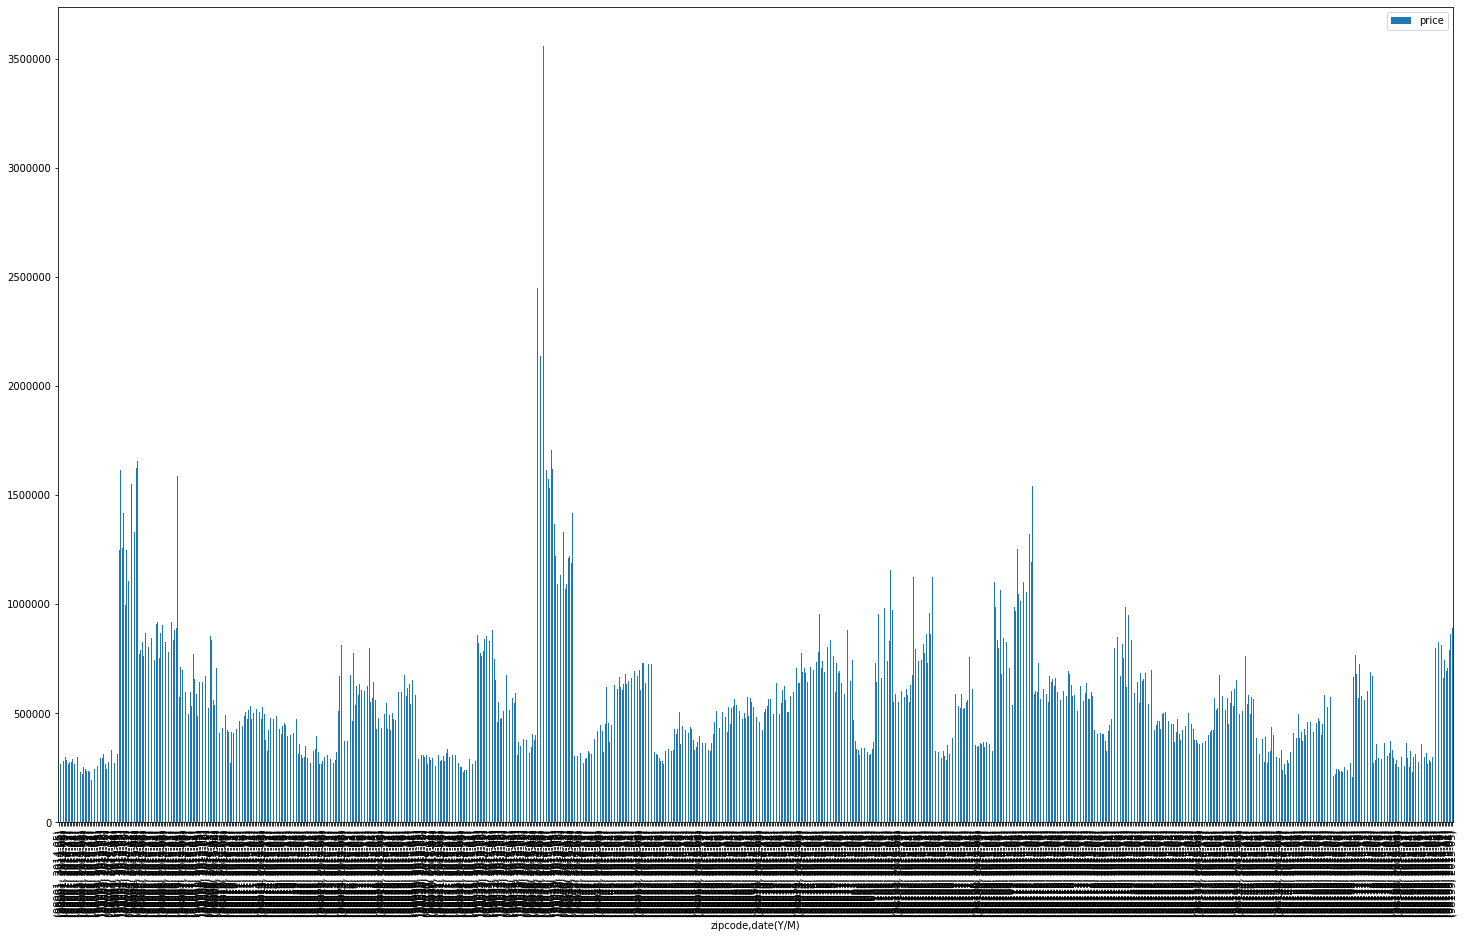

In [15]:
housesalebymonthszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

Current size: [25.0, 15.0]


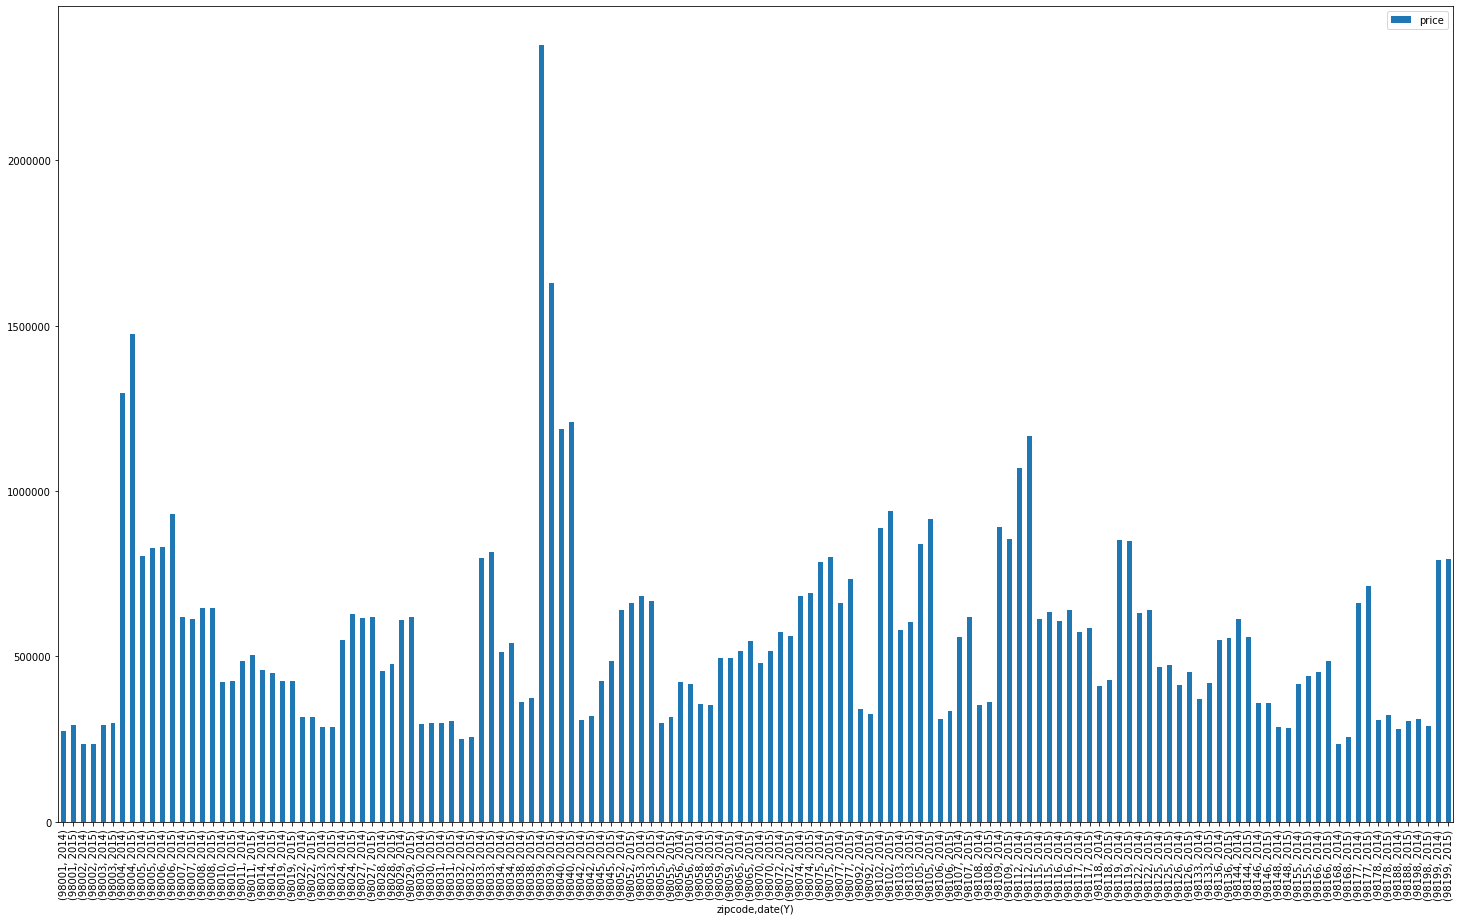

In [16]:
housesalebyyearszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size


Current size: [25.0, 15.0]


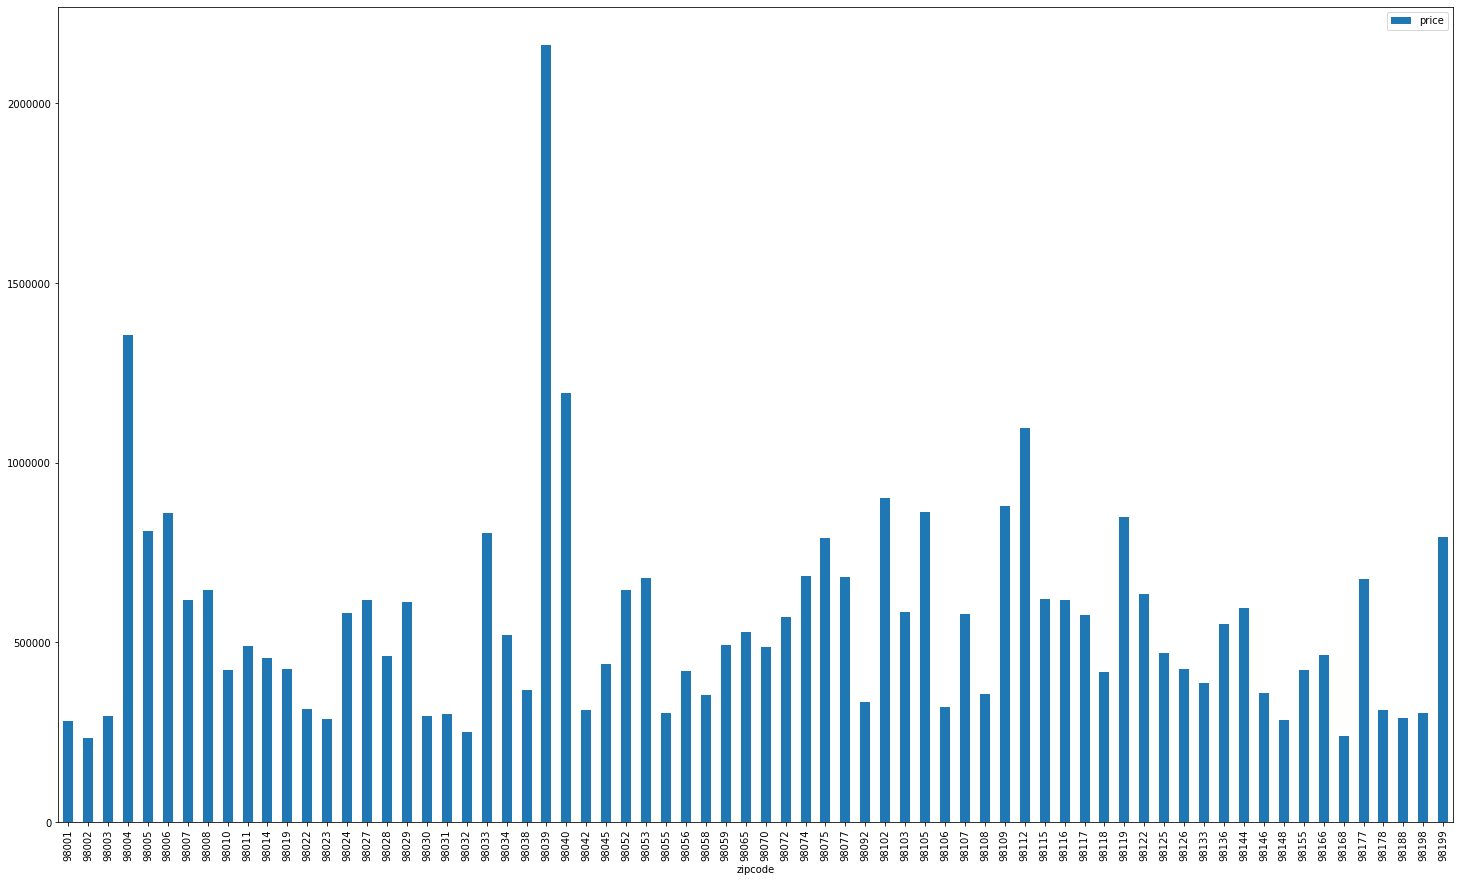

In [17]:
byzipcode=df.groupby('zipcode').mean()

byzipcode.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size


In [18]:
weatherdata = pd.read_json('Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

In [19]:
date=[]
num = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num))
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 554
working on 555
working on 556
working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on

working on 1094
working on 1095
working on 1096
working on 1097
working on 1098
working on 1099
working on 1100
working on 1101
working on 1102
working on 1103
working on 1104
working on 1105
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1126
working on 1127
working on 1128
working on 1129
working on 1130
working on 1131
working on 1132
working on 1133
working on 1134
working on 1135
working on 1136
working on 1137
working on 1138
working on 1139
working on 1140
working on 1141
working on 1142
working on 1143
working on 1144
working on 1145
working on 1146
working on 1147
working on 1148
working on 1149
working on 1150
working on 1151
working on 1152
working on 1153
working on 1154
working on 1155
working 

working on 1608
working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working on 1649
working on 1650
working on 1651
working on 1652
working on 1653
working on 1654
working on 1655
working on 1656
working on 1657
working on 1658
working on 1659
working on 1660
working on 1661
working on 1662
working on 1663
working on 1664
working on 1665
working on 1666
working on 1667
working on 1668
working on 1669
working 

working on 2123
working on 2124
working on 2125
working on 2126
working on 2127
working on 2128
working on 2129
working on 2130
working on 2131
working on 2132
working on 2133
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2159
working on 2160
working on 2161
working on 2162
working on 2163
working on 2164
working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working 

working on 2637
working on 2638
working on 2639
working on 2640
working on 2641
working on 2642
working on 2643
working on 2644
working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working 

working on 3153
working on 3154
working on 3155
working on 3156
working on 3157
working on 3158
working on 3159
working on 3160
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working on 3185
working on 3186
working on 3187
working on 3188
working on 3189
working on 3190
working on 3191
working on 3192
working on 3193
working on 3194
working on 3195
working on 3196
working on 3197
working on 3198
working on 3199
working on 3200
working on 3201
working on 3202
working on 3203
working on 3204
working on 3205
working on 3206
working on 3207
working on 3208
working on 3209
working on 3210
working on 3211
working on 3212
working on 3213
working on 3214
working 

working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working 

working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working 

working on 4696
working on 4697
working on 4698
working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working 

working on 5209
working on 5210
working on 5211
working on 5212
working on 5213
working on 5214
working on 5215
working on 5216
working on 5217
working on 5218
working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working on 5224
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working 

working on 5724
working on 5725
working on 5726
working on 5727
working on 5728
working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working 

working on 6240
working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working 

working on 6756
working on 6757
working on 6758
working on 6759
working on 6760
working on 6761
working on 6762
working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working on 6768
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working on 6793
working on 6794
working on 6795
working on 6796
working on 6797
working on 6798
working on 6799
working on 6800
working on 6801
working on 6802
working on 6803
working on 6804
working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working 

working on 7269
working on 7270
working on 7271
working on 7272
working on 7273
working on 7274
working on 7275
working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working 

working on 7784
working on 7785
working on 7786
working on 7787
working on 7788
working on 7789
working on 7790
working on 7791
working on 7792
working on 7793
working on 7794
working on 7795
working on 7796
working on 7797
working on 7798
working on 7799
working on 7800
working on 7801
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working 

working on 8300
working on 8301
working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working on 8346
working on 8347
working on 8348
working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working 

working on 8814
working on 8815
working on 8816
working on 8817
working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working 

working on 9839
working on 9840
working on 9841
working on 9842
working on 9843
working on 9844
working on 9845
working on 9846
working on 9847
working on 9848
working on 9849
working on 9850
working on 9851
working on 9852
working on 9853
working on 9854
working on 9855
working on 9856
working on 9857
working on 9858
working on 9859
working on 9860
working on 9861
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working 

working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 10377
working on 10378
working on 10379
working on 10380
working on 10381
working on 10382
working on 10383
working on 10384
working on 10385
working on 10386
working on 10387
working on 10388
working on 103

working on 10813
working on 10814
working on 10815
working on 10816
working on 10817
working on 10818
working on 10819
working on 10820
working on 10821
working on 10822
working on 10823
working on 10824
working on 10825
working on 10826
working on 10827
working on 10828
working on 10829
working on 10830
working on 10831
working on 10832
working on 10833
working on 10834
working on 10835
working on 10836
working on 10837
working on 10838
working on 10839
working on 10840
working on 10841
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 10858
working on 10859
working on 10860
working on 10861
working on 10862
working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 108

working on 11776
working on 11777
working on 11778
working on 11779
working on 11780
working on 11781
working on 11782
working on 11783
working on 11784
working on 11785
working on 11786
working on 11787
working on 11788
working on 11789
working on 11790
working on 11791
working on 11792
working on 11793
working on 11794
working on 11795
working on 11796
working on 11797
working on 11798
working on 11799
working on 11800
working on 11801
working on 11802
working on 11803
working on 11804
working on 11805
working on 11806
working on 11807
working on 11808
working on 11809
working on 11810
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11824
working on 11825
working on 11826
working on 11827
working on 11828
working on 11829
working on 11830
working on 11831
working on 11832
working on 11833
working on 118

working on 12258
working on 12259
working on 12260
working on 12261
working on 12262
working on 12263
working on 12264
working on 12265
working on 12266
working on 12267
working on 12268
working on 12269
working on 12270
working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12311
working on 12312
working on 12313
working on 12314
working on 12315
working on 123

working on 12741
working on 12742
working on 12743
working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 12751
working on 12752
working on 12753
working on 12754
working on 12755
working on 12756
working on 12757
working on 12758
working on 12759
working on 12760
working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 127

working on 13704
working on 13705
working on 13706
working on 13707
working on 13708
working on 13709
working on 13710
working on 13711
working on 13712
working on 13713
working on 13714
working on 13715
working on 13716
working on 13717
working on 13718
working on 13719
working on 13720
working on 13721
working on 13722
working on 13723
working on 13724
working on 13725
working on 13726
working on 13727
working on 13728
working on 13729
working on 13730
working on 13731
working on 13732
working on 13733
working on 13734
working on 13735
working on 13736
working on 13737
working on 13738
working on 13739
working on 13740
working on 13741
working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 137

working on 14190
working on 14191
working on 14192
working on 14193
working on 14194
working on 14195
working on 14196
working on 14197
working on 14198
working on 14199
working on 14200
working on 14201
working on 14202
working on 14203
working on 14204
working on 14205
working on 14206
working on 14207
working on 14208
working on 14209
working on 14210
working on 14211
working on 14212
working on 14213
working on 14214
working on 14215
working on 14216
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 142

working on 14675
working on 14676
working on 14677
working on 14678
working on 14679
working on 14680
working on 14681
working on 14682
working on 14683
working on 14684
working on 14685
working on 14686
working on 14687
working on 14688
working on 14689
working on 14690
working on 14691
working on 14692
working on 14693
working on 14694
working on 14695
working on 14696
working on 14697
working on 14698
working on 14699
working on 14700
working on 14701
working on 14702
working on 14703
working on 14704
working on 14705
working on 14706
working on 14707
working on 14708
working on 14709
working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14730
working on 14731
working on 14732
working on 147

working on 15158
working on 15159
working on 15160
working on 15161
working on 15162
working on 15163
working on 15164
working on 15165
working on 15166
working on 15167
working on 15168
working on 15169
working on 15170
working on 15171
working on 15172
working on 15173
working on 15174
working on 15175
working on 15176
working on 15177
working on 15178
working on 15179
working on 15180
working on 15181
working on 15182
working on 15183
working on 15184
working on 15185
working on 15186
working on 15187
working on 15188
working on 15189
working on 15190
working on 15191
working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 152

working on 16121
working on 16122
working on 16123
working on 16124
working on 16125
working on 16126
working on 16127
working on 16128
working on 16129
working on 16130
working on 16131
working on 16132
working on 16133
working on 16134
working on 16135
working on 16136
working on 16137
working on 16138
working on 16139
working on 16140
working on 16141
working on 16142
working on 16143
working on 16144
working on 16145
working on 16146
working on 16147
working on 16148
working on 16149
working on 16150
working on 16151
working on 16152
working on 16153
working on 16154
working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 161

working on 16606
working on 16607
working on 16608
working on 16609
working on 16610
working on 16611
working on 16612
working on 16613
working on 16614
working on 16615
working on 16616
working on 16617
working on 16618
working on 16619
working on 16620
working on 16621
working on 16622
working on 16623
working on 16624
working on 16625
working on 16626
working on 16627
working on 16628
working on 16629
working on 16630
working on 16631
working on 16632
working on 16633
working on 16634
working on 16635
working on 16636
working on 16637
working on 16638
working on 16639
working on 16640
working on 16641
working on 16642
working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 166

working on 17090
working on 17091
working on 17092
working on 17093
working on 17094
working on 17095
working on 17096
working on 17097
working on 17098
working on 17099
working on 17100
working on 17101
working on 17102
working on 17103
working on 17104
working on 17105
working on 17106
working on 17107
working on 17108
working on 17109
working on 17110
working on 17111
working on 17112
working on 17113
working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 171

working on 17574
working on 17575
working on 17576
working on 17577
working on 17578
working on 17579
working on 17580
working on 17581
working on 17582
working on 17583
working on 17584
working on 17585
working on 17586
working on 17587
working on 17588
working on 17589
working on 17590
working on 17591
working on 17592
working on 17593
working on 17594
working on 17595
working on 17596
working on 17597
working on 17598
working on 17599
working on 17600
working on 17601
working on 17602
working on 17603
working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 176

working on 18056
working on 18057
working on 18058
working on 18059
working on 18060
working on 18061
working on 18062
working on 18063
working on 18064
working on 18065
working on 18066
working on 18067
working on 18068
working on 18069
working on 18070
working on 18071
working on 18072
working on 18073
working on 18074
working on 18075
working on 18076
working on 18077
working on 18078
working on 18079
working on 18080
working on 18081
working on 18082
working on 18083
working on 18084
working on 18085
working on 18086
working on 18087
working on 18088
working on 18089
working on 18090
working on 18091
working on 18092
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 181

working on 19023
working on 19024
working on 19025
working on 19026
working on 19027
working on 19028
working on 19029
working on 19030
working on 19031
working on 19032
working on 19033
working on 19034
working on 19035
working on 19036
working on 19037
working on 19038
working on 19039
working on 19040
working on 19041
working on 19042
working on 19043
working on 19044
working on 19045
working on 19046
working on 19047
working on 19048
working on 19049
working on 19050
working on 19051
working on 19052
working on 19053
working on 19054
working on 19055
working on 19056
working on 19057
working on 19058
working on 19059
working on 19060
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 190

working on 19506
working on 19507
working on 19508
working on 19509
working on 19510
working on 19511
working on 19512
working on 19513
working on 19514
working on 19515
working on 19516
working on 19517
working on 19518
working on 19519
working on 19520
working on 19521
working on 19522
working on 19523
working on 19524
working on 19525
working on 19526
working on 19527
working on 19528
working on 19529
working on 19530
working on 19531
working on 19532
working on 19533
working on 19534
working on 19535
working on 19536
working on 19537
working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 195

working on 19989
working on 19990
working on 19991
working on 19992
working on 19993
working on 19994
working on 19995
working on 19996
working on 19997
working on 19998
working on 19999
working on 20000
working on 20001
working on 20002
working on 20003
working on 20004
working on 20005
working on 20006
working on 20007
working on 20008
working on 20009
working on 20010
working on 20011
working on 20012
working on 20013
working on 20014
working on 20015
working on 20016
working on 20017
working on 20018
working on 20019
working on 20020
working on 20021
working on 20022
working on 20023
working on 20024
working on 20025
working on 20026
working on 20027
working on 20028
working on 20029
working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 200

working on 20472
working on 20473
working on 20474
working on 20475
working on 20476
working on 20477
working on 20478
working on 20479
working on 20480
working on 20481
working on 20482
working on 20483
working on 20484
working on 20485
working on 20486
working on 20487
working on 20488
working on 20489
working on 20490
working on 20491
working on 20492
working on 20493
working on 20494
working on 20495
working on 20496
working on 20497
working on 20498
working on 20499
working on 20500
working on 20501
working on 20502
working on 20503
working on 20504
working on 20505
working on 20506
working on 20507
working on 20508
working on 20509
working on 20510
working on 20511
working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 205

working on 20956
working on 20957
working on 20958
working on 20959
working on 20960
working on 20961
working on 20962
working on 20963
working on 20964
working on 20965
working on 20966
working on 20967
working on 20968
working on 20969
working on 20970
working on 20971
working on 20972
working on 20973
working on 20974
working on 20975
working on 20976
working on 20977
working on 20978
working on 20979
working on 20980
working on 20981
working on 20982
working on 20983
working on 20984
working on 20985
working on 20986
working on 20987
working on 20988
working on 20989
working on 20990
working on 20991
working on 20992
working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 210

working on 21441
working on 21442
working on 21443
working on 21444
working on 21445
working on 21446
working on 21447
working on 21448
working on 21449
working on 21450
working on 21451
working on 21452
working on 21453
working on 21454
working on 21455
working on 21456
working on 21457
working on 21458
working on 21459
working on 21460
working on 21461
working on 21462
working on 21463
working on 21464
working on 21465
working on 21466
working on 21467
working on 21468
working on 21469
working on 21470
working on 21471
working on 21472
working on 21473
working on 21474
working on 21475
working on 21476
working on 21477
working on 21478
working on 21479
working on 21480
working on 21481
working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 214

working on 21926
working on 21927
working on 21928
working on 21929
working on 21930
working on 21931
working on 21932
working on 21933
working on 21934
working on 21935
working on 21936
working on 21937
working on 21938
working on 21939
working on 21940
working on 21941
working on 21942
working on 21943
working on 21944
working on 21945
working on 21946
working on 21947
working on 21948
working on 21949
working on 21950
working on 21951
working on 21952
working on 21953
working on 21954
working on 21955
working on 21956
working on 21957
working on 21958
working on 21959
working on 21960
working on 21961
working on 21962
working on 21963
working on 21964
working on 21965
working on 21966
working on 21967
working on 21968
working on 21969
working on 21970
working on 21971
working on 21972
working on 21973
working on 21974
working on 21975
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21982
working on 21983
working on 219

working on 22408
working on 22409
working on 22410
working on 22411
working on 22412
working on 22413
working on 22414
working on 22415
working on 22416
working on 22417
working on 22418
working on 22419
working on 22420
working on 22421
working on 22422
working on 22423
working on 22424
working on 22425
working on 22426
working on 22427
working on 22428
working on 22429
working on 22430
working on 22431
working on 22432
working on 22433
working on 22434
working on 22435
working on 22436
working on 22437
working on 22438
working on 22439
working on 22440
working on 22441
working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 224

working on 22891
working on 22892
working on 22893
working on 22894
working on 22895
working on 22896
working on 22897
working on 22898
working on 22899
working on 22900
working on 22901
working on 22902
working on 22903
working on 22904
working on 22905
working on 22906
working on 22907
working on 22908
working on 22909
working on 22910
working on 22911
working on 22912
working on 22913
working on 22914
working on 22915
working on 22916
working on 22917
working on 22918
working on 22919
working on 22920
working on 22921
working on 22922
working on 22923
working on 22924
working on 22925
working on 22926
working on 22927
working on 22928
working on 22929
working on 22930
working on 22931
working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944
working on 22945
working on 22946
working on 22947
working on 22948
working on 229

working on 23374
working on 23375
working on 23376
working on 23377
working on 23378
working on 23379
working on 23380
working on 23381
working on 23382
working on 23383
working on 23384
working on 23385
working on 23386
working on 23387
working on 23388
working on 23389
working on 23390
working on 23391
working on 23392
working on 23393
working on 23394
working on 23395
working on 23396
working on 23397
working on 23398
working on 23399
working on 23400
working on 23401
working on 23402
working on 23403
working on 23404
working on 23405
working on 23406
working on 23407
working on 23408
working on 23409
working on 23410
working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 234

working on 23859
working on 23860
working on 23861
working on 23862
working on 23863
working on 23864
working on 23865
working on 23866
working on 23867
working on 23868
working on 23869
working on 23870
working on 23871
working on 23872
working on 23873
working on 23874
working on 23875
working on 23876
working on 23877
working on 23878
working on 23879
working on 23880
working on 23881
working on 23882
working on 23883
working on 23884
working on 23885
working on 23886
working on 23887
working on 23888
working on 23889
working on 23890
working on 23891
working on 23892
working on 23893
working on 23894
working on 23895
working on 23896
working on 23897
working on 23898
working on 23899
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 239

working on 24343
working on 24344
working on 24345
working on 24346
working on 24347
working on 24348
working on 24349
working on 24350
working on 24351
working on 24352
working on 24353
working on 24354
working on 24355
working on 24356
working on 24357
working on 24358
working on 24359
working on 24360
working on 24361
working on 24362
working on 24363
working on 24364
working on 24365
working on 24366
working on 24367
working on 24368
working on 24369
working on 24370
working on 24371
working on 24372
working on 24373
working on 24374
working on 24375
working on 24376
working on 24377
working on 24378
working on 24379
working on 24380
working on 24381
working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 244

working on 24826
working on 24827
working on 24828
working on 24829
working on 24830
working on 24831
working on 24832
working on 24833
working on 24834
working on 24835
working on 24836
working on 24837
working on 24838
working on 24839
working on 24840
working on 24841
working on 24842
working on 24843
working on 24844
working on 24845
working on 24846
working on 24847
working on 24848
working on 24849
working on 24850
working on 24851
working on 24852
working on 24853
working on 24854
working on 24855
working on 24856
working on 24857
working on 24858
working on 24859
working on 24860
working on 24861
working on 24862
working on 24863
working on 24864
working on 24865
working on 24866
working on 24867
working on 24868
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 248

working on 25312
working on 25313
working on 25314
working on 25315
working on 25316
working on 25317
working on 25318
working on 25319
working on 25320
working on 25321
working on 25322
working on 25323
working on 25324
working on 25325
working on 25326
working on 25327
working on 25328
working on 25329
working on 25330
working on 25331
working on 25332
working on 25333
working on 25334
working on 25335
working on 25336
working on 25337
working on 25338
working on 25339
working on 25340
working on 25341
working on 25342
working on 25343
working on 25344
working on 25345
working on 25346
working on 25347
working on 25348
working on 25349
working on 25350
working on 25351
working on 25352
working on 25353
working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 253

working on 25794
working on 25795
working on 25796
working on 25797
working on 25798
working on 25799
working on 25800
working on 25801
working on 25802
working on 25803
working on 25804
working on 25805
working on 25806
working on 25807
working on 25808
working on 25809
working on 25810
working on 25811
working on 25812
working on 25813
working on 25814
working on 25815
working on 25816
working on 25817
working on 25818
working on 25819
working on 25820
working on 25821
working on 25822
working on 25823
working on 25824
working on 25825
working on 25826
working on 25827
working on 25828
working on 25829
working on 25830
working on 25831
working on 25832
working on 25833
working on 25834
working on 25835
working on 25836
working on 25837
working on 25838
working on 25839
working on 25840
working on 25841
working on 25842
working on 25843
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25850
working on 25851
working on 258

In [20]:
weatherdata['date']= date
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

In [21]:
weatherdata.sort_values('date')


city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

In [22]:
weatherdata = weatherdata.drop(weatherdata.columns[[0, 5, 6, 7, 8]], axis=1)
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01  
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01  
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01  
...                                                  ...         ...  
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31  
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31  
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01  

[26277 rows x 5 columns]

In [23]:
weatherdata['weather'][0][0]['main']

'Clear'

In [24]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num1))
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on

working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working on 1415
working on 1416
working on 1417
working on 1418
working on 1419
working on 1420
working on 1421
working on 1422
working on 1423
working on 1424
working on 1425
working on 1426
working on 1427
working on 1428
working on 1429
working on 1430
working on 1431
working on 1432
working on 1433
working on 1434
working on 1435
working on 1436
working on 1437
working on 1438
working on 1439
working on 1440
working on 1441
working on 1442
working on 1443
working on 1444
working on 1445
working on 1446
working on 1447
working on 1448
working on 1449
working on 1450
working on 1451
working on 1452
working on 1453
working on 1454
working on 1455
working on 1456
working on 1457
working on 1458
working on 1459
working on 1460
working on 1461
working on 1462
working on 1463
working 

working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2159
working on 2160
working on 2161
working on 2162
working on 2163
working on 2164
working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working on 2185
working on 2186
working on 2187
working on 2188
working on 2189
working on 2190
working on 2191
working on 2192
working on 2193
working on 2194
working on 2195
working on 2196
working on 2197
working on 2198
working on 2199
working on 2200
working on 2201
working 

working on 2822
working on 2823
working on 2824
working on 2825
working on 2826
working on 2827
working on 2828
working on 2829
working on 2830
working on 2831
working on 2832
working on 2833
working on 2834
working on 2835
working on 2836
working on 2837
working on 2838
working on 2839
working on 2840
working on 2841
working on 2842
working on 2843
working on 2844
working on 2845
working on 2846
working on 2847
working on 2848
working on 2849
working on 2850
working on 2851
working on 2852
working on 2853
working on 2854
working on 2855
working on 2856
working on 2857
working on 2858
working on 2859
working on 2860
working on 2861
working on 2862
working on 2863
working on 2864
working on 2865
working on 2866
working on 2867
working on 2868
working on 2869
working on 2870
working on 2871
working on 2872
working on 2873
working on 2874
working on 2875
working on 2876
working on 2877
working on 2878
working on 2879
working on 2880
working on 2881
working on 2882
working on 2883
working 

working on 3373
working on 3374
working on 3375
working on 3376
working on 3377
working on 3378
working on 3379
working on 3380
working on 3381
working on 3382
working on 3383
working on 3384
working on 3385
working on 3386
working on 3387
working on 3388
working on 3389
working on 3390
working on 3391
working on 3392
working on 3393
working on 3394
working on 3395
working on 3396
working on 3397
working on 3398
working on 3399
working on 3400
working on 3401
working on 3402
working on 3403
working on 3404
working on 3405
working on 3406
working on 3407
working on 3408
working on 3409
working on 3410
working on 3411
working on 3412
working on 3413
working on 3414
working on 3415
working on 3416
working on 3417
working on 3418
working on 3419
working on 3420
working on 3421
working on 3422
working on 3423
working on 3424
working on 3425
working on 3426
working on 3427
working on 3428
working on 3429
working on 3430
working on 3431
working on 3432
working on 3433
working on 3434
working 

working on 4161
working on 4162
working on 4163
working on 4164
working on 4165
working on 4166
working on 4167
working on 4168
working on 4169
working on 4170
working on 4171
working on 4172
working on 4173
working on 4174
working on 4175
working on 4176
working on 4177
working on 4178
working on 4179
working on 4180
working on 4181
working on 4182
working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working 

working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working on 4761
working on 4762
working on 4763
working on 4764
working on 4765
working on 4766
working 

working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working on 5277
working on 5278
working on 5279
working on 5280
working on 5281
working on 5282
working on 5283
working on 5284
working on 5285
working on 5286
working on 5287
working on 5288
working on 5289
working on 5290
working on 5291
working on 5292
working on 5293
working on 5294
working on 5295
working on 5296
working on 5297
working on 5298
working on 5299
working on 5300
working on 5301
working on 5302
working on 5303
working on 5304
working on 5305
working on 5306
working on 5307
working on 5308
working 

working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working on 5791
working on 5792
working on 5793
working on 5794
working on 5795
working on 5796
working on 5797
working on 5798
working on 5799
working on 5800
working on 5801
working on 5802
working on 5803
working on 5804
working on 5805
working on 5806
working on 5807
working on 5808
working on 5809
working on 5810
working on 5811
working on 5812
working on 5813
working on 5814
working on 5815
working on 5816
working on 5817
working on 5818
working on 5819
working on 5820
working on 5821
working on 5822
working on 5823
working on 5824
working on 5825
working on 5826
working on 5827
working on 5828
working on 5829
working on 5830
working on 5831
working on 5832
working on 5833
working on 5834
working on 5835
working on 5836
working on 5837
working on 5838
working on 5839
working on 5840
working on 5841
working on 5842
working on 5843
working on 5844
working on 5845
working on 5846
working on 5847
working 

working on 6501
working on 6502
working on 6503
working on 6504
working on 6505
working on 6506
working on 6507
working on 6508
working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working on 6527
working on 6528
working on 6529
working on 6530
working on 6531
working on 6532
working on 6533
working on 6534
working on 6535
working on 6536
working on 6537
working on 6538
working on 6539
working on 6540
working on 6541
working on 6542
working on 6543
working on 6544
working on 6545
working on 6546
working on 6547
working on 6548
working on 6549
working on 6550
working on 6551
working on 6552
working on 6553
working on 6554
working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working 

working on 7022
working on 7023
working on 7024
working on 7025
working on 7026
working on 7027
working on 7028
working on 7029
working on 7030
working on 7031
working on 7032
working on 7033
working on 7034
working on 7035
working on 7036
working on 7037
working on 7038
working on 7039
working on 7040
working on 7041
working on 7042
working on 7043
working on 7044
working on 7045
working on 7046
working on 7047
working on 7048
working on 7049
working on 7050
working on 7051
working on 7052
working on 7053
working on 7054
working on 7055
working on 7056
working on 7057
working on 7058
working on 7059
working on 7060
working on 7061
working on 7062
working on 7063
working on 7064
working on 7065
working on 7066
working on 7067
working on 7068
working on 7069
working on 7070
working on 7071
working on 7072
working on 7073
working on 7074
working on 7075
working on 7076
working on 7077
working on 7078
working on 7079
working on 7080
working on 7081
working on 7082
working on 7083
working 

working on 7545
working on 7546
working on 7547
working on 7548
working on 7549
working on 7550
working on 7551
working on 7552
working on 7553
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working on 7561
working on 7562
working on 7563
working on 7564
working on 7565
working on 7566
working on 7567
working on 7568
working on 7569
working on 7570
working on 7571
working on 7572
working on 7573
working on 7574
working on 7575
working on 7576
working on 7577
working on 7578
working on 7579
working on 7580
working on 7581
working on 7582
working on 7583
working on 7584
working on 7585
working on 7586
working on 7587
working on 7588
working on 7589
working on 7590
working on 7591
working on 7592
working on 7593
working on 7594
working on 7595
working on 7596
working on 7597
working on 7598
working on 7599
working on 7600
working on 7601
working on 7602
working on 7603
working on 7604
working on 7605
working on 7606
working 

working on 8284
working on 8285
working on 8286
working on 8287
working on 8288
working on 8289
working on 8290
working on 8291
working on 8292
working on 8293
working on 8294
working on 8295
working on 8296
working on 8297
working on 8298
working on 8299
working on 8300
working on 8301
working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working 

working on 9078
working on 9079
working on 9080
working on 9081
working on 9082
working on 9083
working on 9084
working on 9085
working on 9086
working on 9087
working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working on 9109
working on 9110
working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working on 9133
working on 9134
working on 9135
working on 9136
working on 9137
working on 9138
working on 9139
working 

working on 9609
working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working on 9628
working on 9629
working on 9630
working on 9631
working on 9632
working on 9633
working on 9634
working on 9635
working on 9636
working on 9637
working on 9638
working on 9639
working on 9640
working on 9641
working on 9642
working on 9643
working on 9644
working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working 

working on 10123
working on 10124
working on 10125
working on 10126
working on 10127
working on 10128
working on 10129
working on 10130
working on 10131
working on 10132
working on 10133
working on 10134
working on 10135
working on 10136
working on 10137
working on 10138
working on 10139
working on 10140
working on 10141
working on 10142
working on 10143
working on 10144
working on 10145
working on 10146
working on 10147
working on 10148
working on 10149
working on 10150
working on 10151
working on 10152
working on 10153
working on 10154
working on 10155
working on 10156
working on 10157
working on 10158
working on 10159
working on 10160
working on 10161
working on 10162
working on 10163
working on 10164
working on 10165
working on 10166
working on 10167
working on 10168
working on 10169
working on 10170
working on 10171
working on 10172
working on 10173
working on 10174
working on 10175
working on 10176
working on 10177
working on 10178
working on 10179
working on 10180
working on 101

working on 10627
working on 10628
working on 10629
working on 10630
working on 10631
working on 10632
working on 10633
working on 10634
working on 10635
working on 10636
working on 10637
working on 10638
working on 10639
working on 10640
working on 10641
working on 10642
working on 10643
working on 10644
working on 10645
working on 10646
working on 10647
working on 10648
working on 10649
working on 10650
working on 10651
working on 10652
working on 10653
working on 10654
working on 10655
working on 10656
working on 10657
working on 10658
working on 10659
working on 10660
working on 10661
working on 10662
working on 10663
working on 10664
working on 10665
working on 10666
working on 10667
working on 10668
working on 10669
working on 10670
working on 10671
working on 10672
working on 10673
working on 10674
working on 10675
working on 10676
working on 10677
working on 10678
working on 10679
working on 10680
working on 10681
working on 10682
working on 10683
working on 10684
working on 106

working on 11147
working on 11148
working on 11149
working on 11150
working on 11151
working on 11152
working on 11153
working on 11154
working on 11155
working on 11156
working on 11157
working on 11158
working on 11159
working on 11160
working on 11161
working on 11162
working on 11163
working on 11164
working on 11165
working on 11166
working on 11167
working on 11168
working on 11169
working on 11170
working on 11171
working on 11172
working on 11173
working on 11174
working on 11175
working on 11176
working on 11177
working on 11178
working on 11179
working on 11180
working on 11181
working on 11182
working on 11183
working on 11184
working on 11185
working on 11186
working on 11187
working on 11188
working on 11189
working on 11190
working on 11191
working on 11192
working on 11193
working on 11194
working on 11195
working on 11196
working on 11197
working on 11198
working on 11199
working on 11200
working on 11201
working on 11202
working on 11203
working on 11204
working on 112

working on 11642
working on 11643
working on 11644
working on 11645
working on 11646
working on 11647
working on 11648
working on 11649
working on 11650
working on 11651
working on 11652
working on 11653
working on 11654
working on 11655
working on 11656
working on 11657
working on 11658
working on 11659
working on 11660
working on 11661
working on 11662
working on 11663
working on 11664
working on 11665
working on 11666
working on 11667
working on 11668
working on 11669
working on 11670
working on 11671
working on 11672
working on 11673
working on 11674
working on 11675
working on 11676
working on 11677
working on 11678
working on 11679
working on 11680
working on 11681
working on 11682
working on 11683
working on 11684
working on 11685
working on 11686
working on 11687
working on 11688
working on 11689
working on 11690
working on 11691
working on 11692
working on 11693
working on 11694
working on 11695
working on 11696
working on 11697
working on 11698
working on 11699
working on 117

working on 12171
working on 12172
working on 12173
working on 12174
working on 12175
working on 12176
working on 12177
working on 12178
working on 12179
working on 12180
working on 12181
working on 12182
working on 12183
working on 12184
working on 12185
working on 12186
working on 12187
working on 12188
working on 12189
working on 12190
working on 12191
working on 12192
working on 12193
working on 12194
working on 12195
working on 12196
working on 12197
working on 12198
working on 12199
working on 12200
working on 12201
working on 12202
working on 12203
working on 12204
working on 12205
working on 12206
working on 12207
working on 12208
working on 12209
working on 12210
working on 12211
working on 12212
working on 12213
working on 12214
working on 12215
working on 12216
working on 12217
working on 12218
working on 12219
working on 12220
working on 12221
working on 12222
working on 12223
working on 12224
working on 12225
working on 12226
working on 12227
working on 12228
working on 122

working on 13194
working on 13195
working on 13196
working on 13197
working on 13198
working on 13199
working on 13200
working on 13201
working on 13202
working on 13203
working on 13204
working on 13205
working on 13206
working on 13207
working on 13208
working on 13209
working on 13210
working on 13211
working on 13212
working on 13213
working on 13214
working on 13215
working on 13216
working on 13217
working on 13218
working on 13219
working on 13220
working on 13221
working on 13222
working on 13223
working on 13224
working on 13225
working on 13226
working on 13227
working on 13228
working on 13229
working on 13230
working on 13231
working on 13232
working on 13233
working on 13234
working on 13235
working on 13236
working on 13237
working on 13238
working on 13239
working on 13240
working on 13241
working on 13242
working on 13243
working on 13244
working on 13245
working on 13246
working on 13247
working on 13248
working on 13249
working on 13250
working on 13251
working on 132

working on 13956
working on 13957
working on 13958
working on 13959
working on 13960
working on 13961
working on 13962
working on 13963
working on 13964
working on 13965
working on 13966
working on 13967
working on 13968
working on 13969
working on 13970
working on 13971
working on 13972
working on 13973
working on 13974
working on 13975
working on 13976
working on 13977
working on 13978
working on 13979
working on 13980
working on 13981
working on 13982
working on 13983
working on 13984
working on 13985
working on 13986
working on 13987
working on 13988
working on 13989
working on 13990
working on 13991
working on 13992
working on 13993
working on 13994
working on 13995
working on 13996
working on 13997
working on 13998
working on 13999
working on 14000
working on 14001
working on 14002
working on 14003
working on 14004
working on 14005
working on 14006
working on 14007
working on 14008
working on 14009
working on 14010
working on 14011
working on 14012
working on 14013
working on 140

working on 14444
working on 14445
working on 14446
working on 14447
working on 14448
working on 14449
working on 14450
working on 14451
working on 14452
working on 14453
working on 14454
working on 14455
working on 14456
working on 14457
working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 14478
working on 14479
working on 14480
working on 14481
working on 14482
working on 14483
working on 14484
working on 14485
working on 14486
working on 14487
working on 14488
working on 14489
working on 14490
working on 14491
working on 14492
working on 14493
working on 14494
working on 14495
working on 14496
working on 14497
working on 14498
working on 14499
working on 14500
working on 14501
working on 145

working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 14988
working on 14989
working on 14990
working on 14991
working on 14992
working on 14993
working on 14994
working on 14995
working on 14996
working on 14997
working on 14998
working on 14999
working on 15000
working on 15001
working on 15002
working on 15003
working on 15004
working on 15005
working on 15006
working on 15007
working on 15008
working on 15009
working on 15010
working on 15011
working on 15012
working on 15013
working on 15014
working on 15015
working on 15016
working on 15017
working on 15018
working on 15019
working on 15020
working on 15021
working on 15022
working on 15023
working on 15024
working on 15025
working on 15026
working on 15027
working on 15028
working on 150

working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 15718
working on 15719
working on 15720
working on 15721
working on 15722
working on 15723
working on 15724
working on 15725
working on 15726
working on 15727
working on 15728
working on 15729
working on 15730
working on 15731
working on 15732
working on 15733
working on 15734
working on 15735
working on 15736
working on 15737
working on 15738
working on 15739
working on 15740
working on 15741
working on 15742
working on 15743
working on 15744
working on 15745
working on 15746
working on 15747
working on 157

working on 16425
working on 16426
working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 16462
working on 16463
working on 16464
working on 16465
working on 16466
working on 16467
working on 16468
working on 16469
working on 16470
working on 16471
working on 16472
working on 16473
working on 16474
working on 16475
working on 16476
working on 16477
working on 16478
working on 16479
working on 16480
working on 16481
working on 16482
working on 164

working on 16945
working on 16946
working on 16947
working on 16948
working on 16949
working on 16950
working on 16951
working on 16952
working on 16953
working on 16954
working on 16955
working on 16956
working on 16957
working on 16958
working on 16959
working on 16960
working on 16961
working on 16962
working on 16963
working on 16964
working on 16965
working on 16966
working on 16967
working on 16968
working on 16969
working on 16970
working on 16971
working on 16972
working on 16973
working on 16974
working on 16975
working on 16976
working on 16977
working on 16978
working on 16979
working on 16980
working on 16981
working on 16982
working on 16983
working on 16984
working on 16985
working on 16986
working on 16987
working on 16988
working on 16989
working on 16990
working on 16991
working on 16992
working on 16993
working on 16994
working on 16995
working on 16996
working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 170

working on 17429
working on 17430
working on 17431
working on 17432
working on 17433
working on 17434
working on 17435
working on 17436
working on 17437
working on 17438
working on 17439
working on 17440
working on 17441
working on 17442
working on 17443
working on 17444
working on 17445
working on 17446
working on 17447
working on 17448
working on 17449
working on 17450
working on 17451
working on 17452
working on 17453
working on 17454
working on 17455
working on 17456
working on 17457
working on 17458
working on 17459
working on 17460
working on 17461
working on 17462
working on 17463
working on 17464
working on 17465
working on 17466
working on 17467
working on 17468
working on 17469
working on 17470
working on 17471
working on 17472
working on 17473
working on 17474
working on 17475
working on 17476
working on 17477
working on 17478
working on 17479
working on 17480
working on 17481
working on 17482
working on 17483
working on 17484
working on 17485
working on 17486
working on 174

working on 18201
working on 18202
working on 18203
working on 18204
working on 18205
working on 18206
working on 18207
working on 18208
working on 18209
working on 18210
working on 18211
working on 18212
working on 18213
working on 18214
working on 18215
working on 18216
working on 18217
working on 18218
working on 18219
working on 18220
working on 18221
working on 18222
working on 18223
working on 18224
working on 18225
working on 18226
working on 18227
working on 18228
working on 18229
working on 18230
working on 18231
working on 18232
working on 18233
working on 18234
working on 18235
working on 18236
working on 18237
working on 18238
working on 18239
working on 18240
working on 18241
working on 18242
working on 18243
working on 18244
working on 18245
working on 18246
working on 18247
working on 18248
working on 18249
working on 18250
working on 18251
working on 18252
working on 18253
working on 18254
working on 18255
working on 18256
working on 18257
working on 18258
working on 182

working on 18951
working on 18952
working on 18953
working on 18954
working on 18955
working on 18956
working on 18957
working on 18958
working on 18959
working on 18960
working on 18961
working on 18962
working on 18963
working on 18964
working on 18965
working on 18966
working on 18967
working on 18968
working on 18969
working on 18970
working on 18971
working on 18972
working on 18973
working on 18974
working on 18975
working on 18976
working on 18977
working on 18978
working on 18979
working on 18980
working on 18981
working on 18982
working on 18983
working on 18984
working on 18985
working on 18986
working on 18987
working on 18988
working on 18989
working on 18990
working on 18991
working on 18992
working on 18993
working on 18994
working on 18995
working on 18996
working on 18997
working on 18998
working on 18999
working on 19000
working on 19001
working on 19002
working on 19003
working on 19004
working on 19005
working on 19006
working on 19007
working on 19008
working on 190

working on 19719
working on 19720
working on 19721
working on 19722
working on 19723
working on 19724
working on 19725
working on 19726
working on 19727
working on 19728
working on 19729
working on 19730
working on 19731
working on 19732
working on 19733
working on 19734
working on 19735
working on 19736
working on 19737
working on 19738
working on 19739
working on 19740
working on 19741
working on 19742
working on 19743
working on 19744
working on 19745
working on 19746
working on 19747
working on 19748
working on 19749
working on 19750
working on 19751
working on 19752
working on 19753
working on 19754
working on 19755
working on 19756
working on 19757
working on 19758
working on 19759
working on 19760
working on 19761
working on 19762
working on 19763
working on 19764
working on 19765
working on 19766
working on 19767
working on 19768
working on 19769
working on 19770
working on 19771
working on 19772
working on 19773
working on 19774
working on 19775
working on 19776
working on 197

working on 20465
working on 20466
working on 20467
working on 20468
working on 20469
working on 20470
working on 20471
working on 20472
working on 20473
working on 20474
working on 20475
working on 20476
working on 20477
working on 20478
working on 20479
working on 20480
working on 20481
working on 20482
working on 20483
working on 20484
working on 20485
working on 20486
working on 20487
working on 20488
working on 20489
working on 20490
working on 20491
working on 20492
working on 20493
working on 20494
working on 20495
working on 20496
working on 20497
working on 20498
working on 20499
working on 20500
working on 20501
working on 20502
working on 20503
working on 20504
working on 20505
working on 20506
working on 20507
working on 20508
working on 20509
working on 20510
working on 20511
working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 205

working on 20984
working on 20985
working on 20986
working on 20987
working on 20988
working on 20989
working on 20990
working on 20991
working on 20992
working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21026
working on 21027
working on 21028
working on 21029
working on 21030
working on 21031
working on 21032
working on 21033
working on 21034
working on 21035
working on 21036
working on 21037
working on 21038
working on 21039
working on 21040
working on 21041
working on 210

working on 21734
working on 21735
working on 21736
working on 21737
working on 21738
working on 21739
working on 21740
working on 21741
working on 21742
working on 21743
working on 21744
working on 21745
working on 21746
working on 21747
working on 21748
working on 21749
working on 21750
working on 21751
working on 21752
working on 21753
working on 21754
working on 21755
working on 21756
working on 21757
working on 21758
working on 21759
working on 21760
working on 21761
working on 21762
working on 21763
working on 21764
working on 21765
working on 21766
working on 21767
working on 21768
working on 21769
working on 21770
working on 21771
working on 21772
working on 21773
working on 21774
working on 21775
working on 21776
working on 21777
working on 21778
working on 21779
working on 21780
working on 21781
working on 21782
working on 21783
working on 21784
working on 21785
working on 21786
working on 21787
working on 21788
working on 21789
working on 21790
working on 21791
working on 217

working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 22481
working on 22482
working on 22483
working on 22484
working on 22485
working on 22486
working on 22487
working on 22488
working on 22489
working on 22490
working on 22491
working on 22492
working on 22493
working on 22494
working on 22495
working on 22496
working on 22497
working on 22498
working on 22499
working on 22500
working on 22501
working on 22502
working on 22503
working on 22504
working on 22505
working on 22506
working on 22507
working on 22508
working on 22509
working on 22510
working on 22511
working on 22512
working on 22513
working on 22514
working on 22515
working on 22516
working on 22517
working on 22518
working on 22519
working on 225

working on 23019
working on 23020
working on 23021
working on 23022
working on 23023
working on 23024
working on 23025
working on 23026
working on 23027
working on 23028
working on 23029
working on 23030
working on 23031
working on 23032
working on 23033
working on 23034
working on 23035
working on 23036
working on 23037
working on 23038
working on 23039
working on 23040
working on 23041
working on 23042
working on 23043
working on 23044
working on 23045
working on 23046
working on 23047
working on 23048
working on 23049
working on 23050
working on 23051
working on 23052
working on 23053
working on 23054
working on 23055
working on 23056
working on 23057
working on 23058
working on 23059
working on 23060
working on 23061
working on 23062
working on 23063
working on 23064
working on 23065
working on 23066
working on 23067
working on 23068
working on 23069
working on 23070
working on 23071
working on 23072
working on 23073
working on 23074
working on 23075
working on 23076
working on 230

working on 23613
working on 23614
working on 23615
working on 23616
working on 23617
working on 23618
working on 23619
working on 23620
working on 23621
working on 23622
working on 23623
working on 23624
working on 23625
working on 23626
working on 23627
working on 23628
working on 23629
working on 23630
working on 23631
working on 23632
working on 23633
working on 23634
working on 23635
working on 23636
working on 23637
working on 23638
working on 23639
working on 23640
working on 23641
working on 23642
working on 23643
working on 23644
working on 23645
working on 23646
working on 23647
working on 23648
working on 23649
working on 23650
working on 23651
working on 23652
working on 23653
working on 23654
working on 23655
working on 23656
working on 23657
working on 23658
working on 23659
working on 23660
working on 23661
working on 23662
working on 23663
working on 23664
working on 23665
working on 23666
working on 23667
working on 23668
working on 23669
working on 23670
working on 236

working on 24180
working on 24181
working on 24182
working on 24183
working on 24184
working on 24185
working on 24186
working on 24187
working on 24188
working on 24189
working on 24190
working on 24191
working on 24192
working on 24193
working on 24194
working on 24195
working on 24196
working on 24197
working on 24198
working on 24199
working on 24200
working on 24201
working on 24202
working on 24203
working on 24204
working on 24205
working on 24206
working on 24207
working on 24208
working on 24209
working on 24210
working on 24211
working on 24212
working on 24213
working on 24214
working on 24215
working on 24216
working on 24217
working on 24218
working on 24219
working on 24220
working on 24221
working on 24222
working on 24223
working on 24224
working on 24225
working on 24226
working on 24227
working on 24228
working on 24229
working on 24230
working on 24231
working on 24232
working on 24233
working on 24234
working on 24235
working on 24236
working on 24237
working on 242

working on 24781
working on 24782
working on 24783
working on 24784
working on 24785
working on 24786
working on 24787
working on 24788
working on 24789
working on 24790
working on 24791
working on 24792
working on 24793
working on 24794
working on 24795
working on 24796
working on 24797
working on 24798
working on 24799
working on 24800
working on 24801
working on 24802
working on 24803
working on 24804
working on 24805
working on 24806
working on 24807
working on 24808
working on 24809
working on 24810
working on 24811
working on 24812
working on 24813
working on 24814
working on 24815
working on 24816
working on 24817
working on 24818
working on 24819
working on 24820
working on 24821
working on 24822
working on 24823
working on 24824
working on 24825
working on 24826
working on 24827
working on 24828
working on 24829
working on 24830
working on 24831
working on 24832
working on 24833
working on 24834
working on 24835
working on 24836
working on 24837
working on 24838
working on 248

working on 25490
working on 25491
working on 25492
working on 25493
working on 25494
working on 25495
working on 25496
working on 25497
working on 25498
working on 25499
working on 25500
working on 25501
working on 25502
working on 25503
working on 25504
working on 25505
working on 25506
working on 25507
working on 25508
working on 25509
working on 25510
working on 25511
working on 25512
working on 25513
working on 25514
working on 25515
working on 25516
working on 25517
working on 25518
working on 25519
working on 25520
working on 25521
working on 25522
working on 25523
working on 25524
working on 25525
working on 25526
working on 25527
working on 25528
working on 25529
working on 25530
working on 25531
working on 25532
working on 25533
working on 25534
working on 25535
working on 25536
working on 25537
working on 25538
working on 25539
working on 25540
working on 25541
working on 25542
working on 25543
working on 25544
working on 25545
working on 25546
working on 25547
working on 255

working on 26005
working on 26006
working on 26007
working on 26008
working on 26009
working on 26010
working on 26011
working on 26012
working on 26013
working on 26014
working on 26015
working on 26016
working on 26017
working on 26018
working on 26019
working on 26020
working on 26021
working on 26022
working on 26023
working on 26024
working on 26025
working on 26026
working on 26027
working on 26028
working on 26029
working on 26030
working on 26031
working on 26032
working on 26033
working on 26034
working on 26035
working on 26036
working on 26037
working on 26038
working on 26039
working on 26040
working on 26041
working on 26042
working on 26043
working on 26044
working on 26045
working on 26046
working on 26047
working on 26048
working on 26049
working on 26050
working on 26051
working on 26052
working on 26053
working on 26054
working on 26055
working on 26056
working on 26057
working on 26058
working on 26059
working on 26060
working on 26061
working on 26062
working on 260

In [25]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  
0          275.620        93            1             Clear           1  
1          275.610        93            1             Clear           0  
2          274.230        93           20            Clouds           0  
3          273.950         0            1              Mist           0  
4          273.550         0           75              Mist           0  
...            ...       ...          ...               ...         ...  
26272      275.500        74            1              Rain           1  
26273      277.200        41            1             Clear           2  
26274      277.525        44            1             Clear           1  
26275      277.850        48            1             Clear           0  
26276      276.980        56            1             Clear           0  

[26277 rows x 10 columns]

In [26]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num2))
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on

working on 1214
working on 1215
working on 1216
working on 1217
working on 1218
working on 1219
working on 1220
working on 1221
working on 1222
working on 1223
working on 1224
working on 1225
working on 1226
working on 1227
working on 1228
working on 1229
working on 1230
working on 1231
working on 1232
working on 1233
working on 1234
working on 1235
working on 1236
working on 1237
working on 1238
working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working on 1255
working on 1256
working on 1257
working on 1258
working on 1259
working on 1260
working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working 

working on 1735
working on 1736
working on 1737
working on 1738
working on 1739
working on 1740
working on 1741
working on 1742
working on 1743
working on 1744
working on 1745
working on 1746
working on 1747
working on 1748
working on 1749
working on 1750
working on 1751
working on 1752
working on 1753
working on 1754
working on 1755
working on 1756
working on 1757
working on 1758
working on 1759
working on 1760
working on 1761
working on 1762
working on 1763
working on 1764
working on 1765
working on 1766
working on 1767
working on 1768
working on 1769
working on 1770
working on 1771
working on 1772
working on 1773
working on 1774
working on 1775
working on 1776
working on 1777
working on 1778
working on 1779
working on 1780
working on 1781
working on 1782
working on 1783
working on 1784
working on 1785
working on 1786
working on 1787
working on 1788
working on 1789
working on 1790
working on 1791
working on 1792
working on 1793
working on 1794
working on 1795
working on 1796
working 

working on 2354
working on 2355
working on 2356
working on 2357
working on 2358
working on 2359
working on 2360
working on 2361
working on 2362
working on 2363
working on 2364
working on 2365
working on 2366
working on 2367
working on 2368
working on 2369
working on 2370
working on 2371
working on 2372
working on 2373
working on 2374
working on 2375
working on 2376
working on 2377
working on 2378
working on 2379
working on 2380
working on 2381
working on 2382
working on 2383
working on 2384
working on 2385
working on 2386
working on 2387
working on 2388
working on 2389
working on 2390
working on 2391
working on 2392
working on 2393
working on 2394
working on 2395
working on 2396
working on 2397
working on 2398
working on 2399
working on 2400
working on 2401
working on 2402
working on 2403
working on 2404
working on 2405
working on 2406
working on 2407
working on 2408
working on 2409
working on 2410
working on 2411
working on 2412
working on 2413
working on 2414
working on 2415
working 

working on 2953
working on 2954
working on 2955
working on 2956
working on 2957
working on 2958
working on 2959
working on 2960
working on 2961
working on 2962
working on 2963
working on 2964
working on 2965
working on 2966
working on 2967
working on 2968
working on 2969
working on 2970
working on 2971
working on 2972
working on 2973
working on 2974
working on 2975
working on 2976
working on 2977
working on 2978
working on 2979
working on 2980
working on 2981
working on 2982
working on 2983
working on 2984
working on 2985
working on 2986
working on 2987
working on 2988
working on 2989
working on 2990
working on 2991
working on 2992
working on 2993
working on 2994
working on 2995
working on 2996
working on 2997
working on 2998
working on 2999
working on 3000
working on 3001
working on 3002
working on 3003
working on 3004
working on 3005
working on 3006
working on 3007
working on 3008
working on 3009
working on 3010
working on 3011
working on 3012
working on 3013
working on 3014
working 

working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working on 3593
working on 3594
working on 3595
working on 3596
working on 3597
working on 3598
working on 3599
working on 3600
working on 3601
working on 3602
working on 3603
working on 3604
working on 3605
working on 3606
working on 3607
working on 3608
working on 3609
working on 3610
working on 3611
working on 3612
working on 3613
working on 3614
working on 3615
working on 3616
working on 3617
working on 3618
working on 3619
working on 3620
working on 3621
working on 3622
working on 3623
working on 3624
working on 3625
working on 3626
working on 3627
working on 3628
working on 3629
working on 3630
working on 3631
working on 3632
working on 3633
working on 3634
working on 3635
working on 3636
working on 3637
working on 3638
working on 3639
working on 3640
working on 3641
working on 3642
working on 3643
working on 3644
working on 3645
working on 3646
working 

working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working on 4245
working on 4246
working on 4247
working on 4248
working on 4249
working on 4250
working on 4251
working on 4252
working 

working on 4815
working on 4816
working on 4817
working on 4818
working on 4819
working on 4820
working on 4821
working on 4822
working on 4823
working on 4824
working on 4825
working on 4826
working on 4827
working on 4828
working on 4829
working on 4830
working on 4831
working on 4832
working on 4833
working on 4834
working on 4835
working on 4836
working on 4837
working on 4838
working on 4839
working on 4840
working on 4841
working on 4842
working on 4843
working on 4844
working on 4845
working on 4846
working on 4847
working on 4848
working on 4849
working on 4850
working on 4851
working on 4852
working on 4853
working on 4854
working on 4855
working on 4856
working on 4857
working on 4858
working on 4859
working on 4860
working on 4861
working on 4862
working on 4863
working on 4864
working on 4865
working on 4866
working on 4867
working on 4868
working on 4869
working on 4870
working on 4871
working on 4872
working on 4873
working on 4874
working on 4875
working on 4876
working 

working on 5404
working on 5405
working on 5406
working on 5407
working on 5408
working on 5409
working on 5410
working on 5411
working on 5412
working on 5413
working on 5414
working on 5415
working on 5416
working on 5417
working on 5418
working on 5419
working on 5420
working on 5421
working on 5422
working on 5423
working on 5424
working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working on 5434
working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working on 5451
working on 5452
working on 5453
working on 5454
working on 5455
working on 5456
working on 5457
working on 5458
working on 5459
working on 5460
working on 5461
working on 5462
working on 5463
working on 5464
working on 5465
working 

working on 6007
working on 6008
working on 6009
working on 6010
working on 6011
working on 6012
working on 6013
working on 6014
working on 6015
working on 6016
working on 6017
working on 6018
working on 6019
working on 6020
working on 6021
working on 6022
working on 6023
working on 6024
working on 6025
working on 6026
working on 6027
working on 6028
working on 6029
working on 6030
working on 6031
working on 6032
working on 6033
working on 6034
working on 6035
working on 6036
working on 6037
working on 6038
working on 6039
working on 6040
working on 6041
working on 6042
working on 6043
working on 6044
working on 6045
working on 6046
working on 6047
working on 6048
working on 6049
working on 6050
working on 6051
working on 6052
working on 6053
working on 6054
working on 6055
working on 6056
working on 6057
working on 6058
working on 6059
working on 6060
working on 6061
working on 6062
working on 6063
working on 6064
working on 6065
working on 6066
working on 6067
working on 6068
working 

working on 6527
working on 6528
working on 6529
working on 6530
working on 6531
working on 6532
working on 6533
working on 6534
working on 6535
working on 6536
working on 6537
working on 6538
working on 6539
working on 6540
working on 6541
working on 6542
working on 6543
working on 6544
working on 6545
working on 6546
working on 6547
working on 6548
working on 6549
working on 6550
working on 6551
working on 6552
working on 6553
working on 6554
working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working on 6571
working on 6572
working on 6573
working on 6574
working on 6575
working on 6576
working on 6577
working on 6578
working on 6579
working on 6580
working on 6581
working on 6582
working on 6583
working on 6584
working on 6585
working on 6586
working on 6587
working on 6588
working 

working on 7058
working on 7059
working on 7060
working on 7061
working on 7062
working on 7063
working on 7064
working on 7065
working on 7066
working on 7067
working on 7068
working on 7069
working on 7070
working on 7071
working on 7072
working on 7073
working on 7074
working on 7075
working on 7076
working on 7077
working on 7078
working on 7079
working on 7080
working on 7081
working on 7082
working on 7083
working on 7084
working on 7085
working on 7086
working on 7087
working on 7088
working on 7089
working on 7090
working on 7091
working on 7092
working on 7093
working on 7094
working on 7095
working on 7096
working on 7097
working on 7098
working on 7099
working on 7100
working on 7101
working on 7102
working on 7103
working on 7104
working on 7105
working on 7106
working on 7107
working on 7108
working on 7109
working on 7110
working on 7111
working on 7112
working on 7113
working on 7114
working on 7115
working on 7116
working on 7117
working on 7118
working on 7119
working 

working on 7617
working on 7618
working on 7619
working on 7620
working on 7621
working on 7622
working on 7623
working on 7624
working on 7625
working on 7626
working on 7627
working on 7628
working on 7629
working on 7630
working on 7631
working on 7632
working on 7633
working on 7634
working on 7635
working on 7636
working on 7637
working on 7638
working on 7639
working on 7640
working on 7641
working on 7642
working on 7643
working on 7644
working on 7645
working on 7646
working on 7647
working on 7648
working on 7649
working on 7650
working on 7651
working on 7652
working on 7653
working on 7654
working on 7655
working on 7656
working on 7657
working on 7658
working on 7659
working on 7660
working on 7661
working on 7662
working on 7663
working on 7664
working on 7665
working on 7666
working on 7667
working on 7668
working on 7669
working on 7670
working on 7671
working on 7672
working on 7673
working on 7674
working on 7675
working on 7676
working on 7677
working on 7678
working 

working on 8256
working on 8257
working on 8258
working on 8259
working on 8260
working on 8261
working on 8262
working on 8263
working on 8264
working on 8265
working on 8266
working on 8267
working on 8268
working on 8269
working on 8270
working on 8271
working on 8272
working on 8273
working on 8274
working on 8275
working on 8276
working on 8277
working on 8278
working on 8279
working on 8280
working on 8281
working on 8282
working on 8283
working on 8284
working on 8285
working on 8286
working on 8287
working on 8288
working on 8289
working on 8290
working on 8291
working on 8292
working on 8293
working on 8294
working on 8295
working on 8296
working on 8297
working on 8298
working on 8299
working on 8300
working on 8301
working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working 

working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working on 8880
working on 8881
working on 8882
working on 8883
working on 8884
working on 8885
working on 8886
working on 8887
working on 8888
working on 8889
working on 8890
working on 8891
working on 8892
working on 8893
working on 8894
working on 8895
working 

working on 9467
working on 9468
working on 9469
working on 9470
working on 9471
working on 9472
working on 9473
working on 9474
working on 9475
working on 9476
working on 9477
working on 9478
working on 9479
working on 9480
working on 9481
working on 9482
working on 9483
working on 9484
working on 9485
working on 9486
working on 9487
working on 9488
working on 9489
working on 9490
working on 9491
working on 9492
working on 9493
working on 9494
working on 9495
working on 9496
working on 9497
working on 9498
working on 9499
working on 9500
working on 9501
working on 9502
working on 9503
working on 9504
working on 9505
working on 9506
working on 9507
working on 9508
working on 9509
working on 9510
working on 9511
working on 9512
working on 9513
working on 9514
working on 9515
working on 9516
working on 9517
working on 9518
working on 9519
working on 9520
working on 9521
working on 9522
working on 9523
working on 9524
working on 9525
working on 9526
working on 9527
working on 9528
working 

working on 10052
working on 10053
working on 10054
working on 10055
working on 10056
working on 10057
working on 10058
working on 10059
working on 10060
working on 10061
working on 10062
working on 10063
working on 10064
working on 10065
working on 10066
working on 10067
working on 10068
working on 10069
working on 10070
working on 10071
working on 10072
working on 10073
working on 10074
working on 10075
working on 10076
working on 10077
working on 10078
working on 10079
working on 10080
working on 10081
working on 10082
working on 10083
working on 10084
working on 10085
working on 10086
working on 10087
working on 10088
working on 10089
working on 10090
working on 10091
working on 10092
working on 10093
working on 10094
working on 10095
working on 10096
working on 10097
working on 10098
working on 10099
working on 10100
working on 10101
working on 10102
working on 10103
working on 10104
working on 10105
working on 10106
working on 10107
working on 10108
working on 10109
working on 101

working on 10543
working on 10544
working on 10545
working on 10546
working on 10547
working on 10548
working on 10549
working on 10550
working on 10551
working on 10552
working on 10553
working on 10554
working on 10555
working on 10556
working on 10557
working on 10558
working on 10559
working on 10560
working on 10561
working on 10562
working on 10563
working on 10564
working on 10565
working on 10566
working on 10567
working on 10568
working on 10569
working on 10570
working on 10571
working on 10572
working on 10573
working on 10574
working on 10575
working on 10576
working on 10577
working on 10578
working on 10579
working on 10580
working on 10581
working on 10582
working on 10583
working on 10584
working on 10585
working on 10586
working on 10587
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10594
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 106

working on 11104
working on 11105
working on 11106
working on 11107
working on 11108
working on 11109
working on 11110
working on 11111
working on 11112
working on 11113
working on 11114
working on 11115
working on 11116
working on 11117
working on 11118
working on 11119
working on 11120
working on 11121
working on 11122
working on 11123
working on 11124
working on 11125
working on 11126
working on 11127
working on 11128
working on 11129
working on 11130
working on 11131
working on 11132
working on 11133
working on 11134
working on 11135
working on 11136
working on 11137
working on 11138
working on 11139
working on 11140
working on 11141
working on 11142
working on 11143
working on 11144
working on 11145
working on 11146
working on 11147
working on 11148
working on 11149
working on 11150
working on 11151
working on 11152
working on 11153
working on 11154
working on 11155
working on 11156
working on 11157
working on 11158
working on 11159
working on 11160
working on 11161
working on 111

working on 11597
working on 11598
working on 11599
working on 11600
working on 11601
working on 11602
working on 11603
working on 11604
working on 11605
working on 11606
working on 11607
working on 11608
working on 11609
working on 11610
working on 11611
working on 11612
working on 11613
working on 11614
working on 11615
working on 11616
working on 11617
working on 11618
working on 11619
working on 11620
working on 11621
working on 11622
working on 11623
working on 11624
working on 11625
working on 11626
working on 11627
working on 11628
working on 11629
working on 11630
working on 11631
working on 11632
working on 11633
working on 11634
working on 11635
working on 11636
working on 11637
working on 11638
working on 11639
working on 11640
working on 11641
working on 11642
working on 11643
working on 11644
working on 11645
working on 11646
working on 11647
working on 11648
working on 11649
working on 11650
working on 11651
working on 11652
working on 11653
working on 11654
working on 116

working on 12095
working on 12096
working on 12097
working on 12098
working on 12099
working on 12100
working on 12101
working on 12102
working on 12103
working on 12104
working on 12105
working on 12106
working on 12107
working on 12108
working on 12109
working on 12110
working on 12111
working on 12112
working on 12113
working on 12114
working on 12115
working on 12116
working on 12117
working on 12118
working on 12119
working on 12120
working on 12121
working on 12122
working on 12123
working on 12124
working on 12125
working on 12126
working on 12127
working on 12128
working on 12129
working on 12130
working on 12131
working on 12132
working on 12133
working on 12134
working on 12135
working on 12136
working on 12137
working on 12138
working on 12139
working on 12140
working on 12141
working on 12142
working on 12143
working on 12144
working on 12145
working on 12146
working on 12147
working on 12148
working on 12149
working on 12150
working on 12151
working on 12152
working on 121

working on 12617
working on 12618
working on 12619
working on 12620
working on 12621
working on 12622
working on 12623
working on 12624
working on 12625
working on 12626
working on 12627
working on 12628
working on 12629
working on 12630
working on 12631
working on 12632
working on 12633
working on 12634
working on 12635
working on 12636
working on 12637
working on 12638
working on 12639
working on 12640
working on 12641
working on 12642
working on 12643
working on 12644
working on 12645
working on 12646
working on 12647
working on 12648
working on 12649
working on 12650
working on 12651
working on 12652
working on 12653
working on 12654
working on 12655
working on 12656
working on 12657
working on 12658
working on 12659
working on 12660
working on 12661
working on 12662
working on 12663
working on 12664
working on 12665
working on 12666
working on 12667
working on 12668
working on 12669
working on 12670
working on 12671
working on 12672
working on 12673
working on 12674
working on 126

working on 13108
working on 13109
working on 13110
working on 13111
working on 13112
working on 13113
working on 13114
working on 13115
working on 13116
working on 13117
working on 13118
working on 13119
working on 13120
working on 13121
working on 13122
working on 13123
working on 13124
working on 13125
working on 13126
working on 13127
working on 13128
working on 13129
working on 13130
working on 13131
working on 13132
working on 13133
working on 13134
working on 13135
working on 13136
working on 13137
working on 13138
working on 13139
working on 13140
working on 13141
working on 13142
working on 13143
working on 13144
working on 13145
working on 13146
working on 13147
working on 13148
working on 13149
working on 13150
working on 13151
working on 13152
working on 13153
working on 13154
working on 13155
working on 13156
working on 13157
working on 13158
working on 13159
working on 13160
working on 13161
working on 13162
working on 13163
working on 13164
working on 13165
working on 131

working on 13603
working on 13604
working on 13605
working on 13606
working on 13607
working on 13608
working on 13609
working on 13610
working on 13611
working on 13612
working on 13613
working on 13614
working on 13615
working on 13616
working on 13617
working on 13618
working on 13619
working on 13620
working on 13621
working on 13622
working on 13623
working on 13624
working on 13625
working on 13626
working on 13627
working on 13628
working on 13629
working on 13630
working on 13631
working on 13632
working on 13633
working on 13634
working on 13635
working on 13636
working on 13637
working on 13638
working on 13639
working on 13640
working on 13641
working on 13642
working on 13643
working on 13644
working on 13645
working on 13646
working on 13647
working on 13648
working on 13649
working on 13650
working on 13651
working on 13652
working on 13653
working on 13654
working on 13655
working on 13656
working on 13657
working on 13658
working on 13659
working on 13660
working on 136

working on 14198
working on 14199
working on 14200
working on 14201
working on 14202
working on 14203
working on 14204
working on 14205
working on 14206
working on 14207
working on 14208
working on 14209
working on 14210
working on 14211
working on 14212
working on 14213
working on 14214
working on 14215
working on 14216
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 142

working on 14767
working on 14768
working on 14769
working on 14770
working on 14771
working on 14772
working on 14773
working on 14774
working on 14775
working on 14776
working on 14777
working on 14778
working on 14779
working on 14780
working on 14781
working on 14782
working on 14783
working on 14784
working on 14785
working on 14786
working on 14787
working on 14788
working on 14789
working on 14790
working on 14791
working on 14792
working on 14793
working on 14794
working on 14795
working on 14796
working on 14797
working on 14798
working on 14799
working on 14800
working on 14801
working on 14802
working on 14803
working on 14804
working on 14805
working on 14806
working on 14807
working on 14808
working on 14809
working on 14810
working on 14811
working on 14812
working on 14813
working on 14814
working on 14815
working on 14816
working on 14817
working on 14818
working on 14819
working on 14820
working on 14821
working on 14822
working on 14823
working on 14824
working on 148

working on 15276
working on 15277
working on 15278
working on 15279
working on 15280
working on 15281
working on 15282
working on 15283
working on 15284
working on 15285
working on 15286
working on 15287
working on 15288
working on 15289
working on 15290
working on 15291
working on 15292
working on 15293
working on 15294
working on 15295
working on 15296
working on 15297
working on 15298
working on 15299
working on 15300
working on 15301
working on 15302
working on 15303
working on 15304
working on 15305
working on 15306
working on 15307
working on 15308
working on 15309
working on 15310
working on 15311
working on 15312
working on 15313
working on 15314
working on 15315
working on 15316
working on 15317
working on 15318
working on 15319
working on 15320
working on 15321
working on 15322
working on 15323
working on 15324
working on 15325
working on 15326
working on 15327
working on 15328
working on 15329
working on 15330
working on 15331
working on 15332
working on 15333
working on 153

working on 15858
working on 15859
working on 15860
working on 15861
working on 15862
working on 15863
working on 15864
working on 15865
working on 15866
working on 15867
working on 15868
working on 15869
working on 15870
working on 15871
working on 15872
working on 15873
working on 15874
working on 15875
working on 15876
working on 15877
working on 15878
working on 15879
working on 15880
working on 15881
working on 15882
working on 15883
working on 15884
working on 15885
working on 15886
working on 15887
working on 15888
working on 15889
working on 15890
working on 15891
working on 15892
working on 15893
working on 15894
working on 15895
working on 15896
working on 15897
working on 15898
working on 15899
working on 15900
working on 15901
working on 15902
working on 15903
working on 15904
working on 15905
working on 15906
working on 15907
working on 15908
working on 15909
working on 15910
working on 15911
working on 15912
working on 15913
working on 15914
working on 15915
working on 159

working on 16420
working on 16421
working on 16422
working on 16423
working on 16424
working on 16425
working on 16426
working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 16462
working on 16463
working on 16464
working on 16465
working on 16466
working on 16467
working on 16468
working on 16469
working on 16470
working on 16471
working on 16472
working on 16473
working on 16474
working on 16475
working on 16476
working on 16477
working on 164

working on 16948
working on 16949
working on 16950
working on 16951
working on 16952
working on 16953
working on 16954
working on 16955
working on 16956
working on 16957
working on 16958
working on 16959
working on 16960
working on 16961
working on 16962
working on 16963
working on 16964
working on 16965
working on 16966
working on 16967
working on 16968
working on 16969
working on 16970
working on 16971
working on 16972
working on 16973
working on 16974
working on 16975
working on 16976
working on 16977
working on 16978
working on 16979
working on 16980
working on 16981
working on 16982
working on 16983
working on 16984
working on 16985
working on 16986
working on 16987
working on 16988
working on 16989
working on 16990
working on 16991
working on 16992
working on 16993
working on 16994
working on 16995
working on 16996
working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 17003
working on 17004
working on 17005
working on 170

working on 17468
working on 17469
working on 17470
working on 17471
working on 17472
working on 17473
working on 17474
working on 17475
working on 17476
working on 17477
working on 17478
working on 17479
working on 17480
working on 17481
working on 17482
working on 17483
working on 17484
working on 17485
working on 17486
working on 17487
working on 17488
working on 17489
working on 17490
working on 17491
working on 17492
working on 17493
working on 17494
working on 17495
working on 17496
working on 17497
working on 17498
working on 17499
working on 17500
working on 17501
working on 17502
working on 17503
working on 17504
working on 17505
working on 17506
working on 17507
working on 17508
working on 17509
working on 17510
working on 17511
working on 17512
working on 17513
working on 17514
working on 17515
working on 17516
working on 17517
working on 17518
working on 17519
working on 17520
working on 17521
working on 17522
working on 17523
working on 17524
working on 17525
working on 175

working on 18004
working on 18005
working on 18006
working on 18007
working on 18008
working on 18009
working on 18010
working on 18011
working on 18012
working on 18013
working on 18014
working on 18015
working on 18016
working on 18017
working on 18018
working on 18019
working on 18020
working on 18021
working on 18022
working on 18023
working on 18024
working on 18025
working on 18026
working on 18027
working on 18028
working on 18029
working on 18030
working on 18031
working on 18032
working on 18033
working on 18034
working on 18035
working on 18036
working on 18037
working on 18038
working on 18039
working on 18040
working on 18041
working on 18042
working on 18043
working on 18044
working on 18045
working on 18046
working on 18047
working on 18048
working on 18049
working on 18050
working on 18051
working on 18052
working on 18053
working on 18054
working on 18055
working on 18056
working on 18057
working on 18058
working on 18059
working on 18060
working on 18061
working on 180

working on 18506
working on 18507
working on 18508
working on 18509
working on 18510
working on 18511
working on 18512
working on 18513
working on 18514
working on 18515
working on 18516
working on 18517
working on 18518
working on 18519
working on 18520
working on 18521
working on 18522
working on 18523
working on 18524
working on 18525
working on 18526
working on 18527
working on 18528
working on 18529
working on 18530
working on 18531
working on 18532
working on 18533
working on 18534
working on 18535
working on 18536
working on 18537
working on 18538
working on 18539
working on 18540
working on 18541
working on 18542
working on 18543
working on 18544
working on 18545
working on 18546
working on 18547
working on 18548
working on 18549
working on 18550
working on 18551
working on 18552
working on 18553
working on 18554
working on 18555
working on 18556
working on 18557
working on 18558
working on 18559
working on 18560
working on 18561
working on 18562
working on 18563
working on 185

working on 19012
working on 19013
working on 19014
working on 19015
working on 19016
working on 19017
working on 19018
working on 19019
working on 19020
working on 19021
working on 19022
working on 19023
working on 19024
working on 19025
working on 19026
working on 19027
working on 19028
working on 19029
working on 19030
working on 19031
working on 19032
working on 19033
working on 19034
working on 19035
working on 19036
working on 19037
working on 19038
working on 19039
working on 19040
working on 19041
working on 19042
working on 19043
working on 19044
working on 19045
working on 19046
working on 19047
working on 19048
working on 19049
working on 19050
working on 19051
working on 19052
working on 19053
working on 19054
working on 19055
working on 19056
working on 19057
working on 19058
working on 19059
working on 19060
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19069
working on 190

working on 19536
working on 19537
working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 19593
working on 195

working on 20022
working on 20023
working on 20024
working on 20025
working on 20026
working on 20027
working on 20028
working on 20029
working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20055
working on 20056
working on 20057
working on 20058
working on 20059
working on 20060
working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 200

working on 20557
working on 20558
working on 20559
working on 20560
working on 20561
working on 20562
working on 20563
working on 20564
working on 20565
working on 20566
working on 20567
working on 20568
working on 20569
working on 20570
working on 20571
working on 20572
working on 20573
working on 20574
working on 20575
working on 20576
working on 20577
working on 20578
working on 20579
working on 20580
working on 20581
working on 20582
working on 20583
working on 20584
working on 20585
working on 20586
working on 20587
working on 20588
working on 20589
working on 20590
working on 20591
working on 20592
working on 20593
working on 20594
working on 20595
working on 20596
working on 20597
working on 20598
working on 20599
working on 20600
working on 20601
working on 20602
working on 20603
working on 20604
working on 20605
working on 20606
working on 20607
working on 20608
working on 20609
working on 20610
working on 20611
working on 20612
working on 20613
working on 20614
working on 206

working on 21128
working on 21129
working on 21130
working on 21131
working on 21132
working on 21133
working on 21134
working on 21135
working on 21136
working on 21137
working on 21138
working on 21139
working on 21140
working on 21141
working on 21142
working on 21143
working on 21144
working on 21145
working on 21146
working on 21147
working on 21148
working on 21149
working on 21150
working on 21151
working on 21152
working on 21153
working on 21154
working on 21155
working on 21156
working on 21157
working on 21158
working on 21159
working on 21160
working on 21161
working on 21162
working on 21163
working on 21164
working on 21165
working on 21166
working on 21167
working on 21168
working on 21169
working on 21170
working on 21171
working on 21172
working on 21173
working on 21174
working on 21175
working on 21176
working on 21177
working on 21178
working on 21179
working on 21180
working on 21181
working on 21182
working on 21183
working on 21184
working on 21185
working on 211

working on 21676
working on 21677
working on 21678
working on 21679
working on 21680
working on 21681
working on 21682
working on 21683
working on 21684
working on 21685
working on 21686
working on 21687
working on 21688
working on 21689
working on 21690
working on 21691
working on 21692
working on 21693
working on 21694
working on 21695
working on 21696
working on 21697
working on 21698
working on 21699
working on 21700
working on 21701
working on 21702
working on 21703
working on 21704
working on 21705
working on 21706
working on 21707
working on 21708
working on 21709
working on 21710
working on 21711
working on 21712
working on 21713
working on 21714
working on 21715
working on 21716
working on 21717
working on 21718
working on 21719
working on 21720
working on 21721
working on 21722
working on 21723
working on 21724
working on 21725
working on 21726
working on 21727
working on 21728
working on 21729
working on 21730
working on 21731
working on 21732
working on 21733
working on 217

working on 22200
working on 22201
working on 22202
working on 22203
working on 22204
working on 22205
working on 22206
working on 22207
working on 22208
working on 22209
working on 22210
working on 22211
working on 22212
working on 22213
working on 22214
working on 22215
working on 22216
working on 22217
working on 22218
working on 22219
working on 22220
working on 22221
working on 22222
working on 22223
working on 22224
working on 22225
working on 22226
working on 22227
working on 22228
working on 22229
working on 22230
working on 22231
working on 22232
working on 22233
working on 22234
working on 22235
working on 22236
working on 22237
working on 22238
working on 22239
working on 22240
working on 22241
working on 22242
working on 22243
working on 22244
working on 22245
working on 22246
working on 22247
working on 22248
working on 22249
working on 22250
working on 22251
working on 22252
working on 22253
working on 22254
working on 22255
working on 22256
working on 22257
working on 222

working on 22706
working on 22707
working on 22708
working on 22709
working on 22710
working on 22711
working on 22712
working on 22713
working on 22714
working on 22715
working on 22716
working on 22717
working on 22718
working on 22719
working on 22720
working on 22721
working on 22722
working on 22723
working on 22724
working on 22725
working on 22726
working on 22727
working on 22728
working on 22729
working on 22730
working on 22731
working on 22732
working on 22733
working on 22734
working on 22735
working on 22736
working on 22737
working on 22738
working on 22739
working on 22740
working on 22741
working on 22742
working on 22743
working on 22744
working on 22745
working on 22746
working on 22747
working on 22748
working on 22749
working on 22750
working on 22751
working on 22752
working on 22753
working on 22754
working on 22755
working on 22756
working on 22757
working on 22758
working on 22759
working on 22760
working on 22761
working on 22762
working on 22763
working on 227

working on 23191
working on 23192
working on 23193
working on 23194
working on 23195
working on 23196
working on 23197
working on 23198
working on 23199
working on 23200
working on 23201
working on 23202
working on 23203
working on 23204
working on 23205
working on 23206
working on 23207
working on 23208
working on 23209
working on 23210
working on 23211
working on 23212
working on 23213
working on 23214
working on 23215
working on 23216
working on 23217
working on 23218
working on 23219
working on 23220
working on 23221
working on 23222
working on 23223
working on 23224
working on 23225
working on 23226
working on 23227
working on 23228
working on 23229
working on 23230
working on 23231
working on 23232
working on 23233
working on 23234
working on 23235
working on 23236
working on 23237
working on 23238
working on 23239
working on 23240
working on 23241
working on 23242
working on 23243
working on 23244
working on 23245
working on 23246
working on 23247
working on 23248
working on 232

working on 23710
working on 23711
working on 23712
working on 23713
working on 23714
working on 23715
working on 23716
working on 23717
working on 23718
working on 23719
working on 23720
working on 23721
working on 23722
working on 23723
working on 23724
working on 23725
working on 23726
working on 23727
working on 23728
working on 23729
working on 23730
working on 23731
working on 23732
working on 23733
working on 23734
working on 23735
working on 23736
working on 23737
working on 23738
working on 23739
working on 23740
working on 23741
working on 23742
working on 23743
working on 23744
working on 23745
working on 23746
working on 23747
working on 23748
working on 23749
working on 23750
working on 23751
working on 23752
working on 23753
working on 23754
working on 23755
working on 23756
working on 23757
working on 23758
working on 23759
working on 23760
working on 23761
working on 23762
working on 23763
working on 23764
working on 23765
working on 23766
working on 23767
working on 237

working on 24255
working on 24256
working on 24257
working on 24258
working on 24259
working on 24260
working on 24261
working on 24262
working on 24263
working on 24264
working on 24265
working on 24266
working on 24267
working on 24268
working on 24269
working on 24270
working on 24271
working on 24272
working on 24273
working on 24274
working on 24275
working on 24276
working on 24277
working on 24278
working on 24279
working on 24280
working on 24281
working on 24282
working on 24283
working on 24284
working on 24285
working on 24286
working on 24287
working on 24288
working on 24289
working on 24290
working on 24291
working on 24292
working on 24293
working on 24294
working on 24295
working on 24296
working on 24297
working on 24298
working on 24299
working on 24300
working on 24301
working on 24302
working on 24303
working on 24304
working on 24305
working on 24306
working on 24307
working on 24308
working on 24309
working on 24310
working on 24311
working on 24312
working on 243

working on 24790
working on 24791
working on 24792
working on 24793
working on 24794
working on 24795
working on 24796
working on 24797
working on 24798
working on 24799
working on 24800
working on 24801
working on 24802
working on 24803
working on 24804
working on 24805
working on 24806
working on 24807
working on 24808
working on 24809
working on 24810
working on 24811
working on 24812
working on 24813
working on 24814
working on 24815
working on 24816
working on 24817
working on 24818
working on 24819
working on 24820
working on 24821
working on 24822
working on 24823
working on 24824
working on 24825
working on 24826
working on 24827
working on 24828
working on 24829
working on 24830
working on 24831
working on 24832
working on 24833
working on 24834
working on 24835
working on 24836
working on 24837
working on 24838
working on 24839
working on 24840
working on 24841
working on 24842
working on 24843
working on 24844
working on 24845
working on 24846
working on 24847
working on 248

working on 25285
working on 25286
working on 25287
working on 25288
working on 25289
working on 25290
working on 25291
working on 25292
working on 25293
working on 25294
working on 25295
working on 25296
working on 25297
working on 25298
working on 25299
working on 25300
working on 25301
working on 25302
working on 25303
working on 25304
working on 25305
working on 25306
working on 25307
working on 25308
working on 25309
working on 25310
working on 25311
working on 25312
working on 25313
working on 25314
working on 25315
working on 25316
working on 25317
working on 25318
working on 25319
working on 25320
working on 25321
working on 25322
working on 25323
working on 25324
working on 25325
working on 25326
working on 25327
working on 25328
working on 25329
working on 25330
working on 25331
working on 25332
working on 25333
working on 25334
working on 25335
working on 25336
working on 25337
working on 25338
working on 25339
working on 25340
working on 25341
working on 25342
working on 253

working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870
working on 25871
working on 25872
working on 25873
working on 25874
working on 25875
working on 25876
working on 25877
working on 25878
working on 25879
working on 25880
working on 25881
working on 25882
working on 25883
working on 25884
working on 25885
working on 25886
working on 25887
working on 25888
working on 25889
working on 25890
working on 25891
working on 25892
working on 25893
working on 25894
working on 25895
working on 25896
working on 25897
working on 25898
working on 25899
working on 25900
working on 25901
working on 25902
working on 25903
working on 25904
working on 25905
working on 25906
working on 25907
working on 25908
working on 25909
working on 25910
working on 25911
working on 25912
working on 25913
working on 25914
working on 25915
working on 259

In [27]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

main  \
0      {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...                                                  ...   
26272  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather        date  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
1      [{'id': 800, 'main': 'Clear', 'description': '...  2013-01-01   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  2013-01-01   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  2013-01-01   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  2015-12-31   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  2015-12-31   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  2016-01-01   

       Temperature  Humidity  Cloudliness Weather Condition  Wind Speed  \
0          275.620        93            1             Clear           1   
1          275.610        93            1             Clear           0   
2          274.230        93           20            Clouds           0   
3          273.950         0            1              Mist           0   
4          273.550         0           75              Mist           0   
...            ...       ...          ...               ...         ...   
26272      275.500        74            1              Rain           1   
26273      277.200        41            1             Clear           2   
26274      277.525        44            1             Clear           1   
26275      277.850        48            1             Clear           0   
26276      276.980        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 11 columns]

In [28]:
weatherdata = weatherdata.drop(weatherdata.columns[[0, 1, 2, 3, 5]], axis=1)

In [29]:
weatherdata

date  Humidity  Cloudliness Weather Condition  Wind Speed  \
0      2013-01-01        93            1             Clear           1   
1      2013-01-01        93            1             Clear           0   
2      2013-01-01        93           20            Clouds           0   
3      2013-01-01         0            1              Mist           0   
4      2013-01-01         0           75              Mist           0   
...           ...       ...          ...               ...         ...   
26272  2015-12-31        74            1              Rain           1   
26273  2015-12-31        41            1             Clear           2   
26274  2015-12-31        44            1             Clear           1   
26275  2015-12-31        48            1             Clear           0   
26276  2016-01-01        56            1             Clear           0   

       Temperature (C)  
0                2.470  
1                2.460  
2                1.080  
3                0.800  
4                0.400  
...                ...  
26272            2.350  
26273            4.050  
26274            4.375  
26275            4.700  
26276            3.830  

[26277 rows x 6 columns]

In [30]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

Humidity  Cloudliness  Wind Speed  Temperature (C)
date                                                           
2013-01-01  61.958333    33.416667    0.250000         0.619583
2013-01-02  77.500000    12.291667    1.000000         0.534167
2013-01-03  54.166667    22.708333    2.291667         0.463750
2013-01-04  57.125000     1.000000    1.458333         1.745833
2013-01-05  83.333333    84.375000    1.750000         3.907366
...               ...          ...         ...              ...
2015-12-28  94.666667    89.125000    0.875000         2.579458
2015-12-29  95.416667    87.041667    0.750000         2.798354
2015-12-30  92.916667     6.375000    0.333333         0.159417
2015-12-31  85.333333     0.791667    0.500000        -1.076479
2016-01-01  56.000000     1.000000    0.000000         3.830000

[1096 rows x 4 columns]

In [38]:
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [39]:
weatherdata['date(Y/M)']=wdateym

In [40]:
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

Humidity  Cloudliness  Wind Speed  Temperature (C)
date(Y/M)                                                     
2013-01    76.581989    64.669355    1.198925         2.541290
2013-02    75.611607    76.558036    1.697917         6.016165
2013-03    66.061828    60.897849    1.041667         7.138878
2013-04    69.781944    58.947222    1.879167         9.459154
2013-05    52.876344    42.327957    1.248656        13.585724
2013-06    60.609722    49.747222    0.800000        16.259861
2013-07    57.524194     8.356183    0.666667        18.301708
2013-08    63.607527    39.805108    0.681452        17.912518
2013-09    80.112500    50.676389    1.115278        15.300842
2013-10    85.764785    35.830645    0.704301         8.487598
2013-11    77.690278    18.868056    1.052778         7.751019
2013-12    79.697581     7.888441    1.271505         2.949882
2014-01    86.306040    15.046980    1.448322         5.504302
2014-02    83.986607    60.784226    1.186012        -0.145985
2014-03    86.451613    65.055108    0.923387         4.549942
2014-04    78.173611    54.548611    0.770833         6.840869
2014-05    71.299731    46.129032    1.259409        13.414395
2014-06    73.752778    45.356944    1.083333        14.327004
2014-07    66.193767    23.678862    2.107046        19.891122
2014-08    72.879032    26.202957    0.750000        18.026412
2014-09    72.355556    34.181944    0.504167        14.508711
2014-10    86.837366    59.088710    0.647849        10.578193
2014-11    86.575000    55.147222    1.251389         3.356622
2014-12    89.362903    62.224462    1.044355         1.950354
2015-01    91.057718    51.088591    0.708725         2.992706
2015-02    86.285714    58.593750    0.668155         5.200498
2015-03    81.182796    52.931452    0.677419         6.285907
2015-04    78.016667    51.750000    0.695833         6.213240
2015-05    76.911290    40.752688    0.543011        12.044640
2015-06    59.127778    23.130556    0.912500        16.995892
2015-07    58.559140    29.389785    2.010753        20.634321
2015-08    62.408602    29.674731    2.073925        19.417782
2015-09    73.697222    45.833333    1.758333        14.832857
2015-10    85.044355    53.069892    1.466398        12.505920
2015-11    87.933333    58.822222    1.594444         5.656833
2015-12    89.267473    73.112903    2.182796         5.180198
2016-01    56.000000     1.000000    0.000000         3.830000

In [43]:
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

Humidity  Cloudliness  Wind Speed  Temperature (C)            id  \
date                                                                            
2014-05-02  54.875000    18.208333    0.708333        16.163522  4.088342e+09   
2014-05-03  78.625000    82.208333    1.000000        10.194961  6.709662e+09   
2014-05-04  89.458333    91.625000    0.958333         8.960943  5.848658e+09   
2014-05-05  89.541667    88.333333    1.666667        10.799583  4.571210e+09   
2014-05-06  83.708333    38.125000    1.166667        11.157323  4.553568e+09   
...               ...          ...         ...              ...           ...   
2015-05-13  93.166667    88.250000    0.833333         8.864440  4.625505e+09   
2015-05-14  91.416667    77.958333    0.375000         9.033814  6.159145e+09   
2015-05-15  84.625000    57.375000    0.375000        10.121395  7.923600e+09   
2015-05-24  88.333333    87.666667    0.708333        11.517940  5.101401e+09   
2015-05-27  80.583333     3.291667    0.416667        13.384792  9.106000e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date                                                                      ...   
2014-05-02  5.261918e+05  3.402985   2.138060  2102.835821  15640.477612  ...   
2014-05-03  4.669700e+05  3.000000   1.812500  1620.000000   8901.000000  ...   
2014-05-04  5.766900e+05  3.200000   2.400000  2508.000000   7563.000000  ...   
2014-05-05  5.810577e+05  3.523810   2.193452  2257.845238  17966.309524  ...   
2014-05-06  5.341684e+05  3.493976   2.171687  2102.168675  12127.662651  ...   
...                  ...       ...        ...          ...           ...  ...   
2015-05-13  5.116239e+05  3.193548   2.088710  1922.322581   8165.096774  ...   
2015-05-14  6.038908e+05  3.818182   2.340909  2093.909091   9393.363636  ...   
2015-05-15  4.500000e+05  5.000000   2.000000  1870.000000   7344.000000  ...   
2015-05-24  4.455000e+05  2.000000   1.750000  1390.000000   6670.000000  ...   
2015-05-27  1.310000e+06  4.000000   2.250000  3750.000000   5000.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-

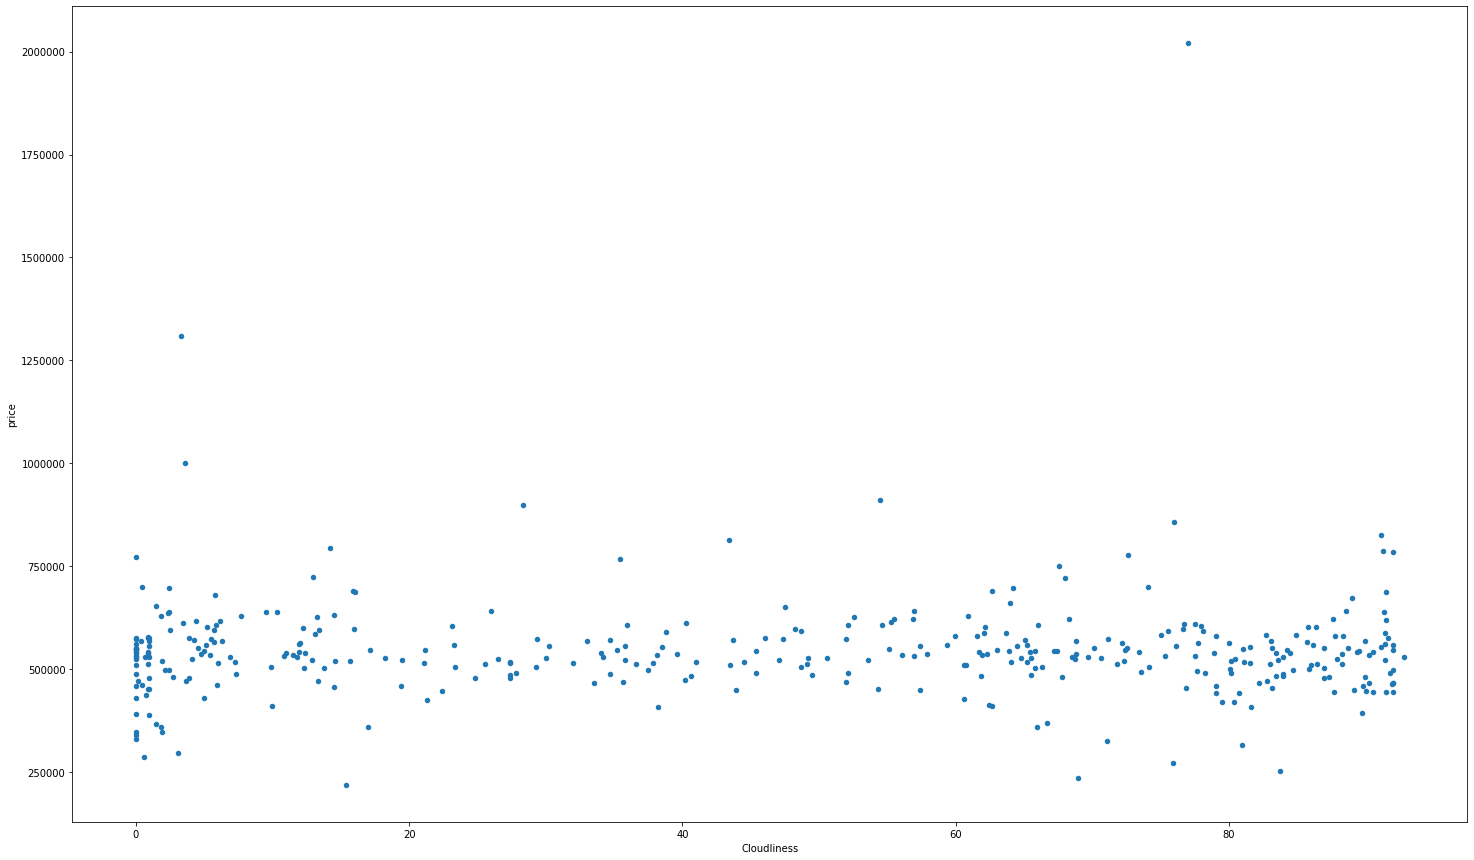

In [44]:
mergedtable.plot(x='Cloudliness', y='price', kind='scatter')

In [45]:
housesalescount = df.groupby('date').count()
housesalescount

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  sqft_basement  yr_built  \
date                                     ...                            
2014-05-02          67    67         67  ...             67        67   
2014-05-03           4     4          4  ...              4         4   
2014-05-04           5     5          5  ...              5         5   
2014-05-05          84    84         84  ...             84        84   
2014-05-06          83    83         83  ...             83        83   
...                ...   ...        ...  ...            ...       ...   
2015-05-13          31    31         31  ...             31        31   
2015-05-14          11    11         11  ...             11        11   
2015-05-15           1     1          1  ...              1         1   
2015-05-24           1     1          1  ...              1         1   
2015-05-27           1     1          1  ...              1         1   

            yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  \
date                                                                      
2014-05-02            67       67   67    67             67          67   
2014-05-03             4        4    4     4              4           4   
2014-05-04             5        5    5     5              5           5   
2014-05-05            84       84   84    84             84          84   
2014-05-06            83       83   83    83             83          83   
...                  ...      ...  ...   ...            ...         ...   
2015-05-13            31       31   31    31             31          31   
2015-05-14            11       11   11    11             11          11   
2015-05-15             1        1    1     1              1           1   
2015-05-24             1        1    1     1              1           1   
2015-05-27             1        1    1     1              1           1   

            date(Y/M)  date(Y)  
date                            
2014-05-02         67       67  
2014-05-03          4        4  
2014-05-04          5        5  
2014-05-05         84       84  
2014-05-06         83       83  
...               ...      ...  
2015-05-13         31       31  
2015-05-14         11       11  
2015-05-15          1        1  
2015-05-24          1        1  
2015-05-27          1        1  

[372 rows x 22 columns]

In [47]:
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )

In [48]:
merged2

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  lat  long  sqft_living15  \
date                                     ...                             
2014-05-02          67    67         67  ...   67    67             67   
2014-05-03           4     4          4  ...    4     4              4   
2014-05-04           5     5          5  ...    5     5              5   
2014-05-05          84    84         84  ...   84    84             84   
2014-05-06          83    83         83  ...   83    83             83   
...                ...   ...        ...  ...  ...   ...            ...   
2015-05-13          31    31         31  ...   31    31             31   
2015-05-14          11    11         11  ...   11    11             11   
2015-05-15           1     1          1  ...    1     1              1   
2015-05-24           1     1          1  ...    1     1              1   
2015-05-27           1     1          1  ...    1     1              1   

            sqft_lot15  date(Y/M)  date(Y)   Humidity  Cloudliness  \
date                                                                 
2014-05-02          67         67       67  54.875000    18.208333   
2014-05-03           4          4        4  78.625000    82.208333   
2014-05-04           5          5        5  89.458333    91.625000   
2014-05-05          84         84       84  89.541667    88.333333   
2014-05-06          83         83       83  83.708333    38.125000   
...                ...        ...      ...        ...          ...   
2015-05-13          31         31       31  93.166667    88.250000   
2015-05-14          11         11       11  91.416667    77.958333   
2015-05-15           1          1        1  84.625000    57.375000   
2015-05-24           1          1        1  88.333333    87.666667   
2015-05-27           1          1        1  80.583333     3.291667   

            Wind Speed  Temperature (C)  
date                                     
2014-05-02    0.708333        16.163522  
2014-05-03    1.000000        10.194961  
2014-05-04    0.958333         8.960943  
2014-05-05    1.666667        10.799583  
2014-05-06    1.166667        11.157323  
...                ...              ...  
2015-05-13    0.833333         8.864440  
2015-05-14    0.375000         9.033814  
2015-05-15    0.375000        10.121395  
2015-05-24    0.708333        11.517940  
2015-05-27    0.416667        13.384792  

[372 rows x 26 columns]

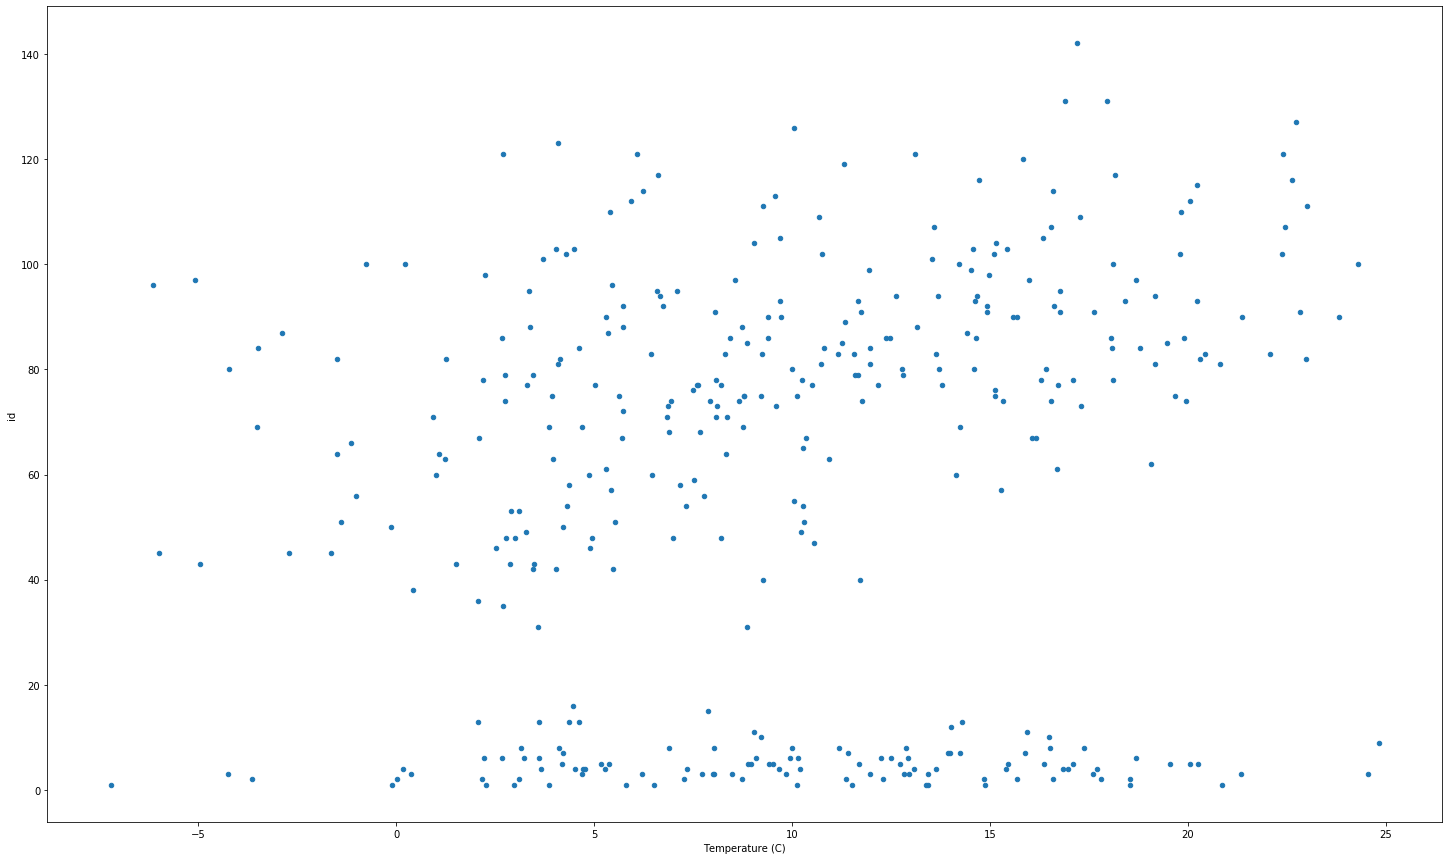

In [49]:
merged2.plot(kind='scatter', x='Temperature (C)', y='id')

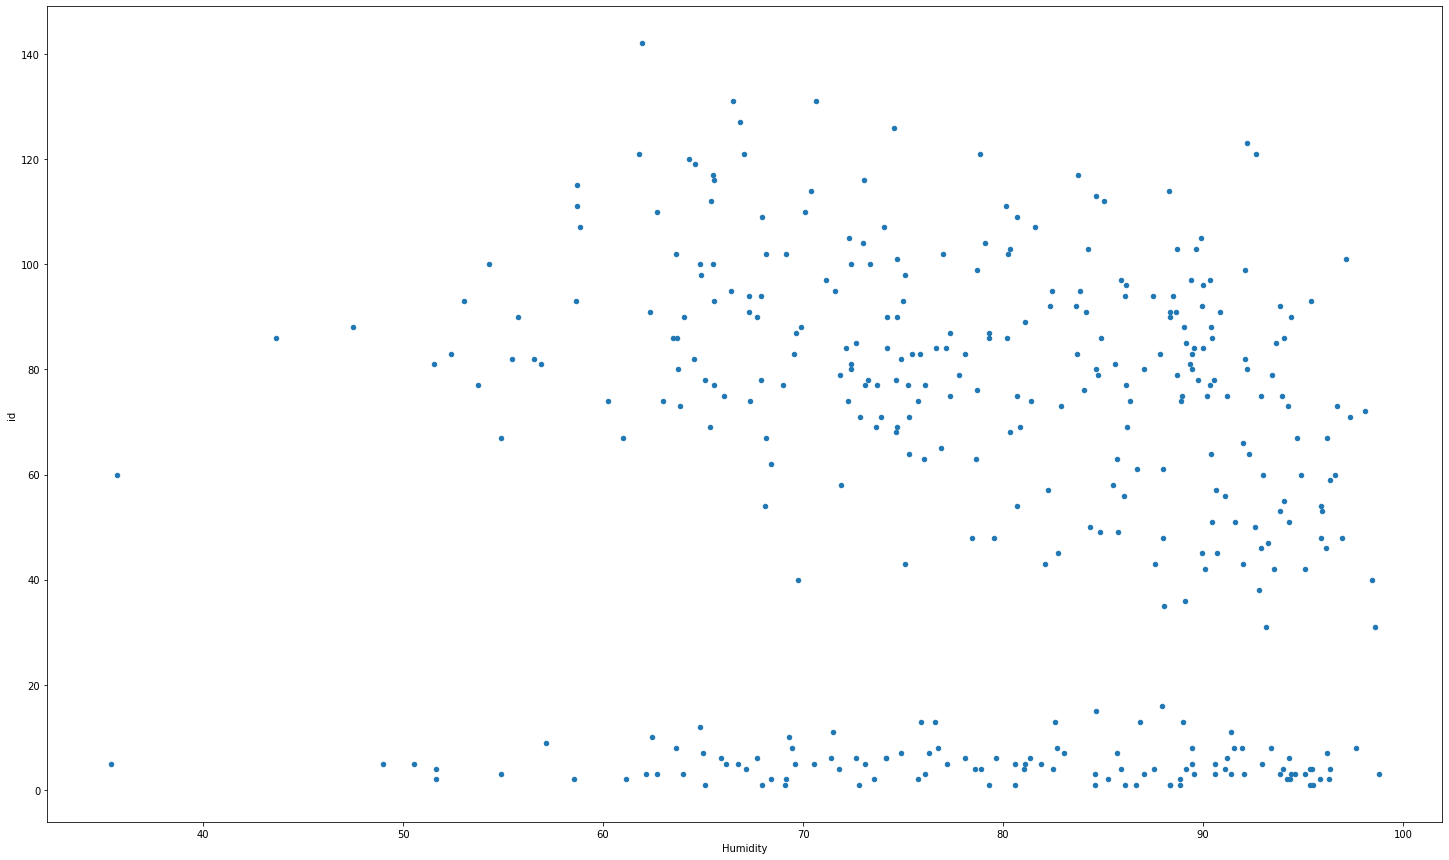

In [50]:
merged2.plot(kind='scatter', x='Humidity', y='id')

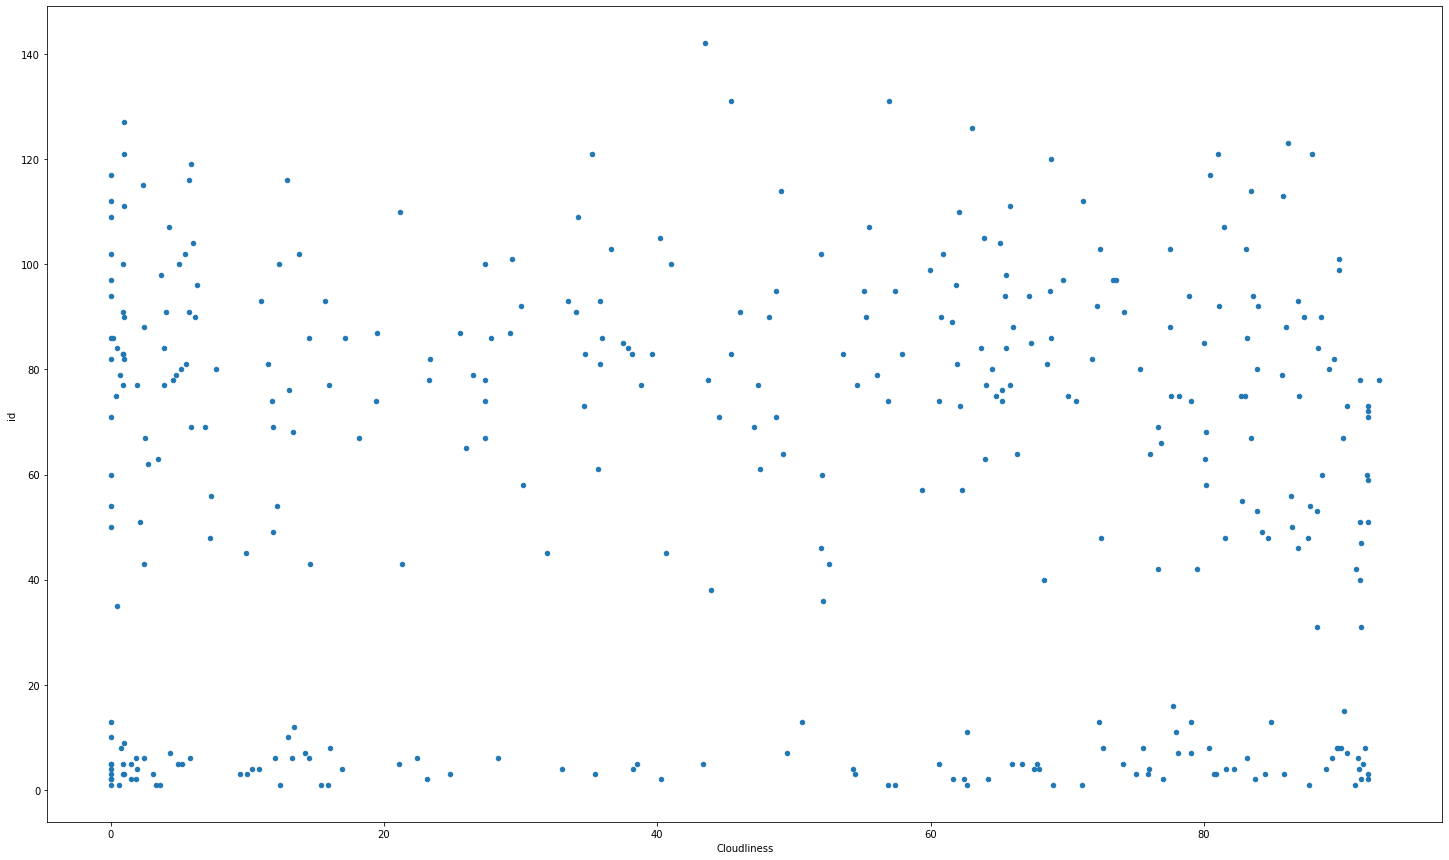

In [51]:
merged2.plot(kind='scatter', x='Cloudliness', y='id')

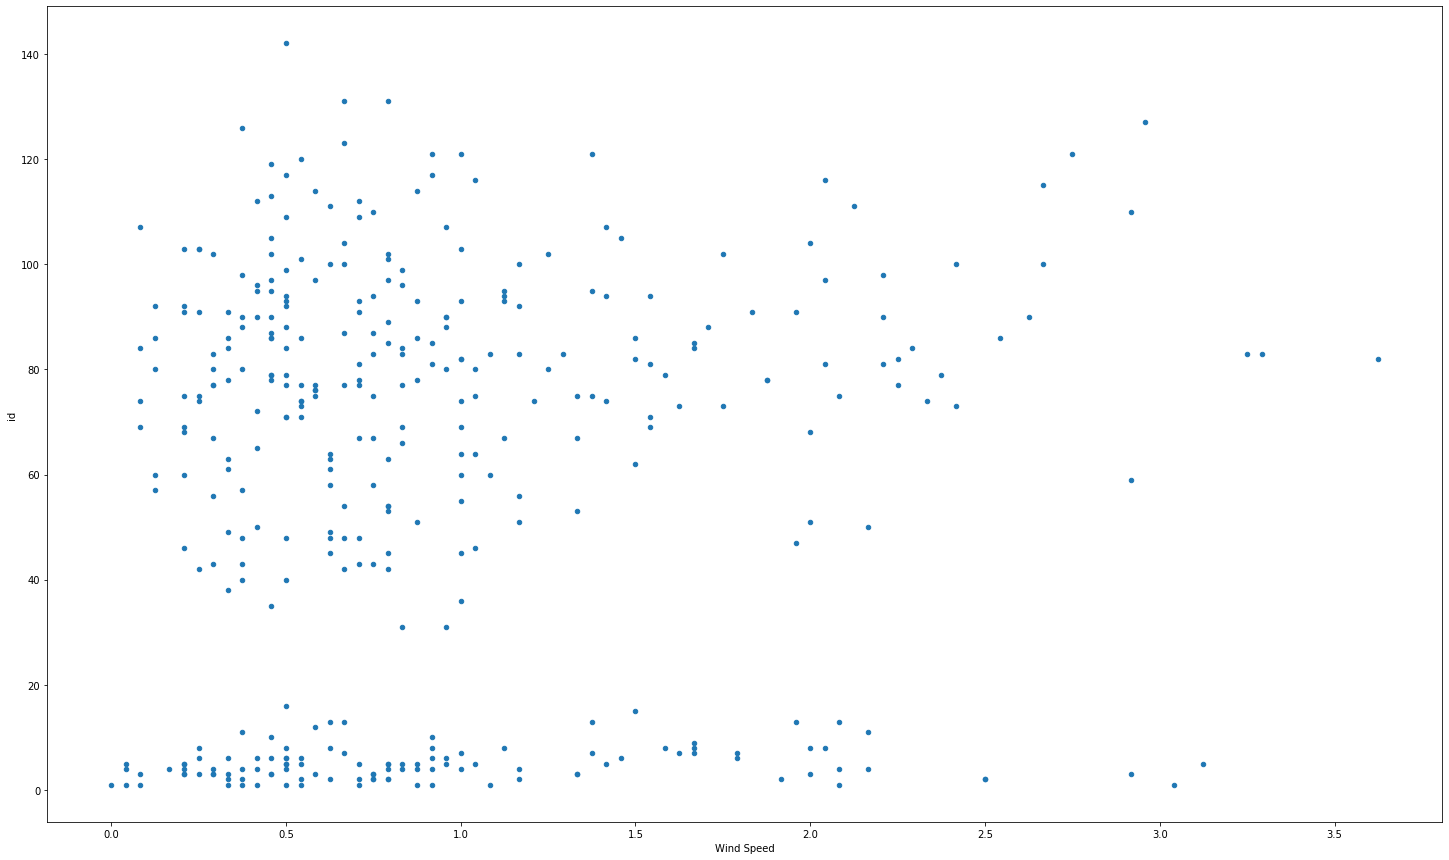

In [52]:
merged2.plot(kind='scatter', x='Wind Speed', y='id')

In [54]:
ymdf = df.groupby('date(Y/M)').count()
ymdf

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date(Y/M)                                                                  
2014-05    1768  1768   1768      1768       1768         1768      1768   
2014-06    2180  2180   2180      2180       2180         2180      2180   
2014-07    2211  2211   2211      2211       2211         2211      2211   
2014-08    1940  1940   1940      1940       1940         1940      1940   
2014-09    1774  1774   1774      1774       1774         1774      1774   
2014-10    1878  1878   1878      1878       1878         1878      1878   
2014-11    1411  1411   1411      1411       1411         1411      1411   
2014-12    1471  1471   1471      1471       1471         1471      1471   
2015-01     978   978    978       978        978          978       978   
2015-02    1250  1250   1250      1250       1250         1250      1250   
2015-03    1875  1875   1875      1875       1875         1875      1875   
2015-04    2231  2231   2231      2231       2231         2231      2231   
2015-05     646   646    646       646        646          646       646   

           floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
date(Y/M)                            ...                                        
2014-05      1768        1768  1768  ...        1768           1768      1768   
2014-06      2180        2180  2180  ...        2180           2180      2180   
2014-07      2211        2211  2211  ...        2211           2211      2211   
2014-08      1940        1940  1940  ...        1940           1940      1940   
2014-09      1774        1774  1774  ...        1774           1774      1774   
2014-10      1878        1878  1878  ...        1878           1878      1878   
2014-11      1411        1411  1411  ...        1411           1411      1411   
2014-12      1471        1471  1471  ...        1471           1471      1471   
2015-01       978         978   978  ...         978            978       978   
2015-02      1250        1250  1250  ...        1250           1250      1250   
2015-03      1875        1875  1875  ...        1875           1875      1875   
2015-04      2231        2231  2231  ...        2231           2231      2231   
2015-05       646         646   646  ...         646            646       646   

           yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15  \
date(Y/M)                                                                 
2014-05            1768     1768  1768  1768           1768        1768   
2014-06            2180     2180  2180  2180           2180        2180   
2014-07            2211     2211  2211  2211           2211        2211   
2014-08            1940     1940  1940  1940           1940        1940   
2014-09            1774     1774  1774  1774           1774        1774   
2014-10            1878     1878  1878  1878           1878        1878   
2014-11            1411     1411  1411  1411           1411        1411   
2014-12            1471     1471  1471  1471           1471        1471   
2015-01             978      978   978   978            978         978   
2015-02            1250     1250  1250  1250           1250        1250   
2015-03            1875     1875  1875  1875           1875        1875   
2015-04            2231     2231  2231  2231           2231        2231   
2015-05             646      646   646   646            646         646   

           date(Y)  
date(Y/M)           
2014-05       1768  
2014-06       2180  
2014-07       2211  
2014-08       1940  
2014-09       1774  
2014-10       1878  
2014-11       1411  
2014-12       1471  
2015-01        978  
2015-02       1250  
2015-03       1875  
2015-04       2231  
2015-05        646  

[13 rows x 22 columns]

Current size: [25.0, 15.0]


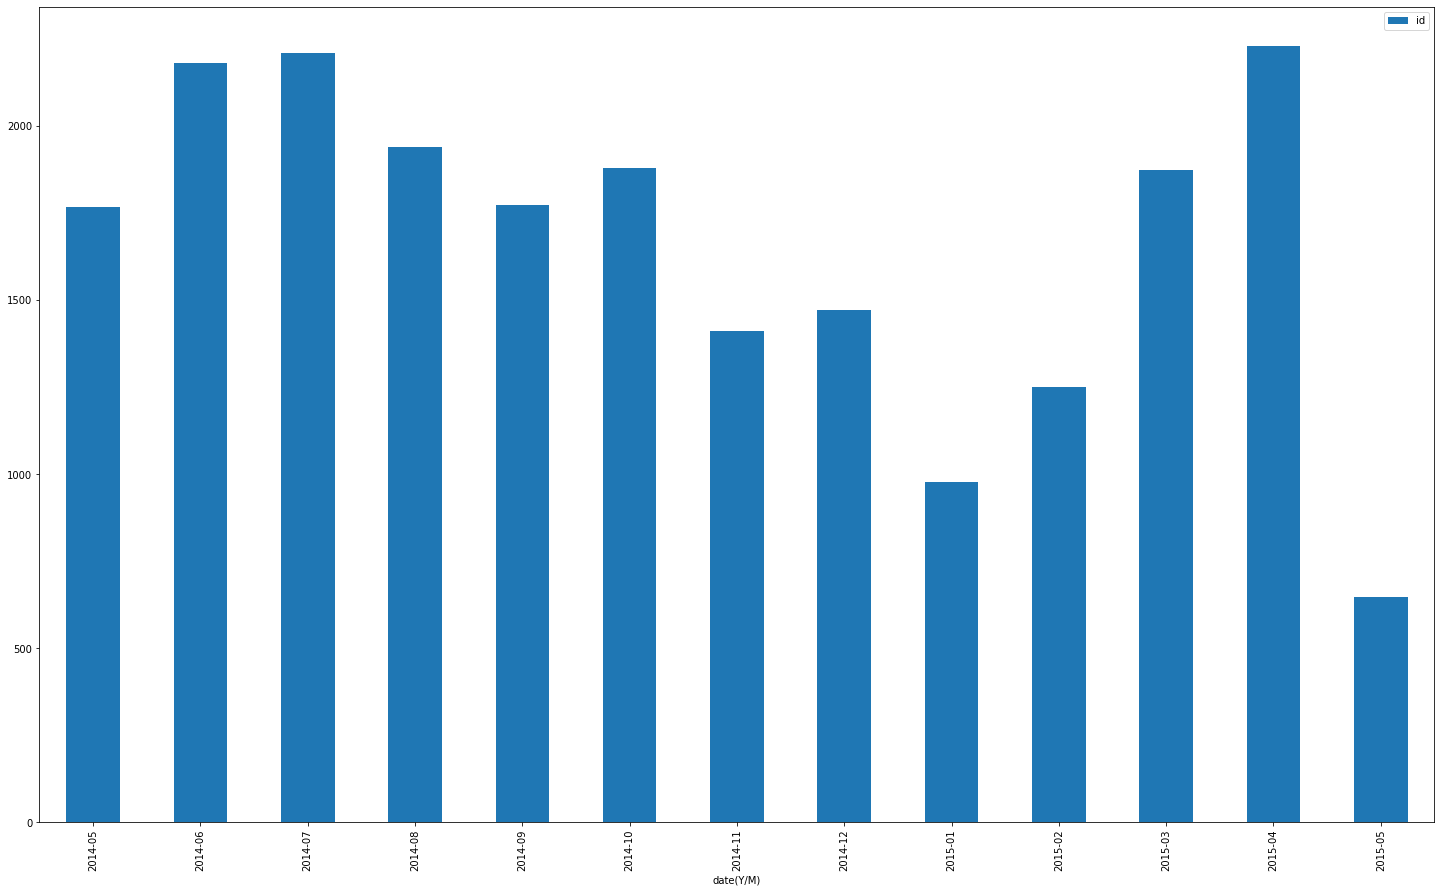

In [55]:
ymdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [56]:
yadf = df.groupby('date(Y/M)').mean()
yadf

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

Current size: [10.0, 8.0]


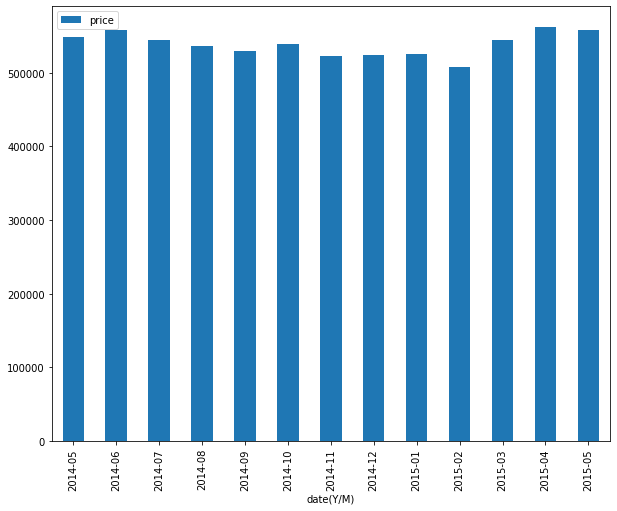

In [57]:
yadf.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [58]:
weatherdata.groupby('date(Y/M)').mean()

Humidity  Cloudliness  Wind Speed  Temperature (C)
date(Y/M)                                                     
2013-01    76.581989    64.669355    1.198925         2.541290
2013-02    75.611607    76.558036    1.697917         6.016165
2013-03    66.061828    60.897849    1.041667         7.138878
2013-04    69.781944    58.947222    1.879167         9.459154
2013-05    52.876344    42.327957    1.248656        13.585724
2013-06    60.609722    49.747222    0.800000        16.259861
2013-07    57.524194     8.356183    0.666667        18.301708
2013-08    63.607527    39.805108    0.681452        17.912518
2013-09    80.112500    50.676389    1.115278        15.300842
2013-10    85.764785    35.830645    0.704301         8.487598
2013-11    77.690278    18.868056    1.052778         7.751019
2013-12    79.697581     7.888441    1.271505         2.949882
2014-01    86.306040    15.046980    1.448322         5.504302
2014-02    83.986607    60.784226    1.186012        -0.145985
2014-03    86.451613    65.055108    0.923387         4.549942
2014-04    78.173611    54.548611    0.770833         6.840869
2014-05    71.299731    46.129032    1.259409        13.414395
2014-06    73.752778    45.356944    1.083333        14.327004
2014-07    66.193767    23.678862    2.107046        19.891122
2014-08    72.879032    26.202957    0.750000        18.026412
2014-09    72.355556    34.181944    0.504167        14.508711
2014-10    86.837366    59.088710    0.647849        10.578193
2014-11    86.575000    55.147222    1.251389         3.356622
2014-12    89.362903    62.224462    1.044355         1.950354
2015-01    91.057718    51.088591    0.708725         2.992706
2015-02    86.285714    58.593750    0.668155         5.200498
2015-03    81.182796    52.931452    0.677419         6.285907
2015-04    78.016667    51.750000    0.695833         6.213240
2015-05    76.911290    40.752688    0.543011        12.044640
2015-06    59.127778    23.130556    0.912500        16.995892
2015-07    58.559140    29.389785    2.010753        20.634321
2015-08    62.408602    29.674731    2.073925        19.417782
2015-09    73.697222    45.833333    1.758333        14.832857
2015-10    85.044355    53.069892    1.466398        12.505920
2015-11    87.933333    58.822222    1.594444         5.656833
2015-12    89.267473    73.112903    2.182796         5.180198
2016-01    56.000000     1.000000    0.000000         3.830000

In [59]:
merged3 = pd.merge(weatherdata, yadf, on='date(Y/M)', how='inner')

In [60]:
mergeddf = merged3.groupby('date(Y/M)').mean()
mergeddf

Humidity  Cloudliness  Wind Speed  Temperature (C)            id  \
date(Y/M)                                                                      
2014-05    71.299731    46.129032    1.259409        13.414395  4.628282e+09   
2014-06    73.752778    45.356944    1.083333        14.327004  4.573257e+09   
2014-07    66.193767    23.678862    2.107046        19.891122  4.578350e+09   
2014-08    72.879032    26.202957    0.750000        18.026412  4.616929e+09   
2014-09    72.355556    34.181944    0.504167        14.508711  4.458143e+09   
2014-10    86.837366    59.088710    0.647849        10.578193  4.525103e+09   
2014-11    86.575000    55.147222    1.251389         3.356622  4.523550e+09   
2014-12    89.362903    62.224462    1.044355         1.950354  4.559764e+09   
2015-01    91.057718    51.088591    0.708725         2.992706  4.574031e+09   
2015-02    86.285714    58.593750    0.668155         5.200498  4.600261e+09   
2015-03    81.182796    52.931452    0.677419         6.285907  4.600587e+09   
2015-04    78.016667    51.750000    0.695833         6.213240  4.693827e+09   
2015-05    76.911290    40.752688    0.543011        12.044640  4.556021e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date(Y/M)                                                                 ...   
2014-05    548166.600113  3.389706   2.139847  2114.912896  15959.428167  ...   
2014-06    558123.736239  3.418349   2.163876  2132.820642  14260.094954  ...   
2014-07    544892.161013  3.391678   2.146540  2128.246495  13857.654907  ...   
2014-08    536527.039691  3.355670   2.123067  2084.762887  14636.380928  ...   
2014-09    529315.868095  3.360203   2.130919  2077.375986  15367.856257  ...   
2014-10    539127.477636  3.360490   2.118876  2083.896166  15489.720980  ...   
2014-11    522058.861800  3.333806   2.079376  2048.768958  15258.856130  ...   
2014-12    524602.893270  3.390891   2.102991  2091.339225  15330.740313  ...   
2015-01    525963.251534  3.387526   2.129346  2085.094070  17869.721881  ...   
2015-02    507919.603200  3.340000   2.059600  2010.974400  13703.131200  ...   
2015-03    544057.683200  3.367467   2.065333  2021.968533  15604.088533  ...   
2015-04    561933.463021  3.364859   2.106006  2060.377409  14265.989691  ...   
2015-05    558193.095975  3.292570   2.052632  2023.741486  18645.713622  ...   

              grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                                    
2014-05    7.724548  1797.126131     317.786765  1970.536765    118.639706   
2014-06    7.738532  1822.365138     310.455505  1970.741284     80.543119   
2014-07    7.716870  1841.531886     286.714609  1971.777024     92.125283   
2014-08    7.685567  1798.204639     286.558247  1972.058247     78.193814   
2014-09    7.640361  1785.519166     291.856821  1970.535513     99.047914   
2014-10    7.640043  1787.299255     296.596912  1970.119808     94.473376   
2014-11    7.610914  1775.916371     272.852587  1970.090716     87.574061   
2014-12    7.657376  1787.078858     304.260367  1971.276003     77.410605   
2015-01    7.642127  1814.019427     271.074642  1971.749489     73.433538   
2015-02    7.554400  1726.692800     284.281600  1971.464000     51.055200   
2015-03    7.588267  1740.604800     281.363733  1970.597333     82.976533   
2015-04    7.651277  1777.770955     282.606455  1971.713133     70.670551   
2015-05    7.537152  1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831

Current size: [10.0, 8.0]


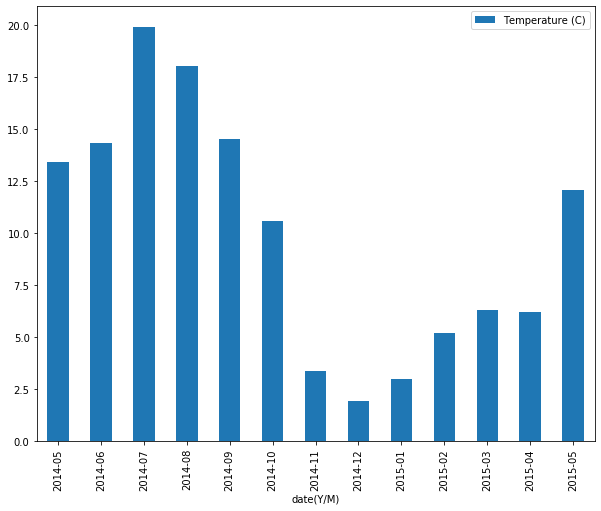

In [61]:
mergeddf.plot(kind='bar', y='Temperature (C)')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


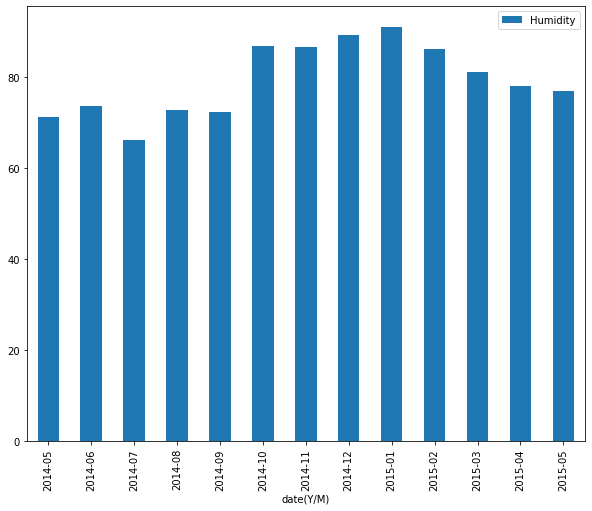

In [62]:
mergeddf.plot(kind='bar', y='Humidity')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


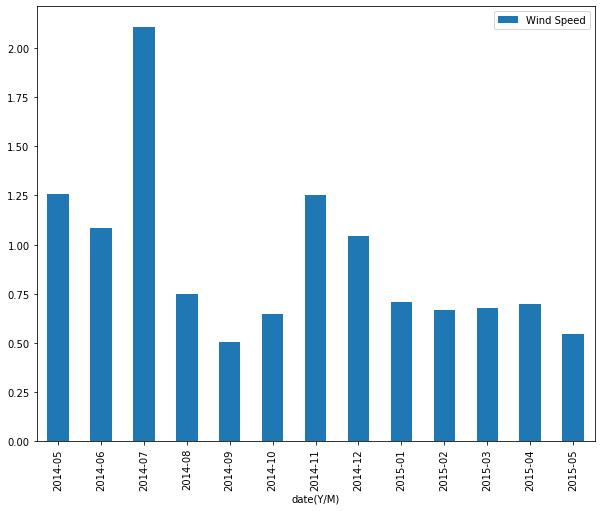

In [63]:
mergeddf.plot(kind='bar', y='Wind Speed')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [64]:
mergedcountdf = merged3.groupby('date(Y/M)').count()
mergedcountdf

date  Humidity  Cloudliness  Weather Condition  Wind Speed  \
date(Y/M)                                                               
2014-05     744       744          744                744         744   
2014-06     720       720          720                720         720   
2014-07     738       738          738                738         738   
2014-08     744       744          744                744         744   
2014-09     720       720          720                720         720   
2014-10     744       744          744                744         744   
2014-11     720       720          720                720         720   
2014-12     744       744          744                744         744   
2015-01     745       745          745                745         745   
2015-02     672       672          672                672         672   
2015-03     744       744          744                744         744   
2015-04     720       720          720                720         720   
2015-05     744       744          744                744         744   

           Temperature (C)   id  price  bedrooms  bathrooms  ...  grade  \
date(Y/M)                                                    ...          
2014-05                744  744    744       744        744  ...    744   
2014-06                720  720    720       720        720  ...    720   
2014-07                738  738    738       738        738  ...    738   
2014-08                744  744    744       744        744  ...    744   
2014-09                720  720    720       720        720  ...    720   
2014-10                744  744    744       744        744  ...    744   
2014-11                720  720    720       720        720  ...    720   
2014-12                744  744    744       744        744  ...    744   
2015-01                745  745    745       745        745  ...    745   
2015-02                672  672    672       672        672  ...    672   
2015-03                744  744    744       744        744  ...    744   
2015-04                720  720    720       720        720  ...    720   
2015-05                744  744    744       744        744  ...    744   

           sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat  \
date(Y/M)                                                                    
2014-05           744            744       744           744      744  744   
2014-06           720            720       720           720      720  720   
2014-07           738            738       738           738      738  738   
2014-08           744            744       744           744      744  744   
2014-09           720            720       720           720      720  720   
2014-10           744            744       744           744      744  744   
2014-11           720            720       720           720      720  720   
2014-12           744            744       744           744      744  744   
2015-01           745            745       745           745      745  745   
2015-02           672            672       672           672      672  672   
2015-03           744            744       744           744      744  744   
2015-04           720            720       720           720      720  720   
2015-05           744            744       744           744      744  744   

           long  sqft_living15  sqft_lot15  
date(Y/M)                                   
2014-05     744            744         744  
2014-06     720            720         720  
2014-07     738            738         738  
2014-08     744            744         744  
2014-09     720            720         720  
2014-10     744            744         744  
2014-11     720            720         720  
2014-12     744            744         744  
2015-01     745            745         745  
2015-02     672            672         672  
2015-03     744            744         744  
2015-04     720            720   

Current size: [10.0, 8.0]


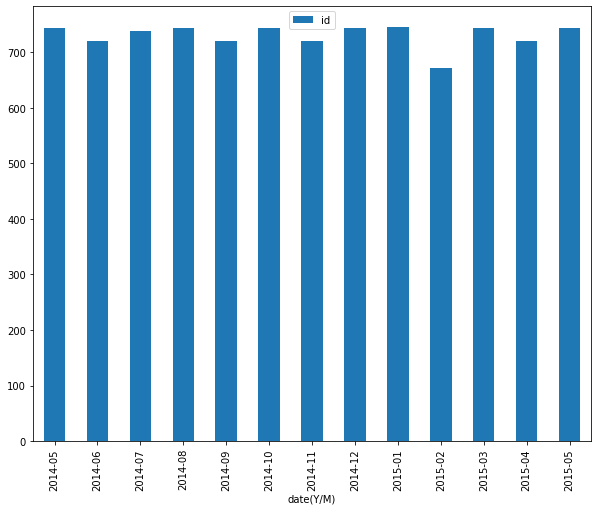

In [65]:
mergedcountdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [69]:
lessthantwenty=merged2.loc[merged2['id']<=20]
lessthantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  lat  long  sqft_living15  \
date                                     ...                             
2014-05-03           4     4          4  ...    4     4              4   
2014-05-04           5     5          5  ...    5     5              5   
2014-05-10           5     5          5  ...    5     5              5   
2014-05-11           2     2          2  ...    2     2              2   
2014-05-17           1     1          1  ...    1     1              1   
...                ...   ...        ...  ...  ...   ...            ...   
2015-05-10           2     2          2  ...    2     2              2   
2015-05-14          11    11         11  ...   11    11             11   
2015-05-15           1     1          1  ...    1     1              1   
2015-05-24           1     1          1  ...    1     1              1   
2015-05-27           1     1          1  ...    1     1              1   

            sqft_lot15  date(Y/M)  date(Y)   Humidity  Cloudliness  \
date                                                                 
2014-05-03           4          4        4  78.625000    82.208333   
2014-05-04           5          5        5  89.458333    91.625000   
2014-05-10           5          5        5  81.083333    67.750000   
2014-05-11           2          2        2  73.541667    23.166667   
2014-05-17           1          1        1  67.958333    62.666667   
...                ...        ...      ...        ...          ...   
2015-05-10           2          2        2  58.541667    61.666667   
2015-05-14          11         11       11  91.416667    77.958333   
2015-05-15           1          1        1  84.625000    57.375000   
2015-05-24           1          1        1  88.333333    87.666667   
2015-05-27           1          1        1  80.583333     3.291667   

            Wind Speed  Temperature (C)  
date                                     
2014-05-03    1.000000        10.194961  
2014-05-04    0.958333         8.960943  
2014-05-10    1.041667         9.516208  
2014-05-11    1.166667        11.355417  
2014-05-17    2.083333        14.880000  
...                ...              ...  
2015-05-10    0.375000        14.838667  
2015-05-14    0.375000         9.033814  
2015-05-15    0.375000        10.121395  
2015-05-24    0.708333        11.517940  
2015-05-27    0.416667        13.384792  

[112 rows x 26 columns]

In [70]:
morethantwenty=merged2.loc[merged2['id']>=20]
morethantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  lat  long  sqft_living15  \
date                                     ...                             
2014-05-02          67    67         67  ...   67    67             67   
2014-05-05          84    84         84  ...   84    84             84   
2014-05-06          83    83         83  ...   83    83             83   
2014-05-07          93    93         93  ...   93    93             93   
2014-05-08          81    81         81  ...   81    81             81   
...                ...   ...        ...  ...  ...   ...            ...   
2015-05-07          76    76         76  ...   76    76             76   
2015-05-08          54    54         54  ...   54    54             54   
2015-05-11          40    40         40  ...   40    40             40   
2015-05-12          49    49         49  ...   49    49             49   
2015-05-13          31    31         31  ...   31    31             31   

            sqft_lot15  date(Y/M)  date(Y)   Humidity  Cloudliness  \
date                                                                 
2014-05-02          67         67       67  54.875000    18.208333   
2014-05-05          84         84       84  89.541667    88.333333   
2014-05-06          83         83       83  83.708333    38.125000   
2014-05-07          93         93       93  58.625000    11.000000   
2014-05-08          81         81       81  72.416667    68.500000   
...                ...        ...      ...        ...          ...   
2015-05-07          76         76       76  78.708333    13.083333   
2015-05-08          54         54       54  68.083333     0.000000   
2015-05-11          40         40       40  69.750000    68.291667   
2015-05-12          49         49       49  84.875000    84.250000   
2015-05-13          31         31       31  93.166667    88.250000   

            Wind Speed  Temperature (C)  
date                                     
2014-05-02    0.708333        16.163522  
2014-05-05    1.666667        10.799583  
2014-05-06    1.166667        11.157323  
2014-05-07    1.000000        11.661917  
2014-05-08    0.916667        11.975833  
...                ...              ...  
2015-05-07    0.583333         7.496233  
2015-05-08    0.791667        10.286815  
2015-05-11    0.500000        11.721434  
2015-05-12    0.625000        10.230355  
2015-05-13    0.833333         8.864440  

[260 rows x 26 columns]

In [73]:
lessdf=pd.merge(lessthantwenty, weatherbydateymd, on='date', how='inner')
lessdf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  date(Y/M)  date(Y)  Humidity_x  \
date                                     ...                                   
2014-05-03           4     4          4  ...          4        4   78.625000   
2014-05-04           5     5          5  ...          5        5   89.458333   
2014-05-10           5     5          5  ...          5        5   81.083333   
2014-05-11           2     2          2  ...          2        2   73.541667   
2014-05-17           1     1          1  ...          1        1   67.958333   
...                ...   ...        ...  ...        ...      ...         ...   
2015-05-10           2     2          2  ...          2        2   58.541667   
2015-05-14          11    11         11  ...         11       11   91.416667   
2015-05-15           1     1          1  ...          1        1   84.625000   
2015-05-24           1     1          1  ...          1        1   88.333333   
2015-05-27           1     1          1  ...          1        1   80.583333   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Humidity_y  \
date                                                                     
2014-05-03      82.208333      1.000000          10.194961   78.625000   
2014-05-04      91.625000      0.958333           8.960943   89.458333   
2014-05-10      67.750000      1.041667           9.516208   81.083333   
2014-05-11      23.166667      1.166667          11.355417   73.541667   
2014-05-17      62.666667      2.083333          14.880000   67.958333   
...                   ...           ...                ...         ...   
2015-05-10      61.666667      0.375000          14.838667   58.541667   
2015-05-14      77.958333      0.375000           9.033814   91.416667   
2015-05-15      57.375000      0.375000          10.121395   84.625000   
2015-05-24      87.666667      0.708333          11.517940   88.333333   
2015-05-27       3.291667      0.416667          13.384792   80.583333   

            Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                        
2014-05-03      82.208333      1.000000          10.194961  
2014-05-04      91.625000      0.958333           8.960943  
2014-05-10      67.750000      1.041667           9.516208  
2014-05-11      23.166667      1.166667          11.355417  
2014-05-17      62.666667      2.083333          14.880000  
...                   ...           ...                ...  
2015-05-10      61.666667      0.375000          14.838667  
2015-05-14      77.958333      0.375000           9.033814  
2015-05-15      57.375000      0.375000          10.121395  
2015-05-24      87.666667      0.708333          11.517940  
2015-05-27       3.291667      0.416667          13.384792  

[112 rows x 30 columns]

In [84]:
moredf=pd.merge(morethantwenty, weatherbydateymd, on='date', how='inner')
moredf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  date(Y/M)  date(Y)  Humidity_x  \
date                                     ...                                   
2014-05-02          67    67         67  ...         67       67   54.875000   
2014-05-05          84    84         84  ...         84       84   89.541667   
2014-05-06          83    83         83  ...         83       83   83.708333   
2014-05-07          93    93         93  ...         93       93   58.625000   
2014-05-08          81    81         81  ...         81       81   72.416667   
...                ...   ...        ...  ...        ...      ...         ...   
2015-05-07          76    76         76  ...         76       76   78.708333   
2015-05-08          54    54         54  ...         54       54   68.083333   
2015-05-11          40    40         40  ...         40       40   69.750000   
2015-05-12          49    49         49  ...         49       49   84.875000   
2015-05-13          31    31         31  ...         31       31   93.166667   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Humidity_y  \
date                                                                     
2014-05-02      18.208333      0.708333          16.163522   54.875000   
2014-05-05      88.333333      1.666667          10.799583   89.541667   
2014-05-06      38.125000      1.166667          11.157323   83.708333   
2014-05-07      11.000000      1.000000          11.661917   58.625000   
2014-05-08      68.500000      0.916667          11.975833   72.416667   
...                   ...           ...                ...         ...   
2015-05-07      13.083333      0.583333           7.496233   78.708333   
2015-05-08       0.000000      0.791667          10.286815   68.083333   
2015-05-11      68.291667      0.500000          11.721434   69.750000   
2015-05-12      84.250000      0.625000          10.230355   84.875000   
2015-05-13      88.250000      0.833333           8.864440   93.166667   

            Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                        
2014-05-02      18.208333      0.708333          16.163522  
2014-05-05      88.333333      1.666667          10.799583  
2014-05-06      38.125000      1.166667          11.157323  
2014-05-07      11.000000      1.000000          11.661917  
2014-05-08      68.500000      0.916667          11.975833  
...                   ...           ...                ...  
2015-05-07      13.083333      0.583333           7.496233  
2015-05-08       0.000000      0.791667          10.286815  
2015-05-11      68.291667      0.500000          11.721434  
2015-05-12      84.250000      0.625000          10.230355  
2015-05-13      88.250000      0.833333           8.864440  

[260 rows x 30 columns]

Current size: [10.0, 8.0]


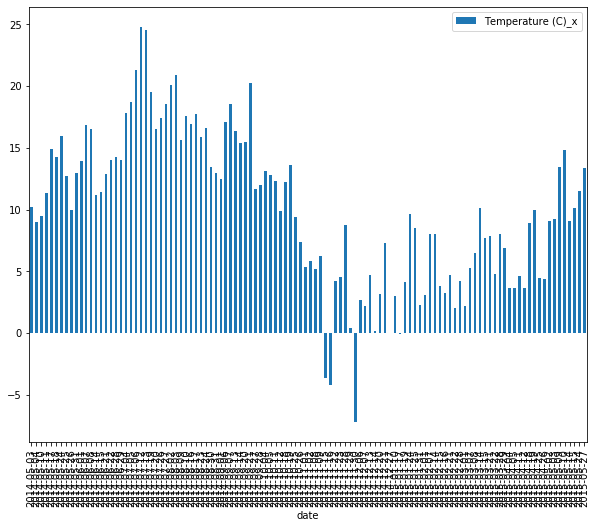

In [74]:
lessdf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


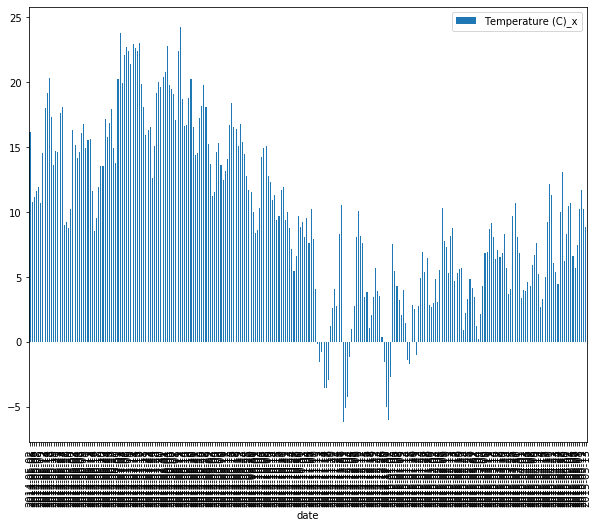

In [81]:
moredf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


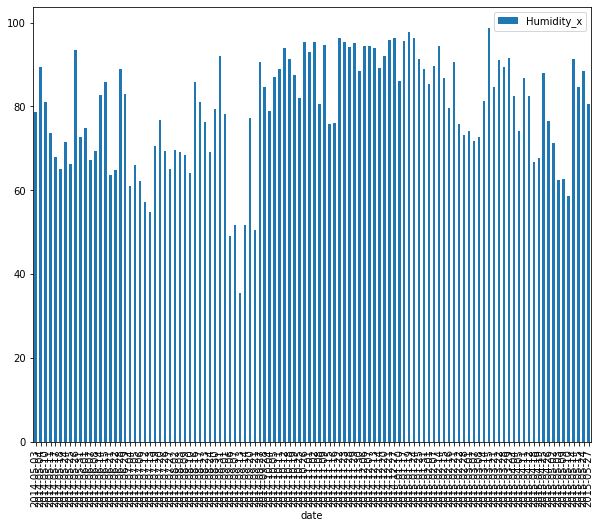

In [77]:
lessdf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


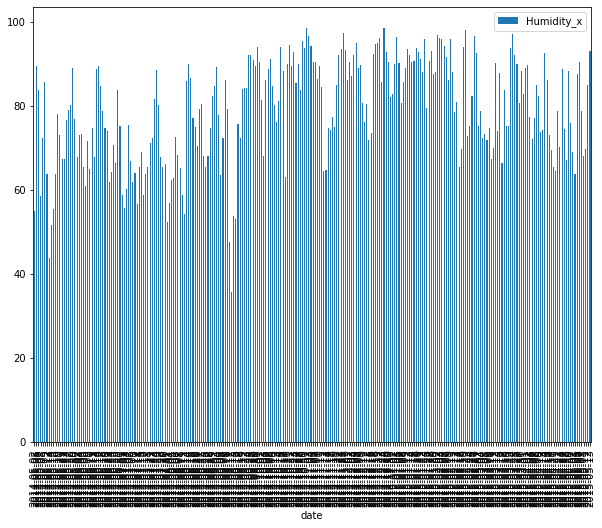

In [82]:
moredf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


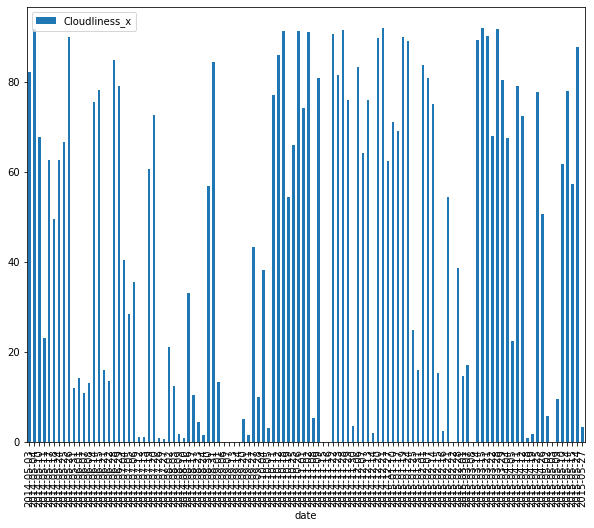

In [80]:
lessdf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


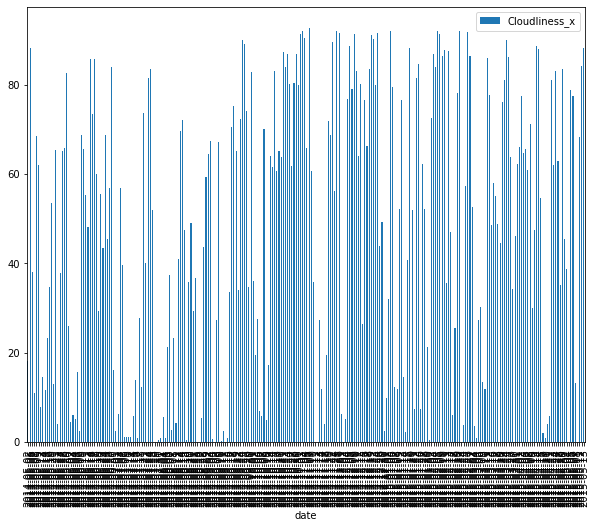

In [172]:
moredf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [101]:
belowzerotemp=merged2.loc[merged2['Temperature (C)']<=0]

In [104]:
belowzerotemp['id'].sum()

1167

In [102]:
abovezerotemp=merged2.loc[merged2['Temperature (C)']>=0]

In [103]:
abovezerotemp['id'].sum()

20446

In [168]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
...                ..   ...    ...       ...        ...          ...   
98034   2014-07    64    64     64        64         64           64   
98103   2014-06    65    65     65        65         65           65   
        2014-10    66    66     66        66         66           66   
        2014-07    73    73     73        73         73           73   
98052   2014-07    73    73     73        73         73           73   

                   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
zipcode date(Y/M)                                      ...                      
98039   2015-05           1       1           1     1  ...      1           1   
98148   2015-01           1       1           1     1  ...      1           1   
98109   2015-05           2       2           2     2  ...      2           2   
98014   2015-05           2       2           2     2  ...      2           2   
98024   2014-12           2       2           2     2  ...      2           2   
...                     ...     ...         ...   ...  ...    ...         ...   
98034   2014-07          64      64          64    64  ...     64          64   
98103   2014-06          65      65          65    65  ...     65          65   
        2014-10          66      66          66    66  ...     66          66   
        2014-07          73      73          73    73  ...     73          73   
98052   2014-07          73      73          73    73  ...     73          73   

                   sqft_basement  yr_built  yr_renovated  lat  long  \
zipcode date(Y/M)                                                     
98039   2015-05                1         1             1    1     1   
98148   2015-01                1         1             1    1     1   
98109   2015-05                2         2             2    2     2   
98014   2015-05                2         2             2    2     2   
98024   2014-12                2         2             2    2     2   
...                          ...       ...           ...  ...   ...   
98034   2014-07               64        64            64   64    64   
98103   2014-06               65        65            65   65    65   
        2014-10               66        66            66   66    66   
        2014-07               73        73            73   73    73   
98052   2014-07               73        73            73   73    73   

                   sqft_living15  sqft_lot15  date(Y)  
zipcode date(Y/M)                                      
98039   2015-05                1           1        1  
98148   2015-01                1           1        1  
98109   2015-05                2           2        2  
98014   2015-05                2           2        2  
98024   2014-12                2           2        2  
...                          ...         ...      ...  
98034   2014-07               64          64       64  
98103   2014-06               65          65       65  
        2014-10               66          66       66  
        2014-07               73          73       73  
98052   2014-07               73          73       73  

[904 rows x 21 columns]

In [170]:
lessthan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']<=20]
lessthan20zc['id'].sum()

5176

In [140]:
morethan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']>=20]
morethan20zc['id'].sum()

17117

In [167]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98039     50    50     50        50         50           50        50      50   
98148     57    57     57        57         57           57        57      57   
98024     81    81     81        81         81           81        81      81   
98010    100   100    100       100        100          100       100     100   
98102    105   105    105       105        105          105       105     105   
...      ...   ...    ...       ...        ...          ...       ...     ...   
98117    553   553    553       553        553          553       553     553   
98052    574   574    574       574        574          574       574     574   
98115    583   583    583       583        583          583       583     583   
98038    590   590    590       590        590          590       590     590   
98103    602   602    602       602        602          602       602     602   

         waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
zipcode                    ...                                        
98039            50    50  ...          50             50        50   
98148            57    57  ...          57             57        57   
98024            81    81  ...          81             81        81   
98010           100   100  ...         100            100       100   
98102           105   105  ...         105            105       105   
...             ...   ...  ...         ...            ...       ...   
98117           553   553  ...         553            553       553   
98052           574   574  ...         574            574       574   
98115           583   583  ...         583            583       583   
98038           590   590  ...         590            590       590   
98103           602   602  ...         602            602       602   

         yr_renovated  lat  long  sqft_living15  sqft_lot15  date(Y/M)  \
zipcode                                                                  
98039              50   50    50             50          50         50   
98148              57   57    57             57          57         57   
98024              81   81    81             81          81         81   
98010             100  100   100            100         100        100   
98102             105  105   105            105         105        105   
...               ...  ...   ...            ...         ...        ...   
98117             553  553   553            553         553        553   
98052             574  574   574            574         574        574   
98115             583  583   583            583         583        583   
98038             590  590   590            590         590        590   
98103             602  602   602            602         602        602   

         date(Y)  
zipcode           
98039         50  
98148         57  
98024         81  
98010        100  
98102        105  
...          ...  
98117        553  
98052        574  
98115        583  
98038        590  
98103        602  

[70 rows x 22 columns]